#1 - Tabelas com Atributos e Cargos


Abaixo estão as bibliotecas as quais permitiram a manipulação, limpeza, processamentos, reduções e visualizações dos dados.

##Bibliotecas

In [ ]:
#instalando gower library para utilizar o Gower Distance Measurament
!pip install gower

In [ ]:
#Bibliotecas utilizadas
from google.colab import files #Carregar arquivos CSV mais fácil
import csv  #Trabalhar CSV mais
import numpy as np #Biblioteca de séries necessária para o Pandas
import pandas as pd #Principal biblioteca da DS
import seaborn as sns #Melhorando Gráficos
import matplotlib.pyplot as plt #Utilizar gráficos no Python
import matplotlib.patches as mpatches #Anotações nos gráficos
import matplotlib.font_manager as fm #tamanho da fonte nas legendas
import networkx as nx #Diagramas de Grafos
import gower #Organizador segundo lógica de Gower
import re #Trabalhando com regex
from sklearn.model_selection import train_test_split #Testes científicos e treinamentos das descisões
from sklearn.metrics import accuracy_score #Checando acurácia das medidas
from sklearn.cluster import AgglomerativeClustering #Agrupamentos como o Scatterplot
from scipy.spatial import distance #Medições relativas de distâncias
from scipy.spatial.distance import pdist #tabela de distâncias
from scipy.spatial.distance import squareform #elevando tabela de distâncias ao quadrado
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram #utilização de linkages e dendogramas
from scipy.cluster.hierarchy import cophenet #indíce cofenético
from sklearn.tree import DecisionTreeClassifier, plot_tree #árvore de decisão
import math #cálculos avançados de matemática
import random #número aleatórios para teste da IA Classificadora
from collections import Counter #Contar itens em uma lista

Inicialmente, todos os editais de concursos públicos de cada um dos cargos atuais foram obtidos, a fim de que as atribuições previstas de cada um fossem compiladas. Considerando que nem todos os cargos possuem lei ou documentos oficiais listando suas atribuições, optou-se pelos editais, por serem uma forma mais equânime de comparação. Apesar de não haver força normativa, há de se ressaltar que estas listas de atribuições nos editais de concursos trazem o que os cargos possuem de inerentes, haja vista sempre todas as listas de todos os cargos iniciarem com a frase “São atribuições inerentes ao exercício do cargo de...” (com exceção dos cargos de fotógrafo técnico pericial, desenhista técnico pericial, auxiliar de necrotério policial e atendente de necrotério policial, os quais só indicam quais atribuições estão listadas sem indicar serem “inerentes”), de forma que os ignorá-las ou alterá-las levianamente pode suscitar alteração da essência do cargo. Se não houvesse necessidade de atenção a essas atribuições, não seria necessário as colocar nos editais ou mesmo qualquer tipo de atribuições poderiam ser colocadas, por mais absurda que essas fossem. Estas listas de atribuições servem de espécie de “termômetro”, o qual demonstra aos candidatos e servidores dos cargos quais atribuições são esperadas deles, e quais não são, de forma expressa e concisa e normalmente espelhando leis quando essas existem.

A tabela abaixo mostra as seguintes colunas:

**Edital - Portaria:** Ano do Edital ou menção da Portaria 30 de 2012, com atribuições comuns a todas as carreiras.

**Carreira:** Menciona a carreira do documento.

**num_atrib:** Contador de atribuições do documento.

**mantida - retirada:** se a atribuição foi mantida inicialmente para saber quais são as atribuições comuns (Portaria 30/2012), mantida e utilizada até o fim do estudo ou retirada por se tratar do rol comum.

**Reduzida:** Condensação da essência da atribuição em oração menor. Quando a essência era a mesma em cargos distintos, somente uma oração reduzida era mantida.

**Mesclada:** Quando várias atribuições listadas no documento só faziam menção a uma atribuição. No processamentos, todas essas atribuições foram mescladas em somente uma reduzida.

In [ ]:
#Carregando o arquivo
#QUANDO O ENCODING UTF-8 DER PROBLEMA, UTILIZAR ISO-8859-1
uploaded = files.upload()
tabela_atrib_editais = pd.read_csv('Atribuicoes_Carreiras_Editais.CSV', encoding='iso-8859-1', sep=';')

Saving Atribuicoes_Carreiras_Editais.CSV to Atribuicoes_Carreiras_Editais.CSV


Verificando leitura do documento.

In [ ]:
#Verificando o arquivo
print(tabela_atrib_editais.to_string())

    Edital - Portaria                             Carreira  num_atrib                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           atribuicao    mantida - retirada                                                                                                          Reduzida Mesclada
0           30 - 2012                                Todas          1                                                                                                                                                                                                       

Tabela melhor visualizada em Dataframe.

In [ ]:
tabela_atrib_editais

Edital - Portaria                          Carreira  num_atrib  \
0           30 - 2012                             Todas          1   
1           30 - 2012                             Todas          2   
2           30 - 2012                             Todas          3   
3           30 - 2012                             Todas          4   
4           30 - 2012                             Todas          5   
..                ...                               ...        ...   
124              2013  Atendente de Necrotério Policial          7   
125              2013  Atendente de Necrotério Policial          8   
126              2013  Atendente de Necrotério Policial          9   
127              2013  Atendente de Necrotério Policial         10   
128              2013  Atendente de Necrotério Policial         11   

                                            atribuicao    mantida - retirada  \
0                    portar arma, distintivo e algemas  mantida inicialmente   
1    atender sempre, com urbanidade e eficiência, o...  mantida inicialmente   
2    elaborar, sob orientação da Autoridade Policia...  mantida inicialmente   
3                           conduzir viatura policial;  mantida inicialmente   
4    cumprir diligência e/ou requisição determinada...  mantida inicialmente   
..                                                 ...                   ...   
124             Manusear roupas e objetos de cadáveres               mantida   
125  Portar arma, distintivo, identidade funcional ...              retirada   
126  Atender, com urbanidade e eficiência, o públic...              retirada   
127  Conduzir viatura policial e operar os sistemas...              retirada   
128  Executar outras tarefas correlatas ao desempen...              retirada   

                                              Reduzida Mesclada  
0                    portar arma, distintivo e algemas        n  
1    atender sempre, com urbanidade e eficiência, o...        n  
2    elaborar, sob orientação da Autoridade Policia...        n  
3                           conduzir viatura policial;        n  
4    cumprir diligência e/ou requisição determinada...        n  
..                                                 ...      ...  
124                manipulação de objetos de cadáveres        n  
125                                                  X        n  
126                                                  X        n  
127                                                  X        n  
128                                                  X        n  

[129 rows x 7 columns]

Com esta tabela e comando simples, pode-se listar as orações de cada cargo. Abaixo estão eles, conforme o código colocado, iniciando pelas atribuições de todas as carreiras.

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Todas']

Edital - Portaria Carreira  num_atrib  \
0         30 - 2012    Todas          1   
1         30 - 2012    Todas          2   
2         30 - 2012    Todas          3   
3         30 - 2012    Todas          4   
4         30 - 2012    Todas          5   
5         30 - 2012    Todas          6   
6         30 - 2012    Todas          7   
7         30 - 2012    Todas          8   
8         30 - 2012    Todas          9   
9         30 - 2012    Todas         10   

                                          atribuicao    mantida - retirada  \
0                  portar arma, distintivo e algemas  mantida inicialmente   
1  atender sempre, com urbanidade e eficiência, o...  mantida inicialmente   
2  elaborar, sob orientação da Autoridade Policia...  mantida inicialmente   
3                         conduzir viatura policial;  mantida inicialmente   
4  cumprir diligência e/ou requisição determinada...  mantida inicialmente   
5  proceder à abordagem de pessoas suspeitas da p...  mantida inicialmente   
6  identificar pessoas, inclusive por meio digita...  mantida inicialmente   
7  conduzir e apresentar pessoas legalmente presa...  mantida inicialmente   
8  auxiliar a Autoridade Policial na formalização...  mantida inicialmente   
9  operar os sistemas de comunicação e de dados d...  mantida inicialmente   

                                            Reduzida Mesclada  
0                  portar arma, distintivo e algemas        n  
1  atender sempre, com urbanidade e eficiência, o...        n  
2  elaborar, sob orientação da Autoridade Policia...        n  
3                         conduzir viatura policial;        n  
4  cumprir diligência e/ou requisição determinada...        n  
5  proceder à abordagem de pessoas suspeitas da p...        n  
6  identificar pessoas, inclusive por meio digita...        n  
7  conduzir e apresentar pessoas legalmente presa...        n  
8  auxiliar a Autoridade Policial na formalização...        n  
9  operar os sistemas de comunicação e de dados d...        n

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Delegado de Polícia']

Edital - Portaria             Carreira  num_atrib  \
10              2023  Delegado de Polícia          1   
11              2023  Delegado de Polícia          2   
12              2023  Delegado de Polícia          3   
13              2023  Delegado de Polícia          4   
14              2023  Delegado de Polícia          5   

                                           atribuicao mantida - retirada  \
10  exercer atos inerentes à gestão da atividade d...            mantida   
11  presidir os atos de polícia judiciária e a apu...            mantida   
12  presidir a investigação criminal e as ações a ...            mantida   
13  portar arma de fogo e atuar com possibilidade ...           retirada   
14                                   mediar conflitos            mantida   

                               Reduzida Mesclada  
10         gestão de polícia judiciária        n  
11       presidir investigação criminal        n  
12  presidir atos de polícia judiciária        n  
13                                    X        n  
14                     mediar conflitos        n

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Escrivão de Polícia']

Edital - Portaria             Carreira  num_atrib  \
15              2023  Escrivão de Polícia          1   
16              2023  Escrivão de Polícia          2   
17              2023  Escrivão de Polícia          3   
18              2023  Escrivão de Polícia          4   
19              2023  Escrivão de Polícia          5   
20              2023  Escrivão de Polícia          6   
21              2023  Escrivão de Polícia          7   
22              2023  Escrivão de Polícia          8   

                                           atribuicao mantida - retirada  \
15  secretariar a elaboração de boletins de ocorrê...            mantida   
16  responsabilizar-se pelo valor das fianças rece...            mantida   
17                      conduzir veículos automotores           retirada   
18              cumprir medidas de segurança orgânica            mantida   
19  atuar nos procedimentos policiais de investigação            mantida   
20  desempenhar outras atividades de natureza poli...           retirada   
21  portar arma de fogo enquanto integrante da Pol...           retirada   
22  atuar com possibilidade de exposição a situaçõ...           retirada   

                                             Reduzida Mesclada  
15  secretariar atos de polícia judiciária / inqué...        n  
16                  responsabilizar-se por apreensões        n  
17                                                  X        n  
18              cumprir medidas de segurança orgânica        n  
19                              atuar na investigação        n  
20                                                  X        n  
21                                                  X        n  
22                                                  X        n

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Investigador de Polícia']

Edital - Portaria                 Carreira  num_atrib  \
23              2023  Investigador de Polícia          1   
24              2023  Investigador de Polícia          2   
25              2023  Investigador de Polícia          3   
26              2023  Investigador de Polícia          4   
27              2023  Investigador de Polícia          5   
28              2023  Investigador de Polícia          6   
29              2023  Investigador de Polícia          7   
30              2023  Investigador de Polícia          8   
31              2023  Investigador de Polícia          9   
32              2023  Investigador de Polícia         10   
33              2023  Investigador de Polícia         11   
34              2023  Investigador de Polícia         12   
35              2023  Investigador de Polícia         13   
36              2023  Investigador de Polícia         14   
37              2023  Investigador de Polícia         15   
38              2023  Investigador de Polícia         16   

                                           atribuicao mantida - retirada  \
23  realizar diligências investigatórias e de poli...            mantida   
24  cumprir requisições escritas ou verbais atinen...           retirada   
25                                   cumprir mandados            mantida   
26  elaborar boletins de ocorrência e demais atos ...           retirada   
27                                    escoltar presos           retirada   
28  realizar prisões, capturas de indivíduos e apr...            mantida   
29  manter a segurança de locais onde se desenvolv...            mantida   
30  atender ao público interno e externo, no desem...           retirada   
31  intervir, a qualquer tempo, em ocorrências de ...            mantida   
32                        conduzir viaturas policiais           retirada   
33  transportar pessoas e coisas vinculadas a ocor...            mantida   
34  conservar, manusear e empregar armas de fogo e...            mantida   
35  executar demais atos compatíveis com a ativida...           retirada   
36  desempenhar outras atividades de natureza poli...           retirada   
37  portar arma de fogo enquanto integrante da Pol...           retirada   
38  atuar com possibilidade de exposição a situaçõ...           retirada   

                                             Reduzida Mesclada  
23     diligência e prevenção especializada de crimes        n  
24                                                  X        n  
25                                   cumprir mandados        n  
26                                                  X        n  
27                                                  X        n  
28                                   realizar prisões        n  
29        \tsegurança de locais de polícia judiciária        n  
30                                                  X        n  
31                   intervir em ocorrência policiais        n  
32                                                  X        n  
33  transporte de pessoas / coisas de ocorrência p...        n  
34              manusear armas de fogo e menos letais        n  
35                                                  X        n  
36                                                  X        n  
37                                                  X        n  
38                                                  X        n

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Perito Criminal']

Edital - Portaria         Carreira  num_atrib  \
39              2023  Perito Criminal          1   
40              2023  Perito Criminal          2   
41              2023  Perito Criminal          3   
42              2023  Perito Criminal          4   
43              2023  Perito Criminal          5   
44              2023  Perito Criminal          6   
45              2023  Perito Criminal          7   
46              2023  Perito Criminal          8   
47              2023  Perito Criminal          9   
48              2023  Perito Criminal         10   
49              2023  Perito Criminal         11   
50              2023  Perito Criminal         12   
51              2023  Perito Criminal         13   
52              2023  Perito Criminal         14   
53              2023  Perito Criminal         15   
54              2023  Perito Criminal         16   
55              2023  Perito Criminal         17   

                                           atribuicao mantida - retirada  \
39  realizar exames e análises no âmbito da Crimin...            mantida   
40  analisar documentos e objetos em locais de cri...            mantida   
41  analisar vestígios para determinação da identi...            mantida   
42  cumprir requisições periciais pertinentes às i...            mantida   
43  examinar, com prioridade, elementos materiais ...            mantida   
44  atender ocorrências com vítimas de desabamento...            mantida   
45  manusear, coletar e analisar materiais biológi...            mantida   
46  realizar exames genéricos e/ou específicos de ...            mantida   
47  manusear e analisar drogas psicoativas (entorp...            mantida   
48  realizar análises físicas e/ou químicas de sub...            mantida   
49  realizar exame perinecroscópico, manuseando ca...            mantida   
50  realizar exames relacionados com exumação de c...            mantida   
51          portar arma, distintivo e dirigir viatura           retirada   
52                        atender ao público em geral           retirada   
53  realizar o levantamento de local, elaborar cro...            mantida   
54  operar aparelhos de tecnologia aplicáveis à ár...            mantida   
55                     realizar exames de informática            mantida   

                                             Reduzida Mesclada  
39                       exames com ciências naturais        n  
40  análise de vestígios em local de crime ou labo...        n  
41     \tanalisar vestígios papiloscópicos latu sensu        n  
42      cumprir requisições do ramo da criminalística        n  
43                           examinar locais de crime        n  
44                 \tatender ocorrências de desastres        n  
45                    \tmanusear materiais biológicos        n  
46                                \texames em manchas        n  
47                      \tanalisar drogas psicoativas        n  
48   \tanálises de substâncias orgânica / inorgânicas        n  
49                             exame perinecroscópico        n  
50                     exames com exumação de cadáver        n  
51                                                  X        n  
52                                                  X        n  
53  realizar levantamento de local com desenhos e ...        n  
54                          operar aparelhos forenses        n  
55                            \texames de informática        n

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Médico Legista']

Edital - Portaria        Carreira  num_atrib  \
56              2023  Médico Legista          1   
57              2023  Médico Legista          2   
58              2023  Médico Legista          3   
59              2023  Médico Legista          4   
60              2023  Médico Legista          5   
61              2023  Médico Legista          6   
62              2023  Médico Legista          7   
63              2023  Médico Legista          8   
64              2023  Médico Legista          9   
65              2023  Médico Legista         10   

                                           atribuicao mantida - retirada  \
56  Executar autópsias ou exames necroscópicos em ...            mantida   
57              realizar exames periciais de exumação            mantida   
58  coletar amostras biológicas de humanos para fi...            mantida   
59  realizar exames periciais de natureza antropol...            mantida   
60  realizar exames periciais diretos e indiretos ...            mantida   
61  acompanhar equipes de perícia em local de crim...            mantida   
62                      zelar pela cadeia de custódia            mantida   
63                         dirigir viaturas policiais           retirada   
64  portar arma de fogo enquanto integrante da Pol...           retirada   
65  atuar com possibilidade de exposição a situaçõ...           retirada   

                            Reduzida Mesclada  
56  autópsias e exames necroscópicos        n  
57    exames com exumação de cadáver        n  
58     manusear materiais biológicos        n  
59  exames de natureza antropológica        n  
60                   exames em vivos        n  
61          examinar locais de crime        n  
62     zelar pela cadeia de custódia        n  
63                                 X        n  
64                                 X        n  
65                                 X        n

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Papiloscopista Policial']

Edital - Portaria                 Carreira  num_atrib  \
66              2017  Papiloscopista Policial          1   
67              2017  Papiloscopista Policial          2   
68              2017  Papiloscopista Policial          3   
69              2017  Papiloscopista Policial          4   
70              2017  Papiloscopista Policial          5   
71              2017  Papiloscopista Policial          6   
72              2017  Papiloscopista Policial          7   
73              2017  Papiloscopista Policial          8   
74              2017  Papiloscopista Policial          9   
75              2017  Papiloscopista Policial         10   
76              2017  Papiloscopista Policial         11   
77              2017  Papiloscopista Policial         12   

                                           atribuicao mantida - retirada  \
66  o estudo das impressões digitais na palma das ...            mantida   
67  Também cuida dos trabalhos de coleta, análise,...           retirada   
68  Planejar, coordenar e controlar a realização d...            mantida   
69  Realizar a inserção de fragmentos papilares qu...            mantida   
70  realizar pesquisa nos acervos decadactilar, mo...            mantida   
71  Proceder à identificação civil e criminal de i...            mantida   
72  Aplicar e desenvolver técnicas científicas e p...            mantida   
73  Proceder à identificação de cadáveres em difer...            mantida   
74  Efetuar busca através das impressões papilares...            mantida   
75  Comparecer aos locais de crimes, proceder à té...            mantida   
76  Realizar perícias de projeções de envelhecimen...            mantida   
77  Efetuar trabalhos técnicos fotográficos e macr...            mantida   

                                             Reduzida Mesclada  
66                             estudo da papiloscopia        n  
67                                                  X        n  
68     inserir impressões digitais em bancos de dados        n  
69  processar impressões digitais em sistemas info...        n  
70                 pesquisar em bancos papiloscópicos        n  
71    identificação civil e criminal com papiloscopia        n  
72                                  necropapiloscopia        s  
73                                  necropapiloscopia        s  
74              papiloscopia em pessoas desaparecidas        n  
75       Analisar vestígios papiloscópicos latu sensu        n  
76     projeções de envelhecimento e rejuvenescimento        n  
77  realizar levantamento de local com desenhos e ...        n

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Auxiliar de Papiloscopista Policial']

Edital - Portaria                             Carreira  num_atrib  \
78              2017  Auxiliar de Papiloscopista Policial          1   
79              2017  Auxiliar de Papiloscopista Policial          2   
80              2017  Auxiliar de Papiloscopista Policial          3   
81              2017  Auxiliar de Papiloscopista Policial          4   
82              2017  Auxiliar de Papiloscopista Policial          5   
83              2017  Auxiliar de Papiloscopista Policial          6   

                                           atribuicao mantida - retirada  \
78  executar trabalho de coleta de impressões digi...            mantida   
79  registrar e encaminhar os dados coletados para...            mantida   
80  auxiliar o papiloscopista policial no desempen...            mantida   
81  auxiliar na elaboração do processo relacionado...            mantida   
82  fazer coleta de impressões em locais de crimes...            mantida   
83  além das funções previstas na Portaria DGP-30,...           retirada   

                                             Reduzida Mesclada  
78            captura eletrônica de impressão digital        n  
79  registrar e encaminhar dados de classificação ...        n  
80                          auxiliar o papiloscopista        n  
81    identificação civil e criminal com papiloscopia        n  
82       analisar vestigios papiloscopicos latu sensu        n  
83                                                  X        n

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Agente de Telecomunicações Policial']

Edital - Portaria                             Carreira  num_atrib  \
84              2017  Agente de Telecomunicações Policial          1   
85              2017  Agente de Telecomunicações Policial          2   

                                           atribuicao mantida - retirada  \
84  tarefas de transmissão ou recepção de informaç...           retirada   
85  dentre outras a elas relacionadas ou delas dec...           retirada   

   Reduzida Mesclada  
84        X        n  
85        X        n

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Agente Policial']

Edital - Portaria         Carreira  num_atrib  \
86              2017  Agente Policial          1   
87              2017  Agente Policial          2   

                                           atribuicao mantida - retirada  \
86  dirigir viatura policial para os mais diversos...           retirada   
87          portar arma de fogo, distintivo e algemas           retirada   

   Reduzida Mesclada  
86        X        n  
87        X        n

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Carcereiro Policial']

Edital - Portaria             Carreira  num_atrib  \
88              2024  Carcereiro Policial          0   

                     atribuicao mantida - retirada Reduzida Mesclada  
88  NÃO ENCONTRADAS ATRIBUIÇÕES           retirada        X        n

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Fotógrafo Técnico Pericial']

Edital - Portaria                    Carreira  num_atrib  \
89              2013  Fotógrafo Técnico Pericial          1   
90              2013  Fotógrafo Técnico Pericial          2   
91              2013  Fotógrafo Técnico Pericial          3   
92              2013  Fotógrafo Técnico Pericial          4   
93              2013  Fotógrafo Técnico Pericial          5   
94              2013  Fotógrafo Técnico Pericial          6   
95              2013  Fotógrafo Técnico Pericial          7   
96              2013  Fotógrafo Técnico Pericial          8   
97              2013  Fotógrafo Técnico Pericial          9   
98              2013  Fotógrafo Técnico Pericial         10   

                                           atribuicao mantida - retirada  \
89  fotografar ocorrências policiais em qualquer t...            mantida   
90  participar diretamente da perícia em condições...            mantida   
91  manusear materiais contaminados (seringas, est...            mantida   
92  fotografar cadáveres, seus ferimentos, perfura...            mantida   
93  manusear e fotografar substâncias psicoativas ...            mantida   
94  proceder à revelação e ampliação de fotografia...            mantida   
95  manusear arquivos fotográficos digitais, ediçã...            mantida   
96                            editar laudos periciais            mantida   
97                                    dirigir viatura           retirada   
98                         atender o público em geral           retirada   

                                             Reduzida Mesclada  
89  fotografar ocorrências diversas de perícia da ...        n  
90                            auxiliar a perícia SPTC        n  
91                      manusear materiais biológicos        s  
92                      manusear materiais biológicos        s  
93           manusear e fotografar drogas psicoativas        n  
94  trabalhar fotografias de qualquer tipo relacio...        s  
95  trabalhar fotografias de qualquer tipo relacio...        s  
96                            editar laudos periciais        n  
97                                                  X        n  
98                                                  X        n

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Desenhista Técnico Pericial']

Edital - Portaria                     Carreira  num_atrib  \
99               2013  Desenhista Técnico Pericial          1   
100              2013  Desenhista Técnico Pericial          2   
101              2013  Desenhista Técnico Pericial          3   
102              2013  Desenhista Técnico Pericial          4   
103              2013  Desenhista Técnico Pericial          5   
104              2013  Desenhista Técnico Pericial          6   
105              2013  Desenhista Técnico Pericial          7   
106              2013  Desenhista Técnico Pericial          8   
107              2013  Desenhista Técnico Pericial          9   
108              2013  Desenhista Técnico Pericial         10   

                                            atribuicao mantida - retirada  \
99   intervir em situações de fato mediante uso do ...            mantida   
100  encaminhar demandas que lhe forem apresentadas...           retirada   
101  elaborar desenhos esquemáticos de ocorrências ...            mantida   
102                   elaborar recognição visuográfica            mantida   
103  reconstituir em desenho esquemático ou croqui ...            mantida   
104  atender locais de crimes, tais como alagados, ...            mantida   
105  manusear materiais contaminantes a fim de elab...            mantida   
106  entrar em contato com vítimas de crimes, catás...            mantida   
107                      portar arma e dirigir viatura           retirada   
108                        atender ao público em geral           retirada   

                                              Reduzida Mesclada  
99           segurança de locais de polícia judiciária        n  
100                                                  X        n  
101  realizar levantamento de local com desenhos e ...        n  
102                   elaborar recognição visuográfica        n  
103                            auxiliar a perícia SPTC        s  
104                            auxiliar a perícia SPTC        s  
105                      manusear materiais biológicos        s  
106                      manusear materiais biológicos        s  
107                                                  X        n  
108                                                  X        n

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Auxiliar de Necrópsia Policial']

Edital - Portaria                        Carreira  num_atrib  \
109              2013  Auxiliar de Necrópsia Policial          1   
110              2013  Auxiliar de Necrópsia Policial          2   
111              2013  Auxiliar de Necrópsia Policial          3   
112              2013  Auxiliar de Necrópsia Policial          4   
113              2013  Auxiliar de Necrópsia Policial          5   
114              2013  Auxiliar de Necrópsia Policial          6   
115              2013  Auxiliar de Necrópsia Policial          7   
116              2013  Auxiliar de Necrópsia Policial          8   
117              2013  Auxiliar de Necrópsia Policial          9   

                                            atribuicao mantida - retirada  \
109                           Identificação de cadáver            mantida   
110  Manuseio de cadáver para possibilitar a observ...            mantida   
111             Execução e acompanhamento de exumações            mantida   
112  Abertura de cavidade craniana, toráxica e abdo...            mantida   
113  Colheitas de amostras viscerais para exames de...            mantida   
114   Reconstituição de cadáver costurando suas partes            mantida   
115  Limpeza de instrumentos utilizados nas necropsias            mantida   
116  Recolhimento de ossadas, restos putrefados e c...            mantida   
117                                   Limpeza de ossos            mantida   

                                   Reduzida Mesclada  
109     identificação do cadáver latu sensu        n  
110      manuseio do cadáver em laboratório        n  
111          exames com exumação de cadáver        n  
112       manipulação de cadáver latu sensu        s  
113       manipulação de cadáver latu sensu        s  
114       manipulação de cadáver latu sensu        s  
115  manipulação de ossos e partes do corpo        s  
116  manipulação de ossos e partes do corpo        s  
117  manipulação de ossos e partes do corpo        s

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Carreira'] == 'Atendente de Necrotério Policial']

Edital - Portaria                          Carreira  num_atrib  \
118              2013  Atendente de Necrotério Policial          1   
119              2013  Atendente de Necrotério Policial          2   
120              2013  Atendente de Necrotério Policial          3   
121              2013  Atendente de Necrotério Policial          4   
122              2013  Atendente de Necrotério Policial          5   
123              2013  Atendente de Necrotério Policial          6   
124              2013  Atendente de Necrotério Policial          7   
125              2013  Atendente de Necrotério Policial          8   
126              2013  Atendente de Necrotério Policial          9   
127              2013  Atendente de Necrotério Policial         10   
128              2013  Atendente de Necrotério Policial         11   

                                            atribuicao mantida - retirada  \
118  Recolher cadáveres ou parte deles (óbitos rece...            mantida   
119  Efetuar o transporte de cadáveres ou parte del...            mantida   
120  Limpar cadáveres ou parte deles e encaminhá-lo...            mantida   
121  Manter a limpeza da viatura de transporte de c...            mantida   
122  Adotar providências para o reconhecimento de c...            mantida   
123  Adotar providências para o sepultamento de cad...            mantida   
124             Manusear roupas e objetos de cadáveres            mantida   
125  Portar arma, distintivo, identidade funcional ...           retirada   
126  Atender, com urbanidade e eficiência, o públic...           retirada   
127  Conduzir viatura policial e operar os sistemas...           retirada   
128  Executar outras tarefas correlatas ao desempen...           retirada   

                                     Reduzida Mesclada  
118    manuseio do cadáver em locais de crime        n  
119           transporte de cadáver ou partes        n  
120                          limpar cadáveres        s  
121                          limpar cadáveres        s  
122  providências reconhecimento de cadáveres        n  
123              providências de sepultamento        n  
124       manipulação de objetos de cadáveres        n  
125                                         X        n  
126                                         X        n  
127                                         X        n  
128                                         X        n

Também é possível fazer diferentes filtros, como os a seguir.
Atribuições retiradas.

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['mantida - retirada'] == 'retirada']

Edital - Portaria                             Carreira  num_atrib  \
13               2023                  Delegado de Polícia          4   
17               2023                  Escrivão de Polícia          3   
20               2023                  Escrivão de Polícia          6   
21               2023                  Escrivão de Polícia          7   
22               2023                  Escrivão de Polícia          8   
24               2023              Investigador de Polícia          2   
26               2023              Investigador de Polícia          4   
27               2023              Investigador de Polícia          5   
30               2023              Investigador de Polícia          8   
32               2023              Investigador de Polícia         10   
35               2023              Investigador de Polícia         13   
36               2023              Investigador de Polícia         14   
37               2023              Investigador de Polícia         15   
38               2023              Investigador de Polícia         16   
51               2023                      Perito Criminal         13   
52               2023                      Perito Criminal         14   
63               2023                       Médico Legista          8   
64               2023                       Médico Legista          9   
65               2023                       Médico Legista         10   
67               2017              Papiloscopista Policial          2   
83               2017  Auxiliar de Papiloscopista Policial          6   
84               2017  Agente de Telecomunicações Policial          1   
85               2017  Agente de Telecomunicações Policial          2   
86               2017                      Agente Policial          1   
87               2017                      Agente Policial          2   
88               2024                  Carcereiro Policial          0   
97               2013           Fotógrafo Técnico Pericial          9   
98               2013           Fotógrafo Técnico Pericial         10   
100              2013          Desenhista Técnico Pericial          2   
107              2013          Desenhista Técnico Pericial          9   
108              2013          Desenhista Técnico Pericial         10   
125              2013     Atendente de Necrotério Policial          8   
126              2013     Atendente de Necrotério Policial          9   
127              2013     Atendente de Necrotério Policial         10   
128              2013     Atendente de Necrotério Policial         11   

                                            atribuicao mantida - retirada  \
13   portar arma de fogo e atuar com possibilidade ...           retirada   
17                       conduzir veículos automotores           retirada   
20   desempenhar outras atividades de natureza poli...           retirada   
21   portar arma de fogo enquanto integrante da Pol...           retirada   
22   atuar com possibilidade de exposição a situaçõ...           retirada   
24   cumprir requisições escritas ou verbais atinen...           retirada   
26   elaborar boletins de ocorrência e demais atos ...           retirada   
27                                     escoltar presos           retirada   
30   atender ao público interno e externo, no desem...           retirada   
32                         conduzir viaturas policiais           retirada   
35   executar demais atos compatíveis com a ativida...           retirada   
36   desempenhar outras atividades de natureza poli...           retirada   
37   portar arma de fogo enquanto integrante da Pol...           retirada   
38   atuar com possibilidade de exposição a situaçõ...           retirada   
51           portar arma, distintivo e dirigir viatura           retirada   
52                         atender ao público em geral           retirada   
63                          dirigir viaturas policiais           r

Atribuições mescladas

In [ ]:
tabela_atrib_editais.loc[tabela_atrib_editais['Mesclada'] == 's']

Edital - Portaria                          Carreira  num_atrib  \
72               2017           Papiloscopista Policial          7   
73               2017           Papiloscopista Policial          8   
91               2013        Fotógrafo Técnico Pericial          3   
92               2013        Fotógrafo Técnico Pericial          4   
94               2013        Fotógrafo Técnico Pericial          6   
95               2013        Fotógrafo Técnico Pericial          7   
103              2013       Desenhista Técnico Pericial          5   
104              2013       Desenhista Técnico Pericial          6   
105              2013       Desenhista Técnico Pericial          7   
106              2013       Desenhista Técnico Pericial          8   
112              2013    Auxiliar de Necrópsia Policial          4   
113              2013    Auxiliar de Necrópsia Policial          5   
114              2013    Auxiliar de Necrópsia Policial          6   
115              2013    Auxiliar de Necrópsia Policial          7   
116              2013    Auxiliar de Necrópsia Policial          8   
117              2013    Auxiliar de Necrópsia Policial          9   
120              2013  Atendente de Necrotério Policial          3   
121              2013  Atendente de Necrotério Policial          4   

                                            atribuicao mantida - retirada  \
72   Aplicar e desenvolver técnicas científicas e p...            mantida   
73   Proceder à identificação de cadáveres em difer...            mantida   
91   manusear materiais contaminados (seringas, est...            mantida   
92   fotografar cadáveres, seus ferimentos, perfura...            mantida   
94   proceder à revelação e ampliação de fotografia...            mantida   
95   manusear arquivos fotográficos digitais, ediçã...            mantida   
103  reconstituir em desenho esquemático ou croqui ...            mantida   
104  atender locais de crimes, tais como alagados, ...            mantida   
105  manusear materiais contaminantes a fim de elab...            mantida   
106  entrar em contato com vítimas de crimes, catás...            mantida   
112  Abertura de cavidade craniana, toráxica e abdo...            mantida   
113  Colheitas de amostras viscerais para exames de...            mantida   
114   Reconstituição de cadáver costurando suas partes            mantida   
115  Limpeza de instrumentos utilizados nas necropsias            mantida   
116  Recolhimento de ossadas, restos putrefados e c...            mantida   
117                                   Limpeza de ossos            mantida   
120  Limpar cadáveres ou parte deles e encaminhá-lo...            mantida   
121  Manter a limpeza da viatura de transporte de c...            mantida   

                                              Reduzida Mesclada  
72                                   necropapiloscopia        s  
73                                   necropapiloscopia        s  
91                       manusear materiais biológicos        s  
92                       manusear materiais biológicos        s  
94   trabalhar fotografias de qualquer tipo relacio...        s  
95   trabalhar fotografias de qualquer tipo relacio...        s  
103                            auxiliar a perícia SPTC        s  
104                            auxiliar a perícia SPTC        s  
105                      manusear materiais biológicos        s  
106                      manusear materiais biológicos        s  
112                  manipulação de cadáver latu sensu        s  
113                  manipulação de cadáver latu sensu        s  
114                  manipulação de cadáver latu sensu        s  
115             manipulação de ossos e partes do corpo        s  
116             manipulação de ossos e partes do corpo        s  
117             manipulação de ossos e partes do corpo        s  
120                                   limpar cadáveres        s  
121                  

É possível ver o número de atribuições de cada cargos, desconsiderando as retiradas ou mescladas.

In [ ]:
for carreira in tabela_atrib_editais['Carreira'].unique():
  print(f"Carreira: {carreira}")
  filtered_df = tabela_atrib_editais[tabela_atrib_editais['Carreira'] == carreira]
  filtered_df = filtered_df[filtered_df['Reduzida'] != "X"]
  total_atribuicoes = len(filtered_df['Reduzida'].unique())
  if filtered_df[filtered_df['Carreira'] == "Todas"].any:
    print(f"Total de Atribuições: {total_atribuicoes}")
  elif filtered_df[filtered_df['Carreira'] == "Carcereiro Policial"]:
    print("Total de Atribuições: 0")
  else:
    print(f"Total de Atribuições: {total_atribuicoes}") #Remover 1 devido os "X" das retiradas
  print("-" * 60)

Carreira: Todas
Total de Atribuições: 10
------------------------------------------------------------
Carreira: Delegado de Polícia
Total de Atribuições: 4
------------------------------------------------------------
Carreira: Escrivão de Polícia
Total de Atribuições: 4
------------------------------------------------------------
Carreira: Investigador de Polícia
Total de Atribuições: 7
------------------------------------------------------------
Carreira: Perito Criminal
Total de Atribuições: 15
------------------------------------------------------------
Carreira: Médico Legista
Total de Atribuições: 7
------------------------------------------------------------
Carreira: Papiloscopista Policial
Total de Atribuições: 10
------------------------------------------------------------
Carreira: Auxiliar de Papiloscopista Policial
Total de Atribuições: 5
------------------------------------------------------------
Carreira: Agente de Telecomunicações Policial
Total de Atribuições: 0
------

##1.1 Análises iniciais

###1.1.1 Atual sem correção

####1.1.1.1 Original

Inicialmente, foi trabalhada a tabela de atribuições sem correções, ou seja, colocando valores de presença somente a relativos aos editais e portaria 30.

Abaixo leitura da tabela binária de atribuições em CSV.

In [ ]:
#Carregando o arquivo
#QUANDO O ENCODING UTF-8 DER PROBLEMA, UTILIZAR ISO-8859-1
uploaded = files.upload()
cargos_atrib_atual_nocor = pd.read_csv('01 - Atrib Atual No Cor.CSV', encoding='iso-8859-1', sep=';')

Saving 01 - Atrib Atual No Cor.CSV to 01 - Atrib Atual No Cor.CSV


Verificação se a tabela foi completa.

In [ ]:
#Verificando o arquivo
print(cargos_atrib_atual_nocor.to_string())

                               Carreira  portar arma, distintivo e algemas  atender sempre, com urbanidade e eficiência, o público em geral, pessoalmente ou por telefone  elaborar, sob orientação da Autoridade Policial, registro de ocorrência  conduzir viatura policial  cumprir diligência e/ou requisição determinada pela Autoridade Policial, elaborando relatório respectivo  proceder à abordagem de pessoas suspeitas da prática de ilícitos, realizando busca pessoal quando necessário  identificar pessoas, inclusive por meio digital, nas hipóteses em que tal providência se faça necessária  conduzir e apresentar pessoas legalmente presas à Autoridade Policial competente ou onde for por ela determinado  auxiliar a Autoridade Policial na formalização de atos de polícia judiciária  operar os sistemas de comunicação e de dados da Polícia Civil  gestão de polícia judiciária  presidir investigação criminal  presidir atos de polícia judiciária  mediar conflitos  secretariar atos de polícia judiciá

Transformação em DataFrame.

In [ ]:
cargos_atrib_atual_nocor

Carreira  portar arma, distintivo e algemas  \
0                   Delegado de Polícia                                  1   
1                   Escrivão de Polícia                                  1   
2               Investigador de Polícia                                  1   
3                       Perito Criminal                                  1   
4                        Médico Legista                                  1   
5               Papiloscopista Policial                                  1   
6   Auxiliar de Papiloscopista Policial                                  1   
7   Agente de Telecomunicações Policial                                  1   
8                       Agente Policial                                  1   
9                   Carcereiro Policial                                  1   
10           Fotógrafo Técnico Pericial                                  1   
11          Desenhista Técnico Pericial                                  1   
12       Auxiliar de Necrópsia Policial                                  1   
13     Atendente de Necrotério Policial                                  1   

    atender sempre, com urbanidade e eficiência, o público em geral, pessoalmente ou por telefone  \
0                                                   1                                               
1                                                   1                                               
2                                                   1                                               
3                                                   1                                               
4                                                   1                                               
5                                                   1                                               
6                                                   1                                               
7                                                   1                                               
8                                                   1                                               
9                                                   1                                               
10                                                  1                                               
11                                                  1                                               
12                                                  1                                               
13                                                  1                                               

    elaborar, sob orientação da Autoridade Policial, registro de ocorrência  \
0                                                   1                         
1                                                   1                         
2                                                   1                         
3                                                   1                         
4                                                   1                         
5                                                   1                         
6                                                   1                         
7                                                   1                         
8                                                   1                         
9                                                   1                         
10                                                  1                         
11                                                  1                         
12                                                  1                         
13                                                  1                         

    conduzir viatura policial  \
0                           1   
1                           1   
2                           1   
3                         

Possível verificar que são 14 linhas (carreiras) e 72 colunas (atribuições), totalizando 1008 células com valores 0 ou 1.

In [ ]:
#Verificação dos dados
cargos_atrib_atual_nocor.head(14)

Carreira  portar arma, distintivo e algemas  \
0                   Delegado de Polícia                                  1   
1                   Escrivão de Polícia                                  1   
2               Investigador de Polícia                                  1   
3                       Perito Criminal                                  1   
4                        Médico Legista                                  1   
5               Papiloscopista Policial                                  1   
6   Auxiliar de Papiloscopista Policial                                  1   
7   Agente de Telecomunicações Policial                                  1   
8                       Agente Policial                                  1   
9                   Carcereiro Policial                                  1   
10           Fotógrafo Técnico Pericial                                  1   
11          Desenhista Técnico Pericial                                  1   
12       Auxiliar de Necrópsia Policial                                  1   
13     Atendente de Necrotério Policial                                  1   

    atender sempre, com urbanidade e eficiência, o público em geral, pessoalmente ou por telefone  \
0                                                   1                                               
1                                                   1                                               
2                                                   1                                               
3                                                   1                                               
4                                                   1                                               
5                                                   1                                               
6                                                   1                                               
7                                                   1                                               
8                                                   1                                               
9                                                   1                                               
10                                                  1                                               
11                                                  1                                               
12                                                  1                                               
13                                                  1                                               

    elaborar, sob orientação da Autoridade Policial, registro de ocorrência  \
0                                                   1                         
1                                                   1                         
2                                                   1                         
3                                                   1                         
4                                                   1                         
5                                                   1                         
6                                                   1                         
7                                                   1                         
8                                                   1                         
9                                                   1                         
10                                                  1                         
11                                                  1                         
12                                                  1                         
13                                                  1                         

    conduzir viatura policial  \
0                           1   
1                           1   
2                           1   
3                         

Primeiro, descobrir quais atributos são comuns a todos os cargos.

In [ ]:
cargos_atrib_atual_nocor.loc[:, (cargos_atrib_atual_nocor == 1).all()]

portar arma, distintivo e algemas  \
0                                   1   
1                                   1   
2                                   1   
3                                   1   
4                                   1   
5                                   1   
6                                   1   
7                                   1   
8                                   1   
9                                   1   
10                                  1   
11                                  1   
12                                  1   
13                                  1   

    atender sempre, com urbanidade e eficiência, o público em geral, pessoalmente ou por telefone  \
0                                                   1                                               
1                                                   1                                               
2                                                   1                                               
3                                                   1                                               
4                                                   1                                               
5                                                   1                                               
6                                                   1                                               
7                                                   1                                               
8                                                   1                                               
9                                                   1                                               
10                                                  1                                               
11                                                  1                                               
12                                                  1                                               
13                                                  1                                               

    elaborar, sob orientação da Autoridade Policial, registro de ocorrência  \
0                                                   1                         
1                                                   1                         
2                                                   1                         
3                                                   1                         
4                                                   1                         
5                                                   1                         
6                                                   1                         
7                                                   1                         
8                                                   1                         
9                                                   1                         
10                                                  1                         
11                                                  1                         
12                                                  1                         
13                                                  1                         

    conduzir viatura policial  \
0                           1   
1                           1   
2                           1   
3                           1   
4                           1   
5                           1   
6                           1   
7                           1   
8                           1   
9                           1   
10                          1   
11                          1   
12                          1   
13                          1   

    cumprir diligência e/ou requisição determinada pela Autoridade Policial, elaborando relatório respectivo  \
0                                                   1                         

In [ ]:
cols_all_ones = cargos_atrib_atual_nocor.loc[:, (cargos_atrib_atual_nocor == 1).all()].columns.tolist()
print('Atribuições de todos os cargos:')
cols_all_ones

Atribuições de todos os cargos:


['portar arma, distintivo e algemas',
 'atender sempre, com urbanidade e eficiência, o público em geral, pessoalmente ou por telefone',
 'elaborar, sob orientação da Autoridade Policial, registro de ocorrência',
 'conduzir viatura policial',
 'cumprir diligência e/ou requisição determinada pela Autoridade Policial, elaborando relatório respectivo',
 'proceder à abordagem de pessoas suspeitas da prática de ilícitos, realizando busca pessoal quando necessário',
 'identificar pessoas, inclusive por meio digital, nas hipóteses em que tal providência se faça necessária',
 'conduzir e apresentar pessoas legalmente presas à Autoridade Policial competente ou onde for por ela determinado',
 'auxiliar a Autoridade Policial na formalização de atos de polícia judiciária',
 'operar os sistemas de comunicação e de dados da Polícia Civil']

A lista acima é aquela com as atribuições comuns de todos os cargos, o qual é ignorada por não possuir valor discriminatório entre carreiras.

In [ ]:
#Retirando cargos comuns a todos do DF.
atrib_gerais_no_cor = cargos_atrib_atual_nocor.drop(cols_all_ones, axis=1)
#atrib_gerais_no_cor

É possível elencar a atribuição por carreira com a função 'atrib_por_carreira'. A lista segue abaixo. Essas listas podem dar o panorama geral sem retirar as atribuições repetidas.

In [ ]:
def atrib_por_carreira(df):
  print("Atribuições por Carreira:")
  for index, row in df.iterrows():
    print("Carreira:", df.Carreira[index])
    for item in row[row == 1].index.tolist():
      print(item)
    print("Total Atribuições:", len(row[row == 1].index.tolist()))
    print("-" * 60)
  print (f"Total de Atribuições da Tabela:", len(df.columns)-1 )

In [ ]:
atrib_por_carreira(atrib_gerais_no_cor)

Atribuições por Carreira:
Carreira: Delegado de Polícia
gestão de polícia judiciária
presidir investigação criminal
presidir atos de polícia judiciária
mediar conflitos
Total Atribuições: 4
------------------------------------------------------------
Carreira: Escrivão de Polícia
secretariar atos de polícia judiciária / inquérito policial
responsabilizar-se por apreensões
cumprir medidas de segurança orgânica
atuar na investigação
Total Atribuições: 4
------------------------------------------------------------
Carreira: Investigador de Polícia
diligência e prevenção especializada de crimes
cumprir mandados
realizar prisões
segurança de locais de polícia judiciária
intervir em ocorrência policiais
transporte de pessoas / coisas de ocorrência policial
manusear armas de fogo e menos letais
Total Atribuições: 7
------------------------------------------------------------
Carreira: Perito Criminal
exames com ciências naturais
análise de vestígios em local de crime ou laboratório
analisar v

Com exceção das atribuições comuns de todos os cargos, esses são as atribuições de cada cargo, verificando-se quais são os comuns a mais de um. Nesta lista já é possível verificar algumas inconsistências não intencionais dos editais, já que cada um foi pensado separadamente e levando em conta somente a carreira delineada na hora. São essas atribuições compartilhadas as quais permitiram o cálculo de similitude entre cargos, ainda que pouco em comparação com a totalidade de atribuições. As incongruências serão corrigidas na parte corrigida.

In [ ]:
def atrib_comp(df):
  print("Atribuições Compartilhadas:")
  for column in df.columns:
    # Convert the column to numeric type before calculating the sum
    if pd.to_numeric(df[column], errors='coerce').sum() > 1:
      print("Atribuição:", column)
      cont = 0
      print("Carreiras:")
      for index, row in df.iterrows():
        if row[column] == 1:
          cont += 1
          print(row['Carreira'])
      print("Total Carreiras:", cont)
      print("-" * 60)

In [ ]:
atrib_comp(atrib_gerais_no_cor)

Atribuições Compartilhadas:
Atribuição: segurança de locais de polícia judiciária
Carreiras:
Investigador de Polícia
Desenhista Técnico Pericial
Total Carreiras: 2
------------------------------------------------------------
Atribuição: analisar vestígios papiloscópicos latu sensu
Carreiras:
Perito Criminal
Papiloscopista Policial
Auxiliar de Papiloscopista Policial
Total Carreiras: 3
------------------------------------------------------------
Atribuição: examinar locais de crime
Carreiras:
Perito Criminal
Médico Legista
Total Carreiras: 2
------------------------------------------------------------
Atribuição: manusear materiais biológicos
Carreiras:
Perito Criminal
Médico Legista
Fotógrafo Técnico Pericial
Desenhista Técnico Pericial
Total Carreiras: 4
------------------------------------------------------------
Atribuição: exames com exumação de cadáver
Carreiras:
Perito Criminal
Médico Legista
Auxiliar de Necrópsia Policial
Total Carreiras: 3
--------------------------------------

É interessante também ver quais atribuições são compartilhadas a partir de dois cargos, como abaixo mostrado. Essa lista é muito útil quando compara-se o diagrama de grafos.

In [ ]:
def atrib_comp_cargos(df):
  for i in range(0, len(df)):
    j = i + 1
    for j in range(j, len(df)):
      carreira1 = df.iloc[i]['Carreira']
      carreira2 = df.iloc[j]['Carreira']
      shared_cols = df.columns[(df.iloc[i] == 1) & (df.iloc[j] == 1)]
      if shared_cols.any():
        print(f"Carreiras: {carreira1} x {carreira2}")
        print("Atribuições Compartilhadas:")
        for atrib in shared_cols:
          print(atrib)
        print(f"Total: {len(shared_cols)}")
        print("-" * 60)

In [ ]:
atrib_comp_cargos(atrib_gerais_no_cor)

Carreiras: Investigador de Polícia x Desenhista Técnico Pericial
Atribuições Compartilhadas:
segurança de locais de polícia judiciária
Total: 1
------------------------------------------------------------
Carreiras: Perito Criminal x Médico Legista
Atribuições Compartilhadas:
examinar locais de crime
manusear materiais biológicos
exames com exumação de cadáver
Total: 3
------------------------------------------------------------
Carreiras: Perito Criminal x Papiloscopista Policial
Atribuições Compartilhadas:
analisar vestígios papiloscópicos latu sensu
realizar levantamento de local com desenhos e fotos
Total: 2
------------------------------------------------------------
Carreiras: Perito Criminal x Auxiliar de Papiloscopista Policial
Atribuições Compartilhadas:
analisar vestígios papiloscópicos latu sensu
realizar levantamento de local com desenhos e fotos
Total: 2
------------------------------------------------------------
Carreiras: Perito Criminal x Fotógrafo Técnico Pericial
Atr

Abaixo estão a lista de atribuições exclusivas de cada cargo. É aqui que pode-se ver a verdadeira essência de cada cargo, e se suas atribuições são de natureza investigativa, pericial ou de apoio.

In [ ]:
def atrib_excl(df):
  print("Atribuições Exclusivas:")
  for index, row in df[(df == 1).any(axis=1)].iterrows():
    print("Carreira:", df.Carreira[index])
    cont = 0
    for col in df.columns:
      if row[col] == 1 and (df[col] == 1).sum() == 1:
        cont += 1
        print(col)
    print("Total Atribuições:", cont)
    print("-" * 60)

In [ ]:
atrib_excl(atrib_gerais_no_cor)

Atribuições Exclusivas:
Carreira: Delegado de Polícia
gestão de polícia judiciária
presidir investigação criminal
presidir atos de polícia judiciária
mediar conflitos
Total Atribuições: 4
------------------------------------------------------------
Carreira: Escrivão de Polícia
secretariar atos de polícia judiciária / inquérito policial
responsabilizar-se por apreensões
cumprir medidas de segurança orgânica
atuar na investigação
Total Atribuições: 4
------------------------------------------------------------
Carreira: Investigador de Polícia
diligência e prevenção especializada de crimes
cumprir mandados
realizar prisões
intervir em ocorrência policiais
transporte de pessoas / coisas de ocorrência policial
manusear armas de fogo e menos letais
Total Atribuições: 6
------------------------------------------------------------
Carreira: Perito Criminal
exames com ciências naturais
análise de vestígios em local de crime ou laboratório
cumprir requisições do ramo da criminalística
atender 

Com essas listas, é possível listar as atribuições exclusivas e compartilhadas para efeitos comparativos. No contexto deste trabalho, serão apresentadas as seguintes listas para comparação mais diretas.

1ª LISTA: ATRIBUIÇÕES EXCLUSIVAS DE PERITO CRIMINAL

2ª LISTA: ATRIBUIÇÕES COMPARTILHADAS ENTRE PERITO CRIMINAL E PAPILOSCOPISTA POLICIAL

3ª LISTA: ATRIBUIÇÕES EXCLUSIVAS DE PAPILOSCOPISTA POLICIAL

4ª LISTA: ATRIBUIÇÕES COMPARTILHADAS ENTRE PAPILOSCOPISTA POLICIAL E INVESTIGADOR DE POLÍCIA

5ª LISTA: ATRIBUIÇÕES EXCLUSIVAS DE INVESTIGADOR DE POLÍCIA

As escolhas entre essas cargos são as seguintes:
- A LONPC só trouxe em sou bojo os cargos de delegado de polícia, oficial investigador de polícia (o que seria hoje o mais próximo de investigador de polícia, sem correções e ignorando aglutinações com outroas cargos) e perito oficial criminal (em gênero, levando em conta a lei e as decisões do STF, mas só utilizaremos o Perito Criminal aqui para efeitos comparativos).
- Por óbvio, o Delegado de Polícia somente fica disponível para bacharéis em direito e que tenham passado em concurso público para este concurso.
- Em São Paulo, existe o cargo de Auxiliar de Papiloscopista Policial. Este foi deixado de lado pois se "assemelha" ao Papiloscopista Policial assim como os cargos de apoio pericial, por exemplo o Fotógrafo Técnico Policial e Desenhista Técnico Policial com o Perito Criminal, e o Auxiliar de Necrópsia Policial e o Atendente de Necrotério Policial com o Médico Legista. O Auxiliar de Papiloscopista Policial caso fosse colocado conjuntamente com o Papiloscopista Policial poderia ensejar 'ascenção' inconstitucional pois não possui atribuições precipuamentes periciais, somente de apoio a perícia.

In [ ]:
def lista_exclusivas_compartilhadas_Ncargos(lista_cargos_select, df_original):
  df_copia = df_original.copy()

  #Retirando todas as colunas com somente valores 0 nos cargos restantes (sem atribuição)
  cols_all_zeros = df_copia.loc[:, (df_copia == 0).all()].columns.tolist()
  #cols_all_zeros
  df_copia = df_copia.drop(cols_all_zeros, axis=1)

  #Setando "Carreira como index"
  df_copia = df_copia.set_index('Carreira')

  #Gerando listas com atribuições exclusivas e compartilhadas dos cargos selecionados
  tamanho_listas = ((len(lista_cargos_select)*2)-1)
  for i in range (0, tamanho_listas):
    if (i % 2 == 0):
      pos = i // 2
      carreira_atual = lista_cargos_select[pos]
      print("Atribuições Exclusivas - Carreira:", carreira_atual)
      cont = 0
      for col in df_copia.columns:
        if df_copia.loc[carreira_atual][col] == 1 and (df_copia[col] == 1).sum() == 1 and carreira_atual in lista_cargos_select:
          cont += 1
          print(col)
      print("Total Atribuições:", cont)
      print("-" * 60)
    else:
      pos = i // 2
      pos_after = pos + 1
      carreira1 = lista_cargos_select[pos]
      carreira2 = lista_cargos_select[pos_after]
      if carreira1 in lista_cargos_select and carreira2 in lista_cargos_select:
        shared_cols = df_copia.columns[(df_copia.loc[carreira1] == 1) & (df_copia.loc[carreira2] == 1) & (df_copia.drop(index=[carreira1, carreira2]).sum() > 0)]
        print(f"Atribuições Compartilhadas - Carreiras: {carreira1} x {carreira2}")
        for atrib in shared_cols:
          print(atrib)
        print(f"Total: {len(shared_cols)}")
        print("-" * 60)
  print(f"Total de atribuições analisadas nesta tabela: {len(df_copia.columns)}")

In [ ]:
#Cargos a selecionar
lista_cargos_select = ['Perito Criminal', 'Papiloscopista Policial', 'Investigador de Polícia']

lista_exclusivas_compartilhadas_Ncargos(lista_cargos_select, atrib_gerais_no_cor)

Atribuições Exclusivas - Carreira: Perito Criminal
exames com ciências naturais
análise de vestígios em local de crime ou laboratório
cumprir requisições do ramo da criminalística
atender ocorrências de desastres
exames em manchas
analisar drogas psicoativas
análises de substâncias orgânica / inorgânicas
exame perinecroscópico
operar aparelhos forenses
exames de informática
Total Atribuições: 10
------------------------------------------------------------
Atribuições Compartilhadas - Carreiras: Perito Criminal x Papiloscopista Policial
analisar vestígios papiloscópicos latu sensu
realizar levantamento de local com desenhos e fotos
Total: 2
------------------------------------------------------------
Atribuições Exclusivas - Carreira: Papiloscopista Policial
estudo da papiloscopia
inserir impressões digitais em bancos de dados
processar impressões digitais em sistemas informatizados
pesquisar em bancos papiloscópicos
identificação civil e criminal com papiloscopia e retrato falado
necro

É possível verificar das listas de cargos atuais sem correções entre todos os cargos, entre Perito Criminal, Papiloscopista Policial e Investigador de Polícia:

1. O Perito Criminal possui 10 atribuições exclusivas. (16,13%)
2. Perito Criminal e Papiloscopista Policial compartilham 2 atribuições. (3,23%)
3. O Papiloscopista Policial possui 8 atribuições exclusivas. (12,90%)
4. NÃO há atribuições compartilhadas entre Papiloscopista Policial e Investigador de Polícia.(Zero – 0%)
5. O investigador de Polícia possui 6 atribuições exclusivas.(9,68%)
6. A tabela total com as 62 atribuições. (100%)
7. Total de atribuições nas análises de atribuições exclusivas e compartilhadas: 26 (41,94%).

####1.1.1.2 Condensada

A quantidade / magnitude de atribuições impacta diretamente nos valores de distância e representações, com exceção do Diagrama de Grafos. Dessa forma, para evitar ensejar viés devido a quantidade de atribuições, as colunas que possuem os valores idênticos em todos as linhas entre elas podem ser aglutinadas. O valor total passa a ser não o número de atributos, mas sim a quantidade de colunas. Essas tabelas são denominadas tabelas condensadas.

In [ ]:
def df_condensado_e_reducoes(df_original):
  global df_condensed
  df_condensed = df_original
  df_condensed = df_condensed.drop(cols_all_ones, axis=1)

  loop_keeper = 0
  global historico_juncoes
  historico_juncoes = []
  nome_atribuicao_juntada = ''
  cont_reducoes = 0

  while loop_keeper == 0:
    loop_keeper = 1 # encerra se não há mais colunas duplicadas

    # Lista de nome das colunas
    columns = list(df_condensed.columns)

    # Iterando com o nome das colunas
    for i in range(len(columns)):
      for j in range(i + 1, len(columns)):  # Envitando auto comparação
        # Acessando colunas com seus nomes
        if df_condensed[columns[i]].equals(df_condensed[columns[j]]):
          cont_reducoes += 1
          # Historico de Reduções pode informar as reduções de forma progressiva
          historico_juncoes.append("Redução Nº " + str(cont_reducoes) + ": (" + columns[i] + ' / ' +  columns[j] + ")")
          #Juntando nomes em uma das colunas para manter gravação dos nomes
          nome_atribuicao_juntada = columns[i] + ' / ' +  columns[j]
          # Renomeando colunas com nomes juntados
          df_condensed = df_condensed.rename(columns={columns[i]: nome_atribuicao_juntada})
          # Reduzindo o DataFrame
          df_condensed = df_condensed.drop(columns[j], axis=1)
          # Reset do Loop Keeper para procurar mais dupliocatas
          loop_keeper = 0
          # Sai do loop pois houve alteração de número de colunas
          break
      # Se forem encontradas colunas iguais, sai do loop e recomeça
      if loop_keeper == 0:
        break

  return df_condensed, historico_juncoes

In [ ]:
cargos_atrib_atual_nocor_condensed, cargos_atrib_atual_nocor_hist_redux = df_condensado_e_reducoes(cargos_atrib_atual_nocor)

In [ ]:
cargos_atrib_atual_nocor_condensed

Carreira  \
0                   Delegado de Polícia   
1                   Escrivão de Polícia   
2               Investigador de Polícia   
3                       Perito Criminal   
4                        Médico Legista   
5               Papiloscopista Policial   
6   Auxiliar de Papiloscopista Policial   
7   Agente de Telecomunicações Policial   
8                       Agente Policial   
9                   Carcereiro Policial   
10           Fotógrafo Técnico Pericial   
11          Desenhista Técnico Pericial   
12       Auxiliar de Necrópsia Policial   
13     Atendente de Necrotério Policial   

    gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos  \
0                                                   1                                                                        
1                                                   0                                                                        
2                                                   0                                                                        
3                                                   0                                                                        
4                                                   0                                                                        
5                                                   0                                                                        
6                                                   0                                                                        
7                                                   0                                                                        
8                                                   0                                                                        
9                                                   0                                                                        
10                                                  0                                                                        
11                                                  0                                                                        
12                                                  0                                                                        
13                                                  0                                                                        

    secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação  \
0                                                   0                                                                                                                 
1                                                   1                                                                                                                 
2                                                   0                                                                                                                 
3                                                   0                                                                                                                 
4                                                   0                                                                                                                 
5                                                   0                                                                                                                 
6                                                   0                                                                                                                 
7                                                   0                                                                                                         

In [ ]:
cargos_atrib_atual_nocor_hist_redux

['Redução Nº 1: (gestão de polícia judiciária / presidir investigação criminal)',
 'Redução Nº 2: (gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária)',
 'Redução Nº 3: (gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos)',
 'Redução Nº 4: (secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões)',
 'Redução Nº 5: (secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica)',
 'Redução Nº 6: (secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação)',
 'Redução Nº 7: (diligência e prevenção especializada de crimes / cumprir mandados)',
 'Redução Nº 8: (diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões)',
 'Redução Nº 9: 

Calculando redução de colunas em números absolutos.

In [ ]:
def quant_colunas_reduzidas(df_original, df_condensed):
  quant_cols_redux = len(df_condensed.columns) - 1
  print("Quantidade de atribuições da tabela condensada: ", quant_cols_redux)
  quant_cols_original = len(df_original.drop(cols_all_ones, axis=1).columns) - 1
  print("Quantidade de atribuições da tabela original: ", quant_cols_original)
  print("Quantidade reduzida: ", quant_cols_original - quant_cols_redux)

In [ ]:
quant_colunas_reduzidas(cargos_atrib_atual_nocor, cargos_atrib_atual_nocor_condensed)

Quantidade de atribuições da tabela condensada:  18
Quantidade de atribuições da tabela original:  62
Quantidade reduzida:  44


Foram reduzidas de 62 atribuições para 18 no total, redução de 44.

É possível também elencar com as reduções quais colunas são mais "separadoras de carreiras", e quais são mais basais. Aquelas que tem soma 1 na coluna são exclusivas. Soma 2, somente dois cargos compartilham, e assim consecutivamente. Com esses resultados é possível elencar algoritmos os quais classifiquem por atribuições condensadas exclusivas, ou mesmo gerar grupos de proximidade entre atribuições compartilhadas por poucas carreiras.  

In [ ]:
def atrib_cond_por_carreira(df_condensed):
  #Procurando a coluna com a maior soma
  df_copia = df_condensed.set_index('Carreira')
  soma_max = 0

  for column_name in df_copia.columns:
      soma_atual = df_copia[column_name].sum()
      if soma_atual > soma_max:
          soma_max = soma_atual

  #Imprimindo cada coluna (atribuição) com as carreiras (linhas) que participam da soma
  for i in range(soma_max):
    for column in df_copia.columns:
      if pd.to_numeric(df_copia[column], errors='coerce').sum() == i:
        if i == 1:
          print("Atribuições condensadas de 1 Cargo (Exclusivas):")
        else:
          print("Atribuições condensadas de", i,"Cargos (Compartilhados):")
        print(column)
        if i > 1:
          print("Carreiras:")
        for index, row in df_copia.iterrows():
          if row[column] == 1:
            print(index)
        print("-" * 60)

In [ ]:
atrib_cond_por_carreira(cargos_atrib_atual_nocor_condensed)

Atribuições condensadas de 1 Cargo (Exclusivas):
gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos
Delegado de Polícia
------------------------------------------------------------
Atribuições condensadas de 1 Cargo (Exclusivas):
secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação
Escrivão de Polícia
------------------------------------------------------------
Atribuições condensadas de 1 Cargo (Exclusivas):
diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões / intervir em ocorrência policiais / transporte de pessoas / coisas de ocorrência policial / manusear armas de fogo e menos letais
Investigador de Polícia
------------------------------------------------------------
Atribuições condensadas de 1 Cargo (Exclusivas):
exames com ciências naturais / análise de vestígios em local d

Observando a lista feita, é possível deduzir:
1. Qualquer policial civil de São Paulo que tenha alguma das atribuições exclusivas automaticamente estaria classificado naquela carreira, caso nenhuma mudança dos parâmetros desse estudo fosse feita. São atribuições condensadas de ordem de "espécie".
2. Atribuições compartilhadas entre menos cargos aproximam mais esses cargos do que atribuições entre mais cargos, desconsiderando erros nas elaborações dos editais. Essas atribuições são de ordem de "gênero".
3. Cargos que compartilham atribuições tendem a ser de um mesmo grupo ou de grupos mais aparentadados (exemplo, perícia ou apoio à perícia).

Na lista apresentada, os subgrupos gerados poderiam ser classificados como:
1. Segurança em local de crime: Investigador de Polícia e Desenhista Técnico Pericial. Contudo, essa ligação aparentemente foi uma conexão espúria entre editais criados separadamente.
2. Apoio à perícia criminalística: Fotógrafo Técnico Pericial e Desenhista Técnico Pericial.
3. Análise Papiloscópica em local de crime: Perito Criminal, Papiloscopista Policial e Auxiliar de Papiloscopista Policial.
4. Exames com cadáveres: Perito Criminal, Médico Legista e Auxiliar de Necrópsia Policial.

###1.1.2 Atual com correção


Observando a situação atual com correção proposta de atribuições, e junção de agente de telecomunicações, agente policial e carcereiro com investigador. A reestruturação dos cargos trouxe esse três como um agente de polícia judiciária. Apesar deste fato, decidiu-se manter os três na correção e nos próximos estudos da LONPC conjuntamente com o Investigador de polícia por não haver atribuições precípuas encontradas em nenhum desses cargos.

As atribuições que não estão listadas para os cargos mas as quais esses exercem passam a receber 1 na tabela, corrigindo sua ausência nos editais. Os cargos de perícia recebem quando oportuno todos as atribuições dos cargos de apoio dessas. O inverso não ocorre pois os cargos de apoio não são peritos. Realizar tal fato seria dizer que o Auxiliar de Papiloscopista Policial seria tão perito como Papiloscopista, assim como o Fotógrafo Técnico Pericial e o Desenhista Técnico Pericial seriam como o Perito Criminal, ou mesmo o Auxiliar de Necrópsia Policial ou Atendente de Necrotério Policial como Médico Legista.

A.	Atributo “Atuar na investigação”: investigador recebe valor 1, por obviedade. Agente policial também recebe valor 1, já que vem realizando o trabalho de investigadores.

B.	Agente policial recebe os seguintes valores positivos: diligência e prevenção especializada de crimes, cumprir mandados, realizar prisões, segurança de locais de polícia judiciária, intervir em ocorrência policiais, transporte de pessoas / coisas de ocorrência policial, manusear armas de fogo e menos letais.

C.	Análise de vestígios em local de crime ou laboratório: papiloscopista e auxiliar de papiloscopista recebem valor 1, haja vista laboratório e revelação em peças no IIRGD (e câmaras improvisadas em delegacias) e verificar locais de crime em busca de vestígios materiais de natureza biológica do tipo papiloscópica.

D.	cumprir requisições do ramo da criminalística / operar equipamentos: médico legista e papiloscopista recebem valor 1, haja vista as ciências da Medicina legal atuar nos vestígios materiais superficiais e internos do corpo humano, e a Papiloscopia estar abarcada no rol de disciplinas da criminalística por tratar de vestígios materiais em locais de crime com perícia. Ambos são inqueridos pelo juiz para explicar suas artes como especialistas na área. Ademais, ambos operam equipamentos para fazerem suas perícias.

E.	examinar locais de crime: papiloscopista e auxiliar de papiloscopista recebem valor 1, haja vista o trabalho pericial em locais de crime em busca de vestígios materiais de natureza biológica do tipo papiloscópica.

F.	manusear materiais biológico: papiloscopista e auxiliar de papiloscopista recebem valor 1, haja vista o trabalho pericial em locais de crime com objetos contaminados em busca de vestígios materiais de natureza biológica do tipo papiloscópica.

G.	zelar pela cadeia de custódia: todos os cargos afeitos a perícia recebem valor 1 (perito criminal, médico legista, papiloscopista policial, auxiliar de papiloscopista policial, fotógrafo técnico policial, desenhista técnico policial, auxiliar de necrópsia e atendente de necrotério.

H.	papiloscopia em pessoas desaparecidas: auxiliar de papiloscopista recebe valor 1, haja vista realizar este trabalho em delegacia e desaparecidos.

I.	O papiloscopista recebe valor 1 em todos as atribuições do auxiliar de papiloscopista. O contrário não ocorre por não previsão pericial do cargo.

J.	O perito criminal recebe valor 1 em todas dos fotógrafos técnicos periciais e desenhistas técnicos periciais, com exceção de auxiliar a perícia SPTC.

K.	O médico legista recebe todas as atribuições do auxiliar de necrópsia e do atendente de necrotério, com exceção de transporte de cadáveres e limpar cadáveres.

L.	Editar laudos tem valor 1 para perito criminal, médico legista e papiloscopista policial, e o fotógrafo técnico pericial recebe valor 0, já que essa edição é feita pelo perito em si, e não por um agente de apoio à perícia.

M.	projeções de envelhecimento e rejuvenecimento: desenhista técnico pericial recebe valor 1, haja vista o trabalho desse cargo em retratos falados.

N.	elaborar recognição visuográfica: todos os cargos recebem 1, haja vista este documento ser passado a todos eles durante o curso da academia, reduzindo o número total de atribuições sem as comuns a todos de 62 para 61.

O.	Retrato Falado: desenhista técnico pericial recebe 1, já que faz também tal parte.

Abaixo leitura da tabela CSV.

####1.1.2.1 Original

In [ ]:
uploaded = files.upload()
cargos_atrib_atual_withcor = pd.read_csv('02 - Atrib Atual With Cor.CSV', encoding='iso-8859-1', sep=';')

Saving 02 - Atrib Atual With Cor.CSV to 02 - Atrib Atual With Cor.CSV


Verificação se a tabela foi completa.

In [ ]:
#Verificando o arquivo
print(cargos_atrib_atual_withcor.to_string())

                                                                                                   Carreira  portar arma, distintivo e algemas  atender sempre, com urbanidade e eficiência, o público em geral, pessoalmente ou por telefone  elaborar, sob orientação da Autoridade Policial, registro de ocorrência  conduzir viatura policial  cumprir diligência e/ou requisição determinada pela Autoridade Policial, elaborando relatório respectivo  proceder à abordagem de pessoas suspeitas da prática de ilícitos, realizando busca pessoal quando necessário  identificar pessoas, inclusive por meio digital, nas hipóteses em que tal providência se faça necessária  conduzir e apresentar pessoas legalmente presas à Autoridade Policial competente ou onde for por ela determinado  auxiliar a Autoridade Policial na formalização de atos de polícia judiciária  operar os sistemas de comunicação e de dados da Polícia Civil  gestão de polícia judiciária  presidir investigação criminal  presidir atos de políc

Remoção dos atributos de todos os cargos.

In [ ]:
cargos_atrib_atual_withcor.loc[:, (cargos_atrib_atual_withcor == 1).all()]
cols_all_ones = cargos_atrib_atual_withcor.loc[:, (cargos_atrib_atual_withcor == 1).all()].columns.tolist()
atrib_gerais_with_cor = cargos_atrib_atual_withcor.drop(cols_all_ones, axis=1)

Atribuições por carreira.

In [ ]:
atrib_por_carreira(atrib_gerais_with_cor)

Atribuições por Carreira:
Carreira: Delegado de Polícia
gestão de polícia judiciária
presidir investigação criminal
presidir atos de polícia judiciária
mediar conflitos
Total Atribuições: 4
------------------------------------------------------------
Carreira: Escrivão de Polícia
secretariar atos de polícia judiciária / inquérito policial
responsabilizar-se por apreensões
cumprir medidas de segurança orgânica
atuar na investigação
Total Atribuições: 4
------------------------------------------------------------
Carreira: Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial)
atuar na investigação
diligência e prevenção especializada de crimes
cumprir mandados
realizar prisões
segurança de locais de polícia judiciária
intervir em ocorrência policiais
transporte de pessoas / coisas de ocorrência policial
manusear armas de fogo e menos letais
Total Atribuições: 8
------------------------------------------------------------
Carreira: Perito 

Atribuições compartilhadas e seus cargos.

In [ ]:
atrib_comp(atrib_gerais_with_cor)

Atribuições Compartilhadas:
Atribuição: atuar na investigação
Carreiras:
Escrivão de Polícia
Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial)
Total Carreiras: 2
------------------------------------------------------------
Atribuição: segurança de locais de polícia judiciária
Carreiras:
Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial)
Desenhista Técnico Pericial
Total Carreiras: 2
------------------------------------------------------------
Atribuição: análise de vestígios em local de crime ou laboratório
Carreiras:
Perito Criminal
Papiloscopista Policial
Auxiliar de Papiloscopista Policial
Total Carreiras: 3
------------------------------------------------------------
Atribuição: analisar vestígios papiloscópicos latu sensu
Carreiras:
Perito Criminal
Papiloscopista Policial
Auxiliar de Papiloscopista Policial
Total Carreiras: 3
--------------------------------------------------

Atribuições exclusivas de cada cargo.

In [ ]:
atrib_excl(atrib_gerais_with_cor)

Atribuições Exclusivas:
Carreira: Delegado de Polícia
gestão de polícia judiciária
presidir investigação criminal
presidir atos de polícia judiciária
mediar conflitos
Total Atribuições: 4
------------------------------------------------------------
Carreira: Escrivão de Polícia
secretariar atos de polícia judiciária / inquérito policial
responsabilizar-se por apreensões
cumprir medidas de segurança orgânica
Total Atribuições: 3
------------------------------------------------------------
Carreira: Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial)
diligência e prevenção especializada de crimes
cumprir mandados
realizar prisões
intervir em ocorrência policiais
transporte de pessoas / coisas de ocorrência policial
manusear armas de fogo e menos letais
Total Atribuições: 6
------------------------------------------------------------
Carreira: Perito Criminal
exames com ciências naturais
exames em manchas
analisar drogas psicoativas
anál

Abaixo a lista de cargos exclusivos e compartilhados entre Perito Criminal, Papiloscopista Policial e Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial).

In [ ]:
#Cargos a selecionar
lista_cargos_select = ['Perito Criminal', 'Papiloscopista Policial', 'Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial)']

lista_exclusivas_compartilhadas_Ncargos(lista_cargos_select, atrib_gerais_with_cor)

Atribuições Exclusivas - Carreira: Perito Criminal
exames com ciências naturais
exames em manchas
analisar drogas psicoativas
análises de substâncias orgânica / inorgânicas
exame perinecroscópico
exames de informática
Total Atribuições: 6
------------------------------------------------------------
Atribuições Compartilhadas - Carreiras: Perito Criminal x Papiloscopista Policial
análise de vestígios em local de crime ou laboratório
analisar vestígios papiloscópicos latu sensu
cumprir requisições do ramo da criminalística
examinar locais de crime
atender ocorrências de desastres
manusear materiais biológicos
realizar levantamento de local com desenhos e fotos
operar aparelhos forenses
zelar pela cadeia de custódia
editar laudos periciais
Total: 10
------------------------------------------------------------
Atribuições Exclusivas - Carreira: Papiloscopista Policial
estudo da papiloscopia
processar impressões digitais em sistemas informatizados
necropapiloscopia
Total Atribuições: 3
----

É possível verificar das listas de cargos atuais com correções entre todos os cargos, entre Perito Criminal, Papiloscopista Policial e Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial):

1. O Perito Criminal possui 6 atribuições exclusivas (9,84%).
2. Perito Criminal e Papiloscopista Policial compartilham 10 atribuições (16,39%).
3. O Papiloscopista Policial possui 3 atribuições exclusivas (4,92%).
4. NÃO há atribuições compartilhadas entre Papiloscopista Policial e Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial) (Zero – 0%).
5. O investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial) possui 6 atribuições exclusivas (9,84%).
6. A tabela total com as 61 atribuições.(100%)
7. g.	Total de atribuições nas análises de atribuições exclusivas e compartilhadas: 25 (40,98%).

####1.1.2.2 Condensada

Abaixo a geração de tabelas condensadas.

In [ ]:
cargos_atrib_atual_withcor_condensed, cargos_atrib_atual_withcor_hist_redux = df_condensado_e_reducoes(cargos_atrib_atual_withcor)

In [ ]:
cargos_atrib_atual_withcor_condensed

Carreira  \
0                                 Delegado de Polícia   
1                                 Escrivão de Polícia   
2   Investigador de Polícia (+ Agente de Telecomun...   
3                                     Perito Criminal   
4                                      Médico Legista   
5                             Papiloscopista Policial   
6                 Auxiliar de Papiloscopista Policial   
7                          Fotógrafo Técnico Pericial   
8                         Desenhista Técnico Pericial   
9                      Auxiliar de Necrópsia Policial   
10                   Atendente de Necrotério Policial   

    gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos  \
0                                                   1                                                                        
1                                                   0                                                                        
2                                                   0                                                                        
3                                                   0                                                                        
4                                                   0                                                                        
5                                                   0                                                                        
6                                                   0                                                                        
7                                                   0                                                                        
8                                                   0                                                                        
9                                                   0                                                                        
10                                                  0                                                                        

    secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica  \
0                                                   0                                                                                         
1                                                   1                                                                                         
2                                                   0                                                                                         
3                                                   0                                                                                         
4                                                   0                                                                                         
5                                                   0                                                                                         
6                                                   0                                                                                         
7                                                   0                                                                                         
8                                                   0                                                                                         
9                                                   0                                                                                         
10                                                  0                                                                                         

    atuar na investigação  \
0                       0   
1                       1   
2                       1   
3             

In [ ]:
cargos_atrib_atual_withcor_hist_redux

['Redução Nº 1: (gestão de polícia judiciária / presidir investigação criminal)',
 'Redução Nº 2: (gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária)',
 'Redução Nº 3: (gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos)',
 'Redução Nº 4: (secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões)',
 'Redução Nº 5: (secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica)',
 'Redução Nº 6: (diligência e prevenção especializada de crimes / cumprir mandados)',
 'Redução Nº 7: (diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões)',
 'Redução Nº 8: (diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões / intervir em ocorrência policiais)',
 'Redução Nº 9: (diligência e prevenção especializada de

Quantidade de colunas reduzidas.

In [ ]:
quant_colunas_reduzidas(cargos_atrib_atual_withcor, cargos_atrib_atual_withcor_condensed)

Quantidade de atribuições da tabela condensada:  23
Quantidade de atribuições da tabela original:  61
Quantidade reduzida:  38


Observa-se que as correções geraram menos reduções em comparação com as tabelas não corrigidas.

A seguir as atribuições condensadas por carreiras.

In [ ]:
atrib_cond_por_carreira(cargos_atrib_atual_withcor_condensed)

Atribuições condensadas de 1 Cargo (Exclusivas):
gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos
Delegado de Polícia
------------------------------------------------------------
Atribuições condensadas de 1 Cargo (Exclusivas):
secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica
Escrivão de Polícia
------------------------------------------------------------
Atribuições condensadas de 1 Cargo (Exclusivas):
diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões / intervir em ocorrência policiais / transporte de pessoas / coisas de ocorrência policial / manusear armas de fogo e menos letais
Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial)
------------------------------------------------------------
Atribuições condensadas de 1 Cargo (Exclusivas):
exames

Observando as atribuições compartilhadas, já que as exclusivas servem para efeitos de especificação, e a análise nesta etapa é de gênero, é possível suscitar, sem listar o idêntico ao no estudo sem correções:
1. Escrivão de Polícia e Investigador de Polícia fazem parte do grupo "investigação" com "atuar na investigação".
2. Papiloscopista Policial e Auxiliar de Papiloscopista possuem várias atribuições condensadas do ramo da papiloscopia geral, não pericial, já que as atribuições pericias do ramos da papiloscopia são exclusivas do Papiloscopista Policial.
3. Papiloscopista Policial e Desenhista Técnico Pericial são os que realizam trabalhos com face da maneira que estão delineados as atribuições por editais atualmente.
4. Perito Criminal e Fotógrafo Técnico Pericial se aproximam pois o Perito Criminal recebe as funções do Fotógrafo.
5. Perito Criminal e Desenhista Técnico Pericial se aproximam por trabalharem com desenhos planimétricos.
6. Médico Legista se aproxima do Auxiliar de Necrópsia Policial e Atendente de Necrotério Policial pois recebe boa parte das funções desses.
7. Perito Criminal, Papiloscopista Policial e Auxiliar de Papiloscopista Policial se aproximam por trabalharem com análise de análises de papiloscopia em local de crime.
8. Perito Criminal, Papiloscopista Policial e Médico Legista se aproximam pois executam muitas de atribuições periciais, como cumprir requisições do ramo da criminalística / atender ocorrências de desastres / operar aparelhos forenses / editar laudos periciais.
9. Médico Legista, Papiloscopista Policial e Auxiliar de Necrópsia se aproximam por estarem afeitos na identificação de cadáveres.
10. Perito Criminal, Médico Legista, Papiloscopista Policial e Auxiliar de Papiloscopista Policial se aproximam pois examinam locais de crime.
11. Perito Criminal, Papiloscopista Policial, Auxiliar de Papiloscopista Policial e Desenhista Técnico Pericial se aproximam por realizar levantamento de local com desenhos e fotos.

###1.1.3 LONPC sem correção


####1.1.3.1 Original

Investigador, agora denominado Oficial Investigador de Polícia (OIP) é aglutinado com Escrivão, Agente de Telecomunicações, Agente Policial e Carcereiro.

O Papiloscopista Policial é redenominado Perito Papiloscopista. O Auxiliar de Papiloscopista é redenominado Agente de Perícia Papiloscópica.

O Fotógrafo Técnico Pericial e o Desenhista Técnico Pericial são aglutinados no Agente de Perícia Criminalística.

O Atendente de Necrotério e Auxiliar de Necrópsia são aglutinados no Agente de Perícia Médico Legal.

Sem as correções propostas no item 1.1.2, somente as aglutinações da LONPC e proposta de restruturação, com ajustes mais lógicos entre a Lei maior e a restruturação.

Abaixo a leitura da tabela binária.

In [ ]:
uploaded = files.upload()
cargos_atrib_LONPC_nocor = pd.read_csv('03 - Atrib LONPC No Cor.CSV', encoding='iso-8859-1', sep=';')

Saving 03 - Atrib LONPC No Cor.CSV to 03 - Atrib LONPC No Cor.CSV


Verificação da leitura da tabela.

In [ ]:
#Verificando o arquivo
print(cargos_atrib_LONPC_nocor.to_string())

                           Carreira  portar arma, distintivo e algemas  atender sempre, com urbanidade e eficiência, o público em geral, pessoalmente ou por telefone  elaborar, sob orientação da Autoridade Policial, registro de ocorrência  conduzir viatura policial  cumprir diligência e/ou requisição determinada pela Autoridade Policial, elaborando relatório respectivo  proceder à abordagem de pessoas suspeitas da prática de ilícitos, realizando busca pessoal quando necessário  identificar pessoas, inclusive por meio digital, nas hipóteses em que tal providência se faça necessária  conduzir e apresentar pessoas legalmente presas à Autoridade Policial competente ou onde for por ela determinado  auxiliar a Autoridade Policial na formalização de atos de polícia judiciária  operar os sistemas de comunicação e de dados da Polícia Civil  gestão de polícia judiciária  presidir investigação criminal  presidir atos de polícia judiciária  mediar conflitos  secretariar atos de polícia judiciária 

Remoção de atribuições comuns a todos.

In [ ]:
cargos_atrib_LONPC_nocor.loc[:, (cargos_atrib_LONPC_nocor == 1).all()]
cols_all_ones = cargos_atrib_LONPC_nocor.loc[:, (cargos_atrib_LONPC_nocor == 1).all()].columns.tolist()
atrib_gerais_LONPC_no_cor = cargos_atrib_LONPC_nocor.drop(cols_all_ones, axis=1)

Atribuições de cada carreira.

In [ ]:
atrib_por_carreira(atrib_gerais_LONPC_no_cor)

Atribuições por Carreira:
Carreira: Delegado de Polícia
gestão de polícia judiciária
presidir investigação criminal
presidir atos de polícia judiciária
mediar conflitos
Total Atribuições: 4
------------------------------------------------------------
Carreira: Oficial Investigador de Polícia
secretariar atos de polícia judiciária / inquérito policial
responsabilizar-se por apreensões
cumprir medidas de segurança orgânica
atuar na investigação
diligência e prevenção especializada de crimes
cumprir mandados
realizar prisões
segurança de locais de polícia judiciária
intervir em ocorrência policiais
transporte de pessoas / coisas de ocorrência policial
manusear armas de fogo e menos letais
Total Atribuições: 11
------------------------------------------------------------
Carreira: Perito Criminal
exames com ciências naturais
análise de vestígios em local de crime ou laboratório
analisar vestígios papiloscópicos latu sensu
cumprir requisições do ramo da criminalística
examinar locais de cri

Atribuições compartilhadas e seus cargos.

In [ ]:
atrib_comp(atrib_gerais_LONPC_no_cor)

Atribuições Compartilhadas:
Atribuição: analisar vestígios papiloscópicos latu sensu
Carreiras:
Perito Criminal
Perito Papiloscopista
Agente de Perícia Papiloscópica
Total Carreiras: 3
------------------------------------------------------------
Atribuição: examinar locais de crime
Carreiras:
Perito Criminal
Médico Legista
Total Carreiras: 2
------------------------------------------------------------
Atribuição: manusear materiais biológicos
Carreiras:
Perito Criminal
Médico Legista
Agente de Perícia Criminalística
Total Carreiras: 3
------------------------------------------------------------
Atribuição: exames com exumação de cadáver
Carreiras:
Perito Criminal
Médico Legista
Agente de Perícia Médico Legal
Total Carreiras: 3
------------------------------------------------------------
Atribuição: realizar levantamento de local com desenhos e fotos
Carreiras:
Perito Criminal
Perito Papiloscopista
Agente de Perícia Papiloscópica
Total Carreiras: 3
--------------------------------------

Atribuições compartilhadas por cargos.

In [ ]:
atrib_comp_cargos(atrib_gerais_LONPC_no_cor)

Carreiras: Perito Criminal x Médico Legista
Atribuições Compartilhadas:
examinar locais de crime
manusear materiais biológicos
exames com exumação de cadáver
Total: 3
------------------------------------------------------------
Carreiras: Perito Criminal x Perito Papiloscopista
Atribuições Compartilhadas:
analisar vestígios papiloscópicos latu sensu
realizar levantamento de local com desenhos e fotos
Total: 2
------------------------------------------------------------
Carreiras: Perito Criminal x Agente de Perícia Papiloscópica
Atribuições Compartilhadas:
analisar vestígios papiloscópicos latu sensu
realizar levantamento de local com desenhos e fotos
Total: 2
------------------------------------------------------------
Carreiras: Perito Criminal x Agente de Perícia Criminalística
Atribuições Compartilhadas:
manusear materiais biológicos
Total: 1
------------------------------------------------------------
Carreiras: Perito Criminal x Agente de Perícia Médico Legal
Atribuições Comparti

Atribuições exclusivas dos cargos.

In [ ]:
atrib_excl(atrib_gerais_LONPC_no_cor)

Atribuições Exclusivas:
Carreira: Delegado de Polícia
gestão de polícia judiciária
presidir investigação criminal
presidir atos de polícia judiciária
mediar conflitos
Total Atribuições: 4
------------------------------------------------------------
Carreira: Oficial Investigador de Polícia
secretariar atos de polícia judiciária / inquérito policial
responsabilizar-se por apreensões
cumprir medidas de segurança orgânica
atuar na investigação
diligência e prevenção especializada de crimes
cumprir mandados
realizar prisões
segurança de locais de polícia judiciária
intervir em ocorrência policiais
transporte de pessoas / coisas de ocorrência policial
manusear armas de fogo e menos letais
Total Atribuições: 11
------------------------------------------------------------
Carreira: Perito Criminal
exames com ciências naturais
análise de vestígios em local de crime ou laboratório
cumprir requisições do ramo da criminalística
atender ocorrências de desastres
exames em manchas
analisar drogas ps

Abaixo a comparação entre os cargos de Perito Criminal, Perito Papiloscopista e Oficial Investigador de Polícia.

In [ ]:
#Cargos a selecionar
lista_cargos_select = ['Perito Criminal', 'Perito Papiloscopista', 'Oficial Investigador de Polícia']

lista_exclusivas_compartilhadas_Ncargos(lista_cargos_select, atrib_gerais_LONPC_no_cor)

Atribuições Exclusivas - Carreira: Perito Criminal
exames com ciências naturais
análise de vestígios em local de crime ou laboratório
cumprir requisições do ramo da criminalística
atender ocorrências de desastres
exames em manchas
analisar drogas psicoativas
análises de substâncias orgânica / inorgânicas
exame perinecroscópico
operar aparelhos forenses
exames de informática
Total Atribuições: 10
------------------------------------------------------------
Atribuições Compartilhadas - Carreiras: Perito Criminal x Perito Papiloscopista
analisar vestígios papiloscópicos latu sensu
realizar levantamento de local com desenhos e fotos
Total: 2
------------------------------------------------------------
Atribuições Exclusivas - Carreira: Perito Papiloscopista
estudo da papiloscopia
inserir impressões digitais em bancos de dados
processar impressões digitais em sistemas informatizados
pesquisar em bancos papiloscópicos
identificação civil e criminal com papiloscopia e retrato falado
necropapi

É possível verificar das listas de cargos LONPC sem correções entre todos os cargos, entre Perito Criminal, Perito Papiloscopista e Oficial Investigador de Polícia:

1. O Perito Criminal possui 10 atribuições exclusivas (16,13%).
2. Perito Criminal e Perito Papiloscopista compartilham 2 atribuições (3,23%).
3. O Perito Papiloscopista possui 8 atribuições exclusivas (12,90%).
4. NÃO há atribuições compartilhadas entre Papiloscopista Policial e Oficial Investigador de Polícia (Zero – 0%).
5. O Oficial Investigador de Polícia possui 11 atribuições exclusivas (17,74%).
6. A tabela total com as 62 atribuições (100%).
7. A parte do Perito Criminal exclusiva, compartilhada entre Perito Criminal e Perito Papiloscopista, Perito Papiloscopista Exclusiva e compartilhada entre Perito Papiloscopista e Oficial Investigador de Polícia não se alterou em comparação com a situação atual sem correções. Somente as atribuições do Oficial Investigador de Polícia aumentaram.
8. Total de atribuições nas análises de atribuições exclusivas e compartilhadas: 31 (50,82%).

####1.1.3.2 Condensada

Abaixo a geração de tabelas condensadas.

In [ ]:
cargos_atrib_LONPC_nocor_condensed, cargos_atrib_LONPC_nocor_hist_redux = df_condensado_e_reducoes(cargos_atrib_LONPC_nocor)

In [ ]:
cargos_atrib_LONPC_nocor_condensed

Carreira  \
0               Delegado de Polícia   
1   Oficial Investigador de Polícia   
2                   Perito Criminal   
3                    Médico Legista   
4             Perito Papiloscopista   
5   Agente de Perícia Papiloscópica   
6  Agente de Perícia Criminalística   
7    Agente de Perícia Médico Legal   

   gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos  \
0                                                  1                                                                        
1                                                  0                                                                        
2                                                  0                                                                        
3                                                  0                                                                        
4                                                  0                                                                        
5                                                  0                                                                        
6                                                  0                                                                        
7                                                  0                                                                        

   secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação / diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões / segurança de locais de polícia judiciária / intervir em ocorrência policiais / transporte de pessoas / coisas de ocorrência policial / manusear armas de fogo e menos letais  \
0                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
1                                                  1                                                                                                                                                                                                                                                                                                                                                                                       
2                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
3                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
4                                                  0                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
cargos_atrib_LONPC_nocor_hist_redux

['Redução Nº 1: (gestão de polícia judiciária / presidir investigação criminal)',
 'Redução Nº 2: (gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária)',
 'Redução Nº 3: (gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos)',
 'Redução Nº 4: (secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões)',
 'Redução Nº 5: (secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica)',
 'Redução Nº 6: (secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação)',
 'Redução Nº 7: (secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação / diligência e prevenção espec

Quantidade de colunas reduzidas.

In [ ]:
quant_colunas_reduzidas(cargos_atrib_LONPC_nocor, cargos_atrib_LONPC_nocor_condensed)

Quantidade de atribuições da tabela condensada:  12
Quantidade de atribuições da tabela original:  62
Quantidade reduzida:  50


A simples adequação a LONPC gerou mais condensamento nas atribuições.

A seguir as atribuições condensadas por carreiras.

In [ ]:
atrib_cond_por_carreira(cargos_atrib_LONPC_nocor_condensed)

Atribuições condensadas de 1 Cargo (Exclusivas):
gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos
Delegado de Polícia
------------------------------------------------------------
Atribuições condensadas de 1 Cargo (Exclusivas):
secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação / diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões / segurança de locais de polícia judiciária / intervir em ocorrência policiais / transporte de pessoas / coisas de ocorrência policial / manusear armas de fogo e menos letais
Oficial Investigador de Polícia
------------------------------------------------------------
Atribuições condensadas de 1 Cargo (Exclusivas):
exames com ciências naturais / análise de vestígios em local de crime ou laboratório / cumprir requisições do ramo da criminalística / ate

As simples condensações do editais não corrigidos geraram muitas atribuições condensadas exclusivas, o que pode faciliar na classificação. Contudo, deve-se aferir a validade dessas aglutinações e possíveis distorções desse modo simplista. Compartilhando de forma direta só há o Perito Criminal e o Médico Legista, o quais examinam locais de crime. Aparentemente, nem mesmo o grupo de apoio à perícia, o qual era conectado sem condensar, praticamente desaparece nesta análise.

###1.1.4 LONPC com correções


####1.1.4.1 Original

Foram utilizadas as correções propostas no item  1.1.2, mas aglutinando os cargos propostos no item 1.1.3.

Abaixo leitura da tabela binária.

In [ ]:
uploaded = files.upload()
cargos_atrib_LONPC_withcor = pd.read_csv('04 - Atrib LONPC With Cor.CSV', encoding='iso-8859-1', sep=';')

Saving 04 - Atrib LONPC With Cor.CSV to 04 - Atrib LONPC With Cor.CSV


Verificação da leitura.

In [ ]:
#Verificando o arquivo
print(cargos_atrib_LONPC_withcor.to_string())

                           Carreira  portar arma, distintivo e algemas  atender sempre, com urbanidade e eficiência, o público em geral, pessoalmente ou por telefone  elaborar, sob orientação da Autoridade Policial, registro de ocorrência  conduzir viatura policial  cumprir diligência e/ou requisição determinada pela Autoridade Policial, elaborando relatório respectivo  proceder à abordagem de pessoas suspeitas da prática de ilícitos, realizando busca pessoal quando necessário  identificar pessoas, inclusive por meio digital, nas hipóteses em que tal providência se faça necessária  conduzir e apresentar pessoas legalmente presas à Autoridade Policial competente ou onde for por ela determinado  auxiliar a Autoridade Policial na formalização de atos de polícia judiciária  operar os sistemas de comunicação e de dados da Polícia Civil  gestão de polícia judiciária  presidir investigação criminal  presidir atos de polícia judiciária  mediar conflitos  secretariar atos de polícia judiciária 

Remoção das atribuições comuns a todos os cargos.

In [ ]:
cargos_atrib_LONPC_withcor.loc[:, (cargos_atrib_LONPC_withcor == 1).all()]
cols_all_ones = cargos_atrib_LONPC_withcor.loc[:, (cargos_atrib_LONPC_withcor == 1).all()].columns.tolist()
atrib_gerais_LONPC_with_cor = cargos_atrib_LONPC_withcor.drop(cols_all_ones, axis=1)

Listagem de atribuições de cada carreira

In [ ]:
atrib_por_carreira(atrib_gerais_LONPC_with_cor)

Atribuições por Carreira:
Carreira: Delegado de Polícia
gestão de polícia judiciária
presidir investigação criminal
presidir atos de polícia judiciária
mediar conflitos
Total Atribuições: 4
------------------------------------------------------------
Carreira: Oficial Investigador de Polícia
secretariar atos de polícia judiciária / inquérito policial
responsabilizar-se por apreensões
cumprir medidas de segurança orgânica
atuar na investigação
diligência e prevenção especializada de crimes
cumprir mandados
realizar prisões
segurança de locais de polícia judiciária
intervir em ocorrência policiais
transporte de pessoas / coisas de ocorrência policial
manusear armas de fogo e menos letais
Total Atribuições: 11
------------------------------------------------------------
Carreira: Perito Criminal
exames com ciências naturais
análise de vestígios em local de crime ou laboratório
analisar vestígios papiloscópicos latu sensu
cumprir requisições do ramo da criminalística
examinar locais de cri

Atribuições compartilhadas e seus cargos.

In [ ]:
atrib_comp(atrib_gerais_LONPC_with_cor)

Atribuições Compartilhadas:
Atribuição: análise de vestígios em local de crime ou laboratório
Carreiras:
Perito Criminal
Perito Papiloscopista
Agente de Perícia Papiloscópica
Total Carreiras: 3
------------------------------------------------------------
Atribuição: analisar vestígios papiloscópicos latu sensu
Carreiras:
Perito Criminal
Perito Papiloscopista
Agente de Perícia Papiloscópica
Total Carreiras: 3
------------------------------------------------------------
Atribuição: cumprir requisições do ramo da criminalística
Carreiras:
Perito Criminal
Médico Legista
Perito Papiloscopista
Total Carreiras: 3
------------------------------------------------------------
Atribuição: examinar locais de crime
Carreiras:
Perito Criminal
Médico Legista
Perito Papiloscopista
Agente de Perícia Papiloscópica
Total Carreiras: 4
------------------------------------------------------------
Atribuição: atender ocorrências de desastres
Carreiras:
Perito Criminal
Médico Legista
Perito Papiloscopista
Tot

Atribuições exclusivas de cada cargo.

In [ ]:
atrib_excl(atrib_gerais_LONPC_with_cor)

Atribuições Exclusivas:
Carreira: Delegado de Polícia
gestão de polícia judiciária
presidir investigação criminal
presidir atos de polícia judiciária
mediar conflitos
Total Atribuições: 4
------------------------------------------------------------
Carreira: Oficial Investigador de Polícia
secretariar atos de polícia judiciária / inquérito policial
responsabilizar-se por apreensões
cumprir medidas de segurança orgânica
atuar na investigação
diligência e prevenção especializada de crimes
cumprir mandados
realizar prisões
segurança de locais de polícia judiciária
intervir em ocorrência policiais
transporte de pessoas / coisas de ocorrência policial
manusear armas de fogo e menos letais
Total Atribuições: 11
------------------------------------------------------------
Carreira: Perito Criminal
exames com ciências naturais
exames em manchas
analisar drogas psicoativas
análises de substâncias orgânica / inorgânicas
exame perinecroscópico
exames de informática
Total Atribuições: 6
----------

Abaixo a comparação direta entre Perito Criminal, Perito Papiloscopista e Oficial Investigador de Polícia.

In [ ]:
#Cargos a selecionar
lista_cargos_select = ['Perito Criminal', 'Perito Papiloscopista', 'Oficial Investigador de Polícia']

lista_exclusivas_compartilhadas_Ncargos(lista_cargos_select, atrib_gerais_LONPC_with_cor)

Atribuições Exclusivas - Carreira: Perito Criminal
exames com ciências naturais
exames em manchas
analisar drogas psicoativas
análises de substâncias orgânica / inorgânicas
exame perinecroscópico
exames de informática
Total Atribuições: 6
------------------------------------------------------------
Atribuições Compartilhadas - Carreiras: Perito Criminal x Perito Papiloscopista
análise de vestígios em local de crime ou laboratório
analisar vestígios papiloscópicos latu sensu
cumprir requisições do ramo da criminalística
examinar locais de crime
atender ocorrências de desastres
manusear materiais biológicos
realizar levantamento de local com desenhos e fotos
operar aparelhos forenses
zelar pela cadeia de custódia
editar laudos periciais
Total: 10
------------------------------------------------------------
Atribuições Exclusivas - Carreira: Perito Papiloscopista
estudo da papiloscopia
processar impressões digitais em sistemas informatizados
necropapiloscopia
Total Atribuições: 3
--------

É possível verificar das listas de cargos LONPC com correções entre todos os cargos, entre Perito Criminal, Perito Papiloscopista e Oficial Investigador de Polícia:

1. O Perito Criminal possui 6 atribuições exclusivas (9,84%).
2. Perito Criminal e Perito Papiloscopista compartilham 10 atribuições (16,39%).
3. O Perito Papiloscopista possui 3 atribuições exclusivas (4,92%).
4. NÃO há atribuições compartilhadas entre Papiloscopista Policial e Oficial Investigador de Polícia (Zero – 0%).
5. O Oficial Investigador de Polícia possui 11 atribuições exclusivas (18,03%).
6. A tabela total com as 61 atribuições (100%).
7. A parte do Perito Criminal exclusiva, commpartilhada entre Perito Criminal e Perito Papiloscopista, Perito Papiloscopista Exclusiva e compartilhada entre Perito Papiloscopista e Oficial Investigador de Polícia não se alterou em comparação com a situação Atual sem correções. Somente as atribuições do Oficial Investigador de Polícia aumentaram.
8. Total de atribuições nas análises de atribuições exclusivas e compartilhadas: 30 (49,18%).

####1.1.4.2 Condensada

Abaixo a geração de tabelas condensadas.

In [ ]:
cargos_atrib_LONPC_withcor_condensed, cargos_atrib_LONPC_withcor_hist_redux = df_condensado_e_reducoes(cargos_atrib_LONPC_withcor)

In [ ]:
cargos_atrib_LONPC_withcor_condensed

Carreira  \
0               Delegado de Polícia   
1   Oficial Investigador de Polícia   
2                   Perito Criminal   
3                    Médico Legista   
4             Perito Papiloscopista   
5   Agente de Perícia Papiloscópica   
6  Agente de Perícia Criminalística   
7    Agente de Perícia Médico Legal   

   gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos  \
0                                                  1                                                                        
1                                                  0                                                                        
2                                                  0                                                                        
3                                                  0                                                                        
4                                                  0                                                                        
5                                                  0                                                                        
6                                                  0                                                                        
7                                                  0                                                                        

   secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação / diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões / segurança de locais de polícia judiciária / intervir em ocorrência policiais / transporte de pessoas / coisas de ocorrência policial / manusear armas de fogo e menos letais  \
0                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
1                                                  1                                                                                                                                                                                                                                                                                                                                                                                       
2                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
3                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
4                                                  0                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
cargos_atrib_LONPC_withcor_hist_redux

['Redução Nº 1: (gestão de polícia judiciária / presidir investigação criminal)',
 'Redução Nº 2: (gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária)',
 'Redução Nº 3: (gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos)',
 'Redução Nº 4: (secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões)',
 'Redução Nº 5: (secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica)',
 'Redução Nº 6: (secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação)',
 'Redução Nº 7: (secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação / diligência e prevenção espec

Quantidade de colunas reduzidas.

In [ ]:
quant_colunas_reduzidas(cargos_atrib_LONPC_withcor, cargos_atrib_LONPC_withcor_condensed)

Quantidade de atribuições da tabela condensada:  16
Quantidade de atribuições da tabela original:  61
Quantidade reduzida:  45


A redução foi similar a gerada similar a gerada na situação original.

A seguir as atribuições condensadas por carreiras.

In [ ]:
atrib_cond_por_carreira(cargos_atrib_LONPC_withcor_condensed)

Atribuições condensadas de 1 Cargo (Exclusivas):
gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos
Delegado de Polícia
------------------------------------------------------------
Atribuições condensadas de 1 Cargo (Exclusivas):
secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação / diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões / segurança de locais de polícia judiciária / intervir em ocorrência policiais / transporte de pessoas / coisas de ocorrência policial / manusear armas de fogo e menos letais
Oficial Investigador de Polícia
------------------------------------------------------------
Atribuições condensadas de 1 Cargo (Exclusivas):
exames com ciências naturais / exames em manchas / analisar drogas psicoativas / análises de substâncias orgânica / inorgânicas / exame pe

Observando as atribuições compartilhadas, a lista se tornou praticamente a mesma gerada na situação das carreiras e atribuições atuais com correções.

###1.1.5 - Comentários Gerais
Com as listas exclusivas e compartilhadas, é possível verificar que em nenhum momento existem atribuições compartilhadas entre Papiloscopistas Policias e Investigadores de Polícia. A quantidade de atribuições compartilhadas varia de 2 a 10 entre Perito Criminal e Papiloscoppista, já indicando atribuições compartilhadas entre esses cargos, como a presença de atribuições periciais para ambos.

Interessante notar que o Perito Criminal só atua com papiloscopia na fase externa, e realiza perícia de coleta na papiloscopia, e outras mais no local e com suas diferentes expertises. O Papiloscopista Policial atua em todo o ciclo da cadeia de custódia na papiloscopia, fase externa de coleta, e é o único Perito na identificação papiloscópica a fazer perícia de fase interna na papiloscopia, a qual é o processamento (a perícia em si). Auxiliariares de papiloscopia auxiliam papiloscopistas na parte externa de coleta, e não possuem as condições necessárias para realizar perícia na parte externa, somente coleta auxiliar ao do papiloscopista.

Indicar que o papiloscopista realizaria assessoramento ao invés de perícia seria, no mínimo, duvidoso, haja vista enfrequecer uma prova sólida que é a mesma que o perito criminal trabalha. Ademais, os papiloscopistas trabalham com excelência, produzindo mais resultados que peritos pelo seu enfoque. Ademais, seria deturpar a ciência em um espaço geográfico ficcional de forma a funcionar como o humano deseja, e não a natureza, retirando o poder probatório dessa prova e a deixando mais frágil, não somente papiloscopista. Dessa forma, colocando em risco todas as operações, investigações e condenações por impressões digitais, de forma a criar um grande elefante branco (o Instituto de Identificação), além de criar inceficiência para a perícia, investigação, segurança pública e sociedade. É criar castas entre peritos e policias, acentuar diferenças se motivos justos, legais ou plausíveis.

#2 - Cálculo de Distâncias e HeatMaps das Similaridades
O cálculo de distância utiliza medidas relativas comparativas na tabela binária para verificar a proximidade com bases nos números e atributos. Desde que os dados estejam bem processados e sejam bem interpretados, é possível extrair algumas informações.

Em todas as análises, com exceção das feitas do item 5 em diante, haverá teste feitos com os dados originais e os condensados.

##2.1 Atual sem correção

####2.1.1 Original

Primeiramente, fez-se o mapeamento e processamento dos dados para ter-se a régua de distâncias relativas.

In [ ]:
def processamento_dados(df):
  # Colunas ignorando a coluna "Carreira"
  cols_all_ones = df.loc[:, (df == 1).all()].columns.tolist()
  df = df.drop(cols_all_ones, axis=1)
  mapping_atributos = df.columns[1:].tolist()

 #Mapeados e colocados em tabela como strings e numéricos
  global df_numeric
  df_numeric = df[mapping_atributos].astype(str)

  #Preenche as células com múltiplos valores com a mediana delas
  for j in df_numeric.index:
      for k in df_numeric.columns:
        if ',' in df_numeric.at[j,k]:
         df_numeric.at[j,k] = np.median([float(x) for x in df_numeric.at[j,k].split(',')])

  #Converte colunas que sejam string para numeric
  for k in df_numeric.columns:
    df_numeric[k] = pd.to_numeric(
        arg = df_numeric[k],
        errors = 'coerce')

  #Preenche as entradas de strings e valores NA com a mediana da coluna
  for k in df_numeric.columns:
    df_numeric[k] = df_numeric[k].fillna(
        value = np.nanmedian(
            a = df_numeric[k]))

  return df_numeric

In [ ]:
processamento_dados(cargos_atrib_atual_nocor)

gestão de polícia judiciária  presidir investigação criminal  \
0                              1                               1   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
5                              0                               0   
6                              0                               0   
7                              0                               0   
8                              0                               0   
9                              0                               0   
10                             0                               0   
11                             0                               0   
12                             0                               0   
13                             0                               0   

    presidir atos de polícia judiciária  mediar conflitos  \
0                                     1                 1   
1                                     0                 0   
2                                     0                 0   
3                                     0                 0   
4                                     0                 0   
5                                     0                 0   
6                                     0                 0   
7                                     0                 0   
8                                     0                 0   
9                                     0                 0   
10                                    0                 0   
11                                    0                 0   
12                                    0                 0   
13                                    0                 0   

    secretariar atos de polícia judiciária / inquérito policial  \
0                                                   0             
1                                                   1             
2                                                   0             
3                                                   0             
4                                                   0             
5                                                   0             
6                                                   0             
7                                                   0             
8                                                   0             
9                                                   0             
10                                                  0             
11                                                  0             
12                                                  0             
13                                                  0             

    responsabilizar-se por apreensões  cumprir medidas de segurança orgânica  \
0                                   0                                      0   
1                                   1                                      1   
2                                   0                                      0   
3                                   0                                      0   
4                                   0                                      0   
5                                   0                                      0   
6                                   0                                      0   
7                                   0                                      0   
8                                   0                                      0   
9                                   0                                      0   
10                                  0                                      0   
11                                  0                                      0   
12                   

Abaixo são os cálculos das tabelas de distâncias. Essas distâncias são feitas pela medida de Jaccard, o qual utiliza a igualdade positiva (presença de atribuições compartilhadas - valor 1 na tabela binária) contra as desigualdades. Igualdades negativas (ausência de atribuição compartilhada - valor 0 na tabela binária) não são levadas em conta no cálculo.

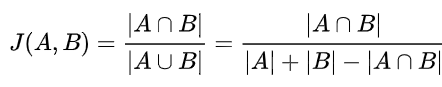

Fonte: https://pt.wikipedia.org/wiki/%C3%8Dndice_Jaccard

In [ ]:
def tabelas_distancia(df):
  #Calculando a tabela de distância com base na medição de Jaccard e nas tabelas de atribuições
  global dict_pdist
  dict_pdist = {}
  list_metric = ['jaccard'] #tipo de cálculo utilizado, nnão faz diferença entre igualdades positivas ou desigualdades. Igualdades negativas são ignoradas nos cálculos.
  for j in range(len(list_metric)):
    dict_pdist[j] = pdist(
        X = df_numeric,
        metric = str(list_metric[j]))

  #Ditribuição de Cálculos da Distância ao Quadrado - Jaccard
  global dict_pdist_squared
  dict_pdist_squared = squareform(X = dict_pdist[0])

  #Matrix de Similaridade + Carreiras na primeira coluna
  listaCarreira, column_value = [], []
  quant_carreiras = len(df)
  for i in range(0,quant_carreiras):
    column_value.append(df['Carreira'].values[i])
    listaCarreira = dict_pdist_squared[i]
  global tabelaDistCargos
  tabelaDistCargos = pd.DataFrame(dict_pdist_squared, columns=[column_value])
  tabelaDistCargos.insert(0, 'Carreira', column_value, allow_duplicates=False)

  #Cópia para trabalhar as correlações
  global tabelaCorrelation
  tabelaCorrelation = tabelaDistCargos
  tabelaCorrelation.reset_index(drop=True)

  #Ordem das variáveis retornadas abaixo
  #Utilização futura nas correlações
  #Ditribuição de Cálculos da Distância  -Jaccard
  #Ditribuição de Cálculos da Distância ao Quadrado  -Jaccard
  #Matrix de Similaridade
  #Cópia para trabalhar as correlações
  return dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation

In [ ]:
#Chamando as funções para definir as variáveis
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_atual_nocor)

Tabela de distâncias relativas.

In [ ]:
dict_pdist

{0: array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.91666667, 1.        ,
        1.        , 0.84210526, 0.91304348, 0.88888889, 1.        ,
        1.        , 1.        , 0.95      , 0.89473684, 0.94736842,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.91666667, 0.91666667, 0.90909091, 1.        ,
        0.84615385, 1.        , 1.        , 1.        , 1.        ,
        0.93333333, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.9       , 1.        , 1.        ,
        0.        , 0.        , 1.        , 1

Tabela de distâncias relativas elevada ao quadrado, para diminuir possíveis erros.

In [ ]:
dict_pdist_squared

array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.91666667, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.        , 0.84210526,
        0.91304348, 0.88888889, 1.        , 1.        , 1.        ,
        0.95      , 0.89473684, 0.94736842, 1.        ],
       [1.        , 1.        , 1.        , 0.84210526, 0.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.91666667, 0.91666667, 0.90909091, 1.        ],
       [1.        , 1.        , 1. 

Tabela da distribuição de distâncias entre cada cargo. Valores de zero indicam congruência perfeita (quando o mesmo cargos é comparada, o que pode ser observado na diagonal principal). Quanto mais próximo de zero e menos de um, mais assemelhados os cargos.

In [ ]:
tabelaDistCargos

Carreira Delegado de Polícia  \
0                   Delegado de Polícia                 0.0   
1                   Escrivão de Polícia                 1.0   
2               Investigador de Polícia                 1.0   
3                       Perito Criminal                 1.0   
4                        Médico Legista                 1.0   
5               Papiloscopista Policial                 1.0   
6   Auxiliar de Papiloscopista Policial                 1.0   
7   Agente de Telecomunicações Policial                 1.0   
8                       Agente Policial                 1.0   
9                   Carcereiro Policial                 1.0   
10           Fotógrafo Técnico Pericial                 1.0   
11          Desenhista Técnico Pericial                 1.0   
12       Auxiliar de Necrópsia Policial                 1.0   
13     Atendente de Necrotério Policial                 1.0   

   Escrivão de Polícia Investigador de Polícia Perito Criminal Médico Legista  \
0                  1.0                1.000000        1.000000       1.000000   
1                  0.0                1.000000        1.000000       1.000000   
2                  1.0                0.000000        1.000000       1.000000   
3                  1.0                1.000000        0.000000       0.842105   
4                  1.0                1.000000        0.842105       0.000000   
5                  1.0                1.000000        0.913043       1.000000   
6                  1.0                1.000000        0.888889       1.000000   
7                  1.0                1.000000        1.000000       1.000000   
8                  1.0                1.000000        1.000000       1.000000   
9                  1.0                1.000000        1.000000       1.000000   
10                 1.0                1.000000        0.950000       0.916667   
11                 1.0                0.916667        0.894737       0.916667   
12                 1.0                1.000000        0.947368       0.909091   
13                 1.0                1.000000        1.000000       1.000000   

   Papiloscopista Policial Auxiliar de Papiloscopista Policial  \
0                 1.000000                            1.000000   
1                 1.000000                            1.000000   
2                 1.000000                            1.000000   
3                 0.913043                            0.888889   
4                 1.000000                            1.000000   
5                 0.000000                            0.846154   
6                 0.846154                            0.000000   
7                 1.000000                            1.000000   
8                 1.000000                            1.000000   
9                 1.000000                            1.000000   
10                1.000000                            1.000000   
11                0.933333                            0.900000   
12                1.000000                            1.000000   
13                1.000000                            1.000000   

   Agente de Telecomunicações Policial Agente Policial Carcereiro Policial  \
0                                  1.0             1.0                 1.0   
1                                  1.0             1.0                 1.0   
2                                  1.0             1.0                 1.0   
3                                  1.0             1.0                 1.0   
4                                  1.0             1.0                 1.0   
5                                  1.0             1.0                 1.0   
6                                  1.0             1.0                 1.0   
7                                  0.0             0.0                 0.0   
8                                  0.0             0.0                 0.0   
9                                  0.0             0.0                 0.0   
10                  

Já é possível observar as similaridades os cargos em destaque:

Papiloscopista Policial x Perito Criminal: 0.913043.

Papiloscopista Policial x Investigador de Polícia: 1.000000.

Apesar de valores distantes de zero, o de Perito Criminal indica alguma similaridade, ao passo que o Investigador de Polícia nenhuma.

Abaixo cópia dessa tabela para utilização nos processamentos.

In [ ]:
tabelaCorrelation

Carreira Delegado de Polícia  \
0                   Delegado de Polícia                 0.0   
1                   Escrivão de Polícia                 1.0   
2               Investigador de Polícia                 1.0   
3                       Perito Criminal                 1.0   
4                        Médico Legista                 1.0   
5               Papiloscopista Policial                 1.0   
6   Auxiliar de Papiloscopista Policial                 1.0   
7   Agente de Telecomunicações Policial                 1.0   
8                       Agente Policial                 1.0   
9                   Carcereiro Policial                 1.0   
10           Fotógrafo Técnico Pericial                 1.0   
11          Desenhista Técnico Pericial                 1.0   
12       Auxiliar de Necrópsia Policial                 1.0   
13     Atendente de Necrotério Policial                 1.0   

   Escrivão de Polícia Investigador de Polícia Perito Criminal Médico Legista  \
0                  1.0                1.000000        1.000000       1.000000   
1                  0.0                1.000000        1.000000       1.000000   
2                  1.0                0.000000        1.000000       1.000000   
3                  1.0                1.000000        0.000000       0.842105   
4                  1.0                1.000000        0.842105       0.000000   
5                  1.0                1.000000        0.913043       1.000000   
6                  1.0                1.000000        0.888889       1.000000   
7                  1.0                1.000000        1.000000       1.000000   
8                  1.0                1.000000        1.000000       1.000000   
9                  1.0                1.000000        1.000000       1.000000   
10                 1.0                1.000000        0.950000       0.916667   
11                 1.0                0.916667        0.894737       0.916667   
12                 1.0                1.000000        0.947368       0.909091   
13                 1.0                1.000000        1.000000       1.000000   

   Papiloscopista Policial Auxiliar de Papiloscopista Policial  \
0                 1.000000                            1.000000   
1                 1.000000                            1.000000   
2                 1.000000                            1.000000   
3                 0.913043                            0.888889   
4                 1.000000                            1.000000   
5                 0.000000                            0.846154   
6                 0.846154                            0.000000   
7                 1.000000                            1.000000   
8                 1.000000                            1.000000   
9                 1.000000                            1.000000   
10                1.000000                            1.000000   
11                0.933333                            0.900000   
12                1.000000                            1.000000   
13                1.000000                            1.000000   

   Agente de Telecomunicações Policial Agente Policial Carcereiro Policial  \
0                                  1.0             1.0                 1.0   
1                                  1.0             1.0                 1.0   
2                                  1.0             1.0                 1.0   
3                                  1.0             1.0                 1.0   
4                                  1.0             1.0                 1.0   
5                                  1.0             1.0                 1.0   
6                                  1.0             1.0                 1.0   
7                                  0.0             0.0                 0.0   
8                                  0.0             0.0                 0.0   
9                                  0.0             0.0                 0.0   
10                  

Para melhorar a visualização, pode-se utilizar o HeatMap para ajudar a ver os valores que são correspondências perfeitas (0) e imperfeitas (1). Quanto mais o número próximo de zero, mais a similaridade. Lembrando que a diagonal central é a comparação de cargos idênticos.

In [ ]:
def heatmap_tabela_dist(tabelaCorrelation, titulo, color_map):
  tabelaCorrelation = tabelaCorrelation.set_index('Carreira')
  tabelaCorrelation = tabelaCorrelation.apply(pd.to_numeric, errors='coerce')

  fig, ax = plt.subplots(figsize=(18, 12))

  heatmap = sns.heatmap(tabelaCorrelation, annot=True, cbar=False)
  sns.heatmap(tabelaCorrelation, cmap = color_map, vmin = 0, vmax = 1,
              center = 0, linewidths=1, annot=True, square=True,
              linecolor='black', cbar=True)

  ax.set(xlabel=None)
  ax.set(ylabel=None)
  plt.title(titulo, fontsize=20)
  plt.show()

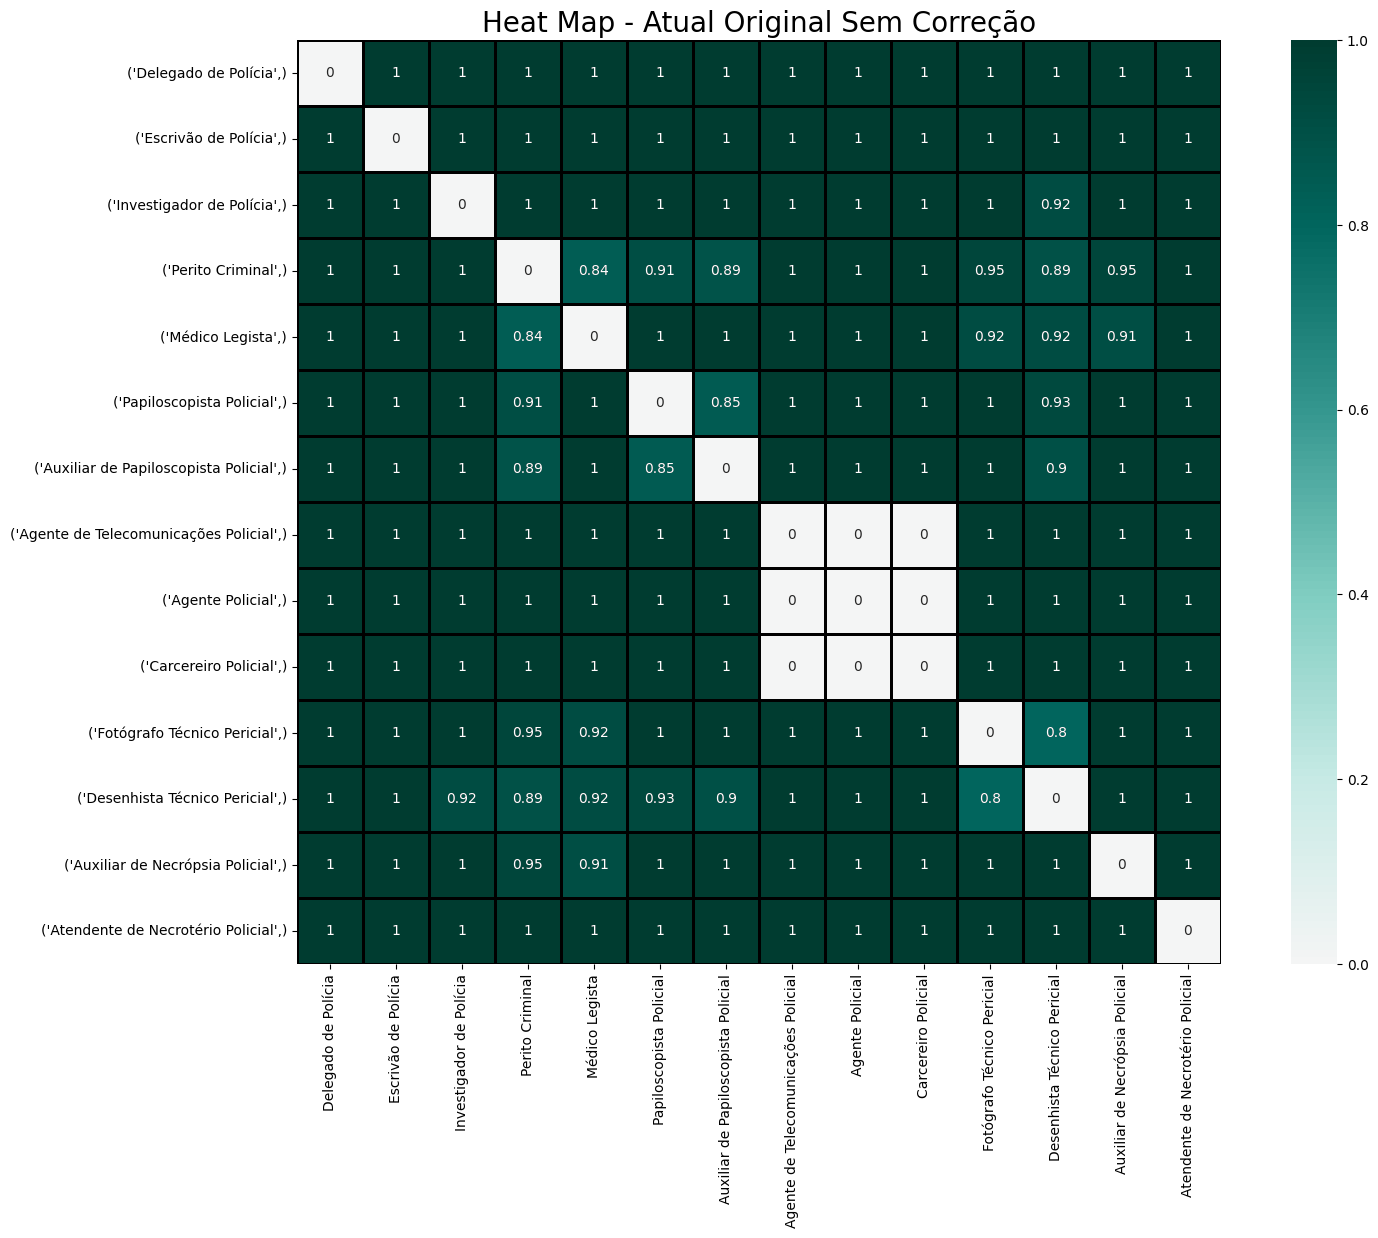

In [ ]:
titulo = "Heat Map - Atual Original Sem Correção"
color_map = "BrBG"

heatmap_tabela_dist(tabelaCorrelation, titulo, color_map)

####2.1.2 Condensada

Processamento dos dados.

In [ ]:
processamento_dados(cargos_atrib_atual_nocor_condensed)

gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos  \
0                                                   1                                                                        
1                                                   0                                                                        
2                                                   0                                                                        
3                                                   0                                                                        
4                                                   0                                                                        
5                                                   0                                                                        
6                                                   0                                                                        
7                                                   0                                                                        
8                                                   0                                                                        
9                                                   0                                                                        
10                                                  0                                                                        
11                                                  0                                                                        
12                                                  0                                                                        
13                                                  0                                                                        

    secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação  \
0                                                   0                                                                                                                 
1                                                   1                                                                                                                 
2                                                   0                                                                                                                 
3                                                   0                                                                                                                 
4                                                   0                                                                                                                 
5                                                   0                                                                                                                 
6                                                   0                                                                                                                 
7                                                   0                                                                                                                 
8                                                   0                                                                                                                 
9                                                   0                                                                                                                 
10                                                  0                                                                                                                 
11                                                  0                                                        

In [ ]:
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_atual_nocor_condensed)

Tabela de distâncias calculadas.

In [ ]:
dict_pdist

{0: array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.83333333, 1.        ,
        1.        , 0.57142857, 0.71428571, 0.71428571, 1.        ,
        1.        , 1.        , 0.875     , 0.77777778, 0.85714286,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.83333333, 0.875     , 0.8       , 1.        ,
        0.5       , 1.        , 1.        , 1.        , 1.        ,
        0.85714286, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.85714286, 1.        , 1.        ,
        0.        , 0.        , 1.        , 1

Tabela de distâncias elevada ao quadrado.

In [ ]:
dict_pdist_squared

array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.83333333, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.        , 0.57142857,
        0.71428571, 0.71428571, 1.        , 1.        , 1.        ,
        0.875     , 0.77777778, 0.85714286, 1.        ],
       [1.        , 1.        , 1.        , 0.57142857, 0.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.83333333, 0.875     , 0.8       , 1.        ],
       [1.        , 1.        , 1. 

Tabela de Correlação advinda da tabela de distâncias relativas calculadas.

In [ ]:
tabelaCorrelation

Carreira Delegado de Polícia  \
0                   Delegado de Polícia                 0.0   
1                   Escrivão de Polícia                 1.0   
2               Investigador de Polícia                 1.0   
3                       Perito Criminal                 1.0   
4                        Médico Legista                 1.0   
5               Papiloscopista Policial                 1.0   
6   Auxiliar de Papiloscopista Policial                 1.0   
7   Agente de Telecomunicações Policial                 1.0   
8                       Agente Policial                 1.0   
9                   Carcereiro Policial                 1.0   
10           Fotógrafo Técnico Pericial                 1.0   
11          Desenhista Técnico Pericial                 1.0   
12       Auxiliar de Necrópsia Policial                 1.0   
13     Atendente de Necrotério Policial                 1.0   

   Escrivão de Polícia Investigador de Polícia Perito Criminal Médico Legista  \
0                  1.0                1.000000        1.000000       1.000000   
1                  0.0                1.000000        1.000000       1.000000   
2                  1.0                0.000000        1.000000       1.000000   
3                  1.0                1.000000        0.000000       0.571429   
4                  1.0                1.000000        0.571429       0.000000   
5                  1.0                1.000000        0.714286       1.000000   
6                  1.0                1.000000        0.714286       1.000000   
7                  1.0                1.000000        1.000000       1.000000   
8                  1.0                1.000000        1.000000       1.000000   
9                  1.0                1.000000        1.000000       1.000000   
10                 1.0                1.000000        0.875000       0.833333   
11                 1.0                0.833333        0.777778       0.875000   
12                 1.0                1.000000        0.857143       0.800000   
13                 1.0                1.000000        1.000000       1.000000   

   Papiloscopista Policial Auxiliar de Papiloscopista Policial  \
0                 1.000000                            1.000000   
1                 1.000000                            1.000000   
2                 1.000000                            1.000000   
3                 0.714286                            0.714286   
4                 1.000000                            1.000000   
5                 0.000000                            0.500000   
6                 0.500000                            0.000000   
7                 1.000000                            1.000000   
8                 1.000000                            1.000000   
9                 1.000000                            1.000000   
10                1.000000                            1.000000   
11                0.857143                            0.857143   
12                1.000000                            1.000000   
13                1.000000                            1.000000   

   Agente de Telecomunicações Policial Agente Policial Carcereiro Policial  \
0                                  1.0             1.0                 1.0   
1                                  1.0             1.0                 1.0   
2                                  1.0             1.0                 1.0   
3                                  1.0             1.0                 1.0   
4                                  1.0             1.0                 1.0   
5                                  1.0             1.0                 1.0   
6                                  1.0             1.0                 1.0   
7                                  0.0             0.0                 0.0   
8                                  0.0             0.0                 0.0   
9                                  0.0             0.0                 0.0   
10                  

Verificando a similaridade condensada entre os cargos em pauta, chegamos aos seguintes valores:

Papiloscopista Policial x Perito Criminal: 0.714286.

Papiloscopista Policial x Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial): 1.000000.

A similaridade com o Perito Criminal com Papiloscopista Policial cresceu com o condensamento de atribuições. Com Investigador de Polícia, a dissimilaridade continua total.

Verificando o HeatMap.

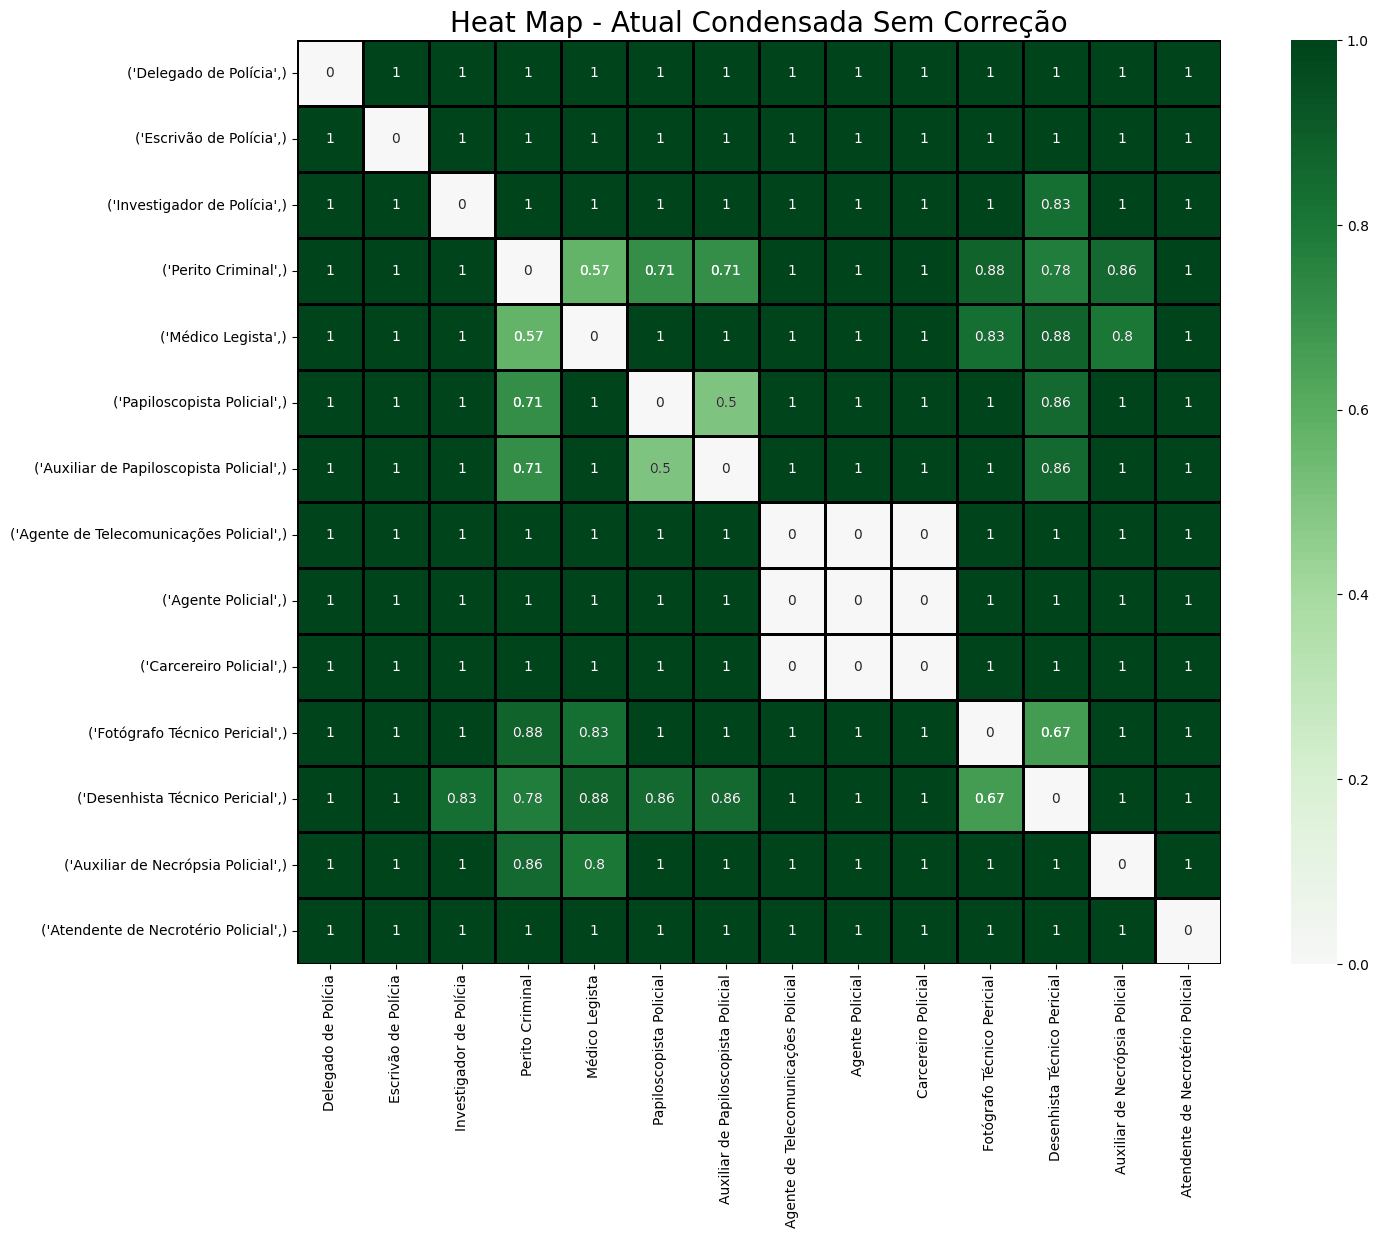

In [ ]:
titulo = "Heat Map - Atual Condensada Sem Correção"

color_map = "PRGn"

heatmap_tabela_dist(tabelaCorrelation, titulo, color_map)

##2.2 Atual com correção

####2.2.1 Original

Processamento dos dados.

In [ ]:
processamento_dados(cargos_atrib_atual_withcor)

gestão de polícia judiciária  presidir investigação criminal  \
0                              1                               1   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
5                              0                               0   
6                              0                               0   
7                              0                               0   
8                              0                               0   
9                              0                               0   
10                             0                               0   

    presidir atos de polícia judiciária  mediar conflitos  \
0                                     1                 1   
1                                     0                 0   
2                                     0                 0   
3                                     0                 0   
4                                     0                 0   
5                                     0                 0   
6                                     0                 0   
7                                     0                 0   
8                                     0                 0   
9                                     0                 0   
10                                    0                 0   

    secretariar atos de polícia judiciária / inquérito policial  \
0                                                   0             
1                                                   1             
2                                                   0             
3                                                   0             
4                                                   0             
5                                                   0             
6                                                   0             
7                                                   0             
8                                                   0             
9                                                   0             
10                                                  0             

    responsabilizar-se por apreensões  cumprir medidas de segurança orgânica  \
0                                   0                                      0   
1                                   1                                      1   
2                                   0                                      0   
3                                   0                                      0   
4                                   0                                      0   
5                                   0                                      0   
6                                   0                                      0   
7                                   0                                      0   
8                                   0                                      0   
9                                   0                                      0   
10                                  0                                      0   

    atuar na investigação  diligência e prevenção especializada de crimes  \
0                       0                                               0   
1                       1                                               0   
2                       1                                               1   
3                       0                                               0   
4                       0                                               0   
5                       0                                               0   
6                       0                                               0   
7                       0                                               

In [ ]:
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_atual_withcor)

Tabela de distâncias calculadas.

In [ ]:
dict_pdist

{0: array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.90909091, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.93333333,
        1.        , 1.        , 0.75      , 0.6969697 , 0.77777778,
        0.77272727, 0.84      , 0.88      , 0.92592593, 0.75757576,
        0.89285714, 0.91304348, 0.92      , 0.63157895, 0.71428571,
        0.45454545, 0.92307692, 0.8       , 0.88461538, 0.92857143,
        0.875     , 0.82352941, 0.88235294, 0.88888889, 0.72727273,
        0.81818182, 0.83333333, 0.84615385, 0.85714286, 0.84615385])}

Tabela de distâncias elevada ao quadrado.

In [ ]:
dict_pdist_squared

array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.90909091, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 0.90909091, 0.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.93333333, 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , 0.        , 0.75      ,
        0.6969697 , 0.77777778, 0.77272727, 0.84      , 0.88      ,
        0.92592593],
       [1.        , 1.        , 1.        , 0.75      , 0.        ,
        0.75757576, 0.89285714, 0.91304348, 0.92      , 0.63157895,
        0.71428571],
       [1.        , 1.        , 1.        , 0.6969697 , 0.75757576,
        0.        , 0.45454545, 0.92307692, 0.8       , 0.88461538,
        0.92857143],
       [1.        , 1.        , 1.        , 0.77777778, 0.

Tabela de Correlação advinda da tabela de distâncias relativas calculadas.

In [ ]:
tabelaCorrelation

Carreira Delegado de Polícia  \
0                                 Delegado de Polícia                 0.0   
1                                 Escrivão de Polícia                 1.0   
2   Investigador de Polícia (+ Agente de Telecomun...                 1.0   
3                                     Perito Criminal                 1.0   
4                                      Médico Legista                 1.0   
5                             Papiloscopista Policial                 1.0   
6                 Auxiliar de Papiloscopista Policial                 1.0   
7                          Fotógrafo Técnico Pericial                 1.0   
8                         Desenhista Técnico Pericial                 1.0   
9                      Auxiliar de Necrópsia Policial                 1.0   
10                   Atendente de Necrotério Policial                 1.0   

   Escrivão de Polícia  \
0             1.000000   
1             0.000000   
2             0.909091   
3             1.000000   
4             1.000000   
5             1.000000   
6             1.000000   
7             1.000000   
8             1.000000   
9             1.000000   
10            1.000000   

   Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial)  \
0                                            1.000000                                                        
1                                            0.909091                                                        
2                                            0.000000                                                        
3                                            1.000000                                                        
4                                            1.000000                                                        
5                                            1.000000                                                        
6                                            1.000000                                                        
7                                            1.000000                                                        
8                                            0.933333                                                        
9                                            1.000000                                                        
10                                           1.000000                                                        

   Perito Criminal Médico Legista Papiloscopista Policial  \
0         1.000000       1.000000                1.000000   
1         1.000000       1.000000                1.000000   
2         1.000000       1.000000                1.000000   
3         0.000000       0.750000                0.696970   
4         0.750000       0.000000                0.757576   
5         0.696970       0.757576                0.000000   
6         0.777778       0.892857                0.454545   
7         0.772727       0.913043                0.923077   
8         0.840000       0.920000                0.800000   
9         0.880000       0.631579                0.884615   
10        0.925926       0.714286                0.928571   

   Auxiliar de Papiloscopista Policial Fotógrafo Técnico Pericial  \
0                             1.000000                   1.000000   
1                             1.000000                   1.000000   
2                             1.000000                   1.000000   
3                             0.777778                   0.772727   
4                             0.892857                   0.913043   
5                             0.454545                   0.923077   
6                             0.000000                   0.875000   
7                             0.875000                   0.000000   
8                             0.823529                   0.727273   
9                             0.882353                   0.8181

Verificando a similaridade entre os cargos em pauta, chegamos aos seguintes valores:

Papiloscopista Policial x Perito Criminal: 0.696970.

Papiloscopista Policial x Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial): 1.000000.

A similaridade com o Perito Criminal cresceu ainda mais, ainda demonstrando a tendência pericial entre os dois cargos periciais vista sem as correções.

Verificando o HeatMap.

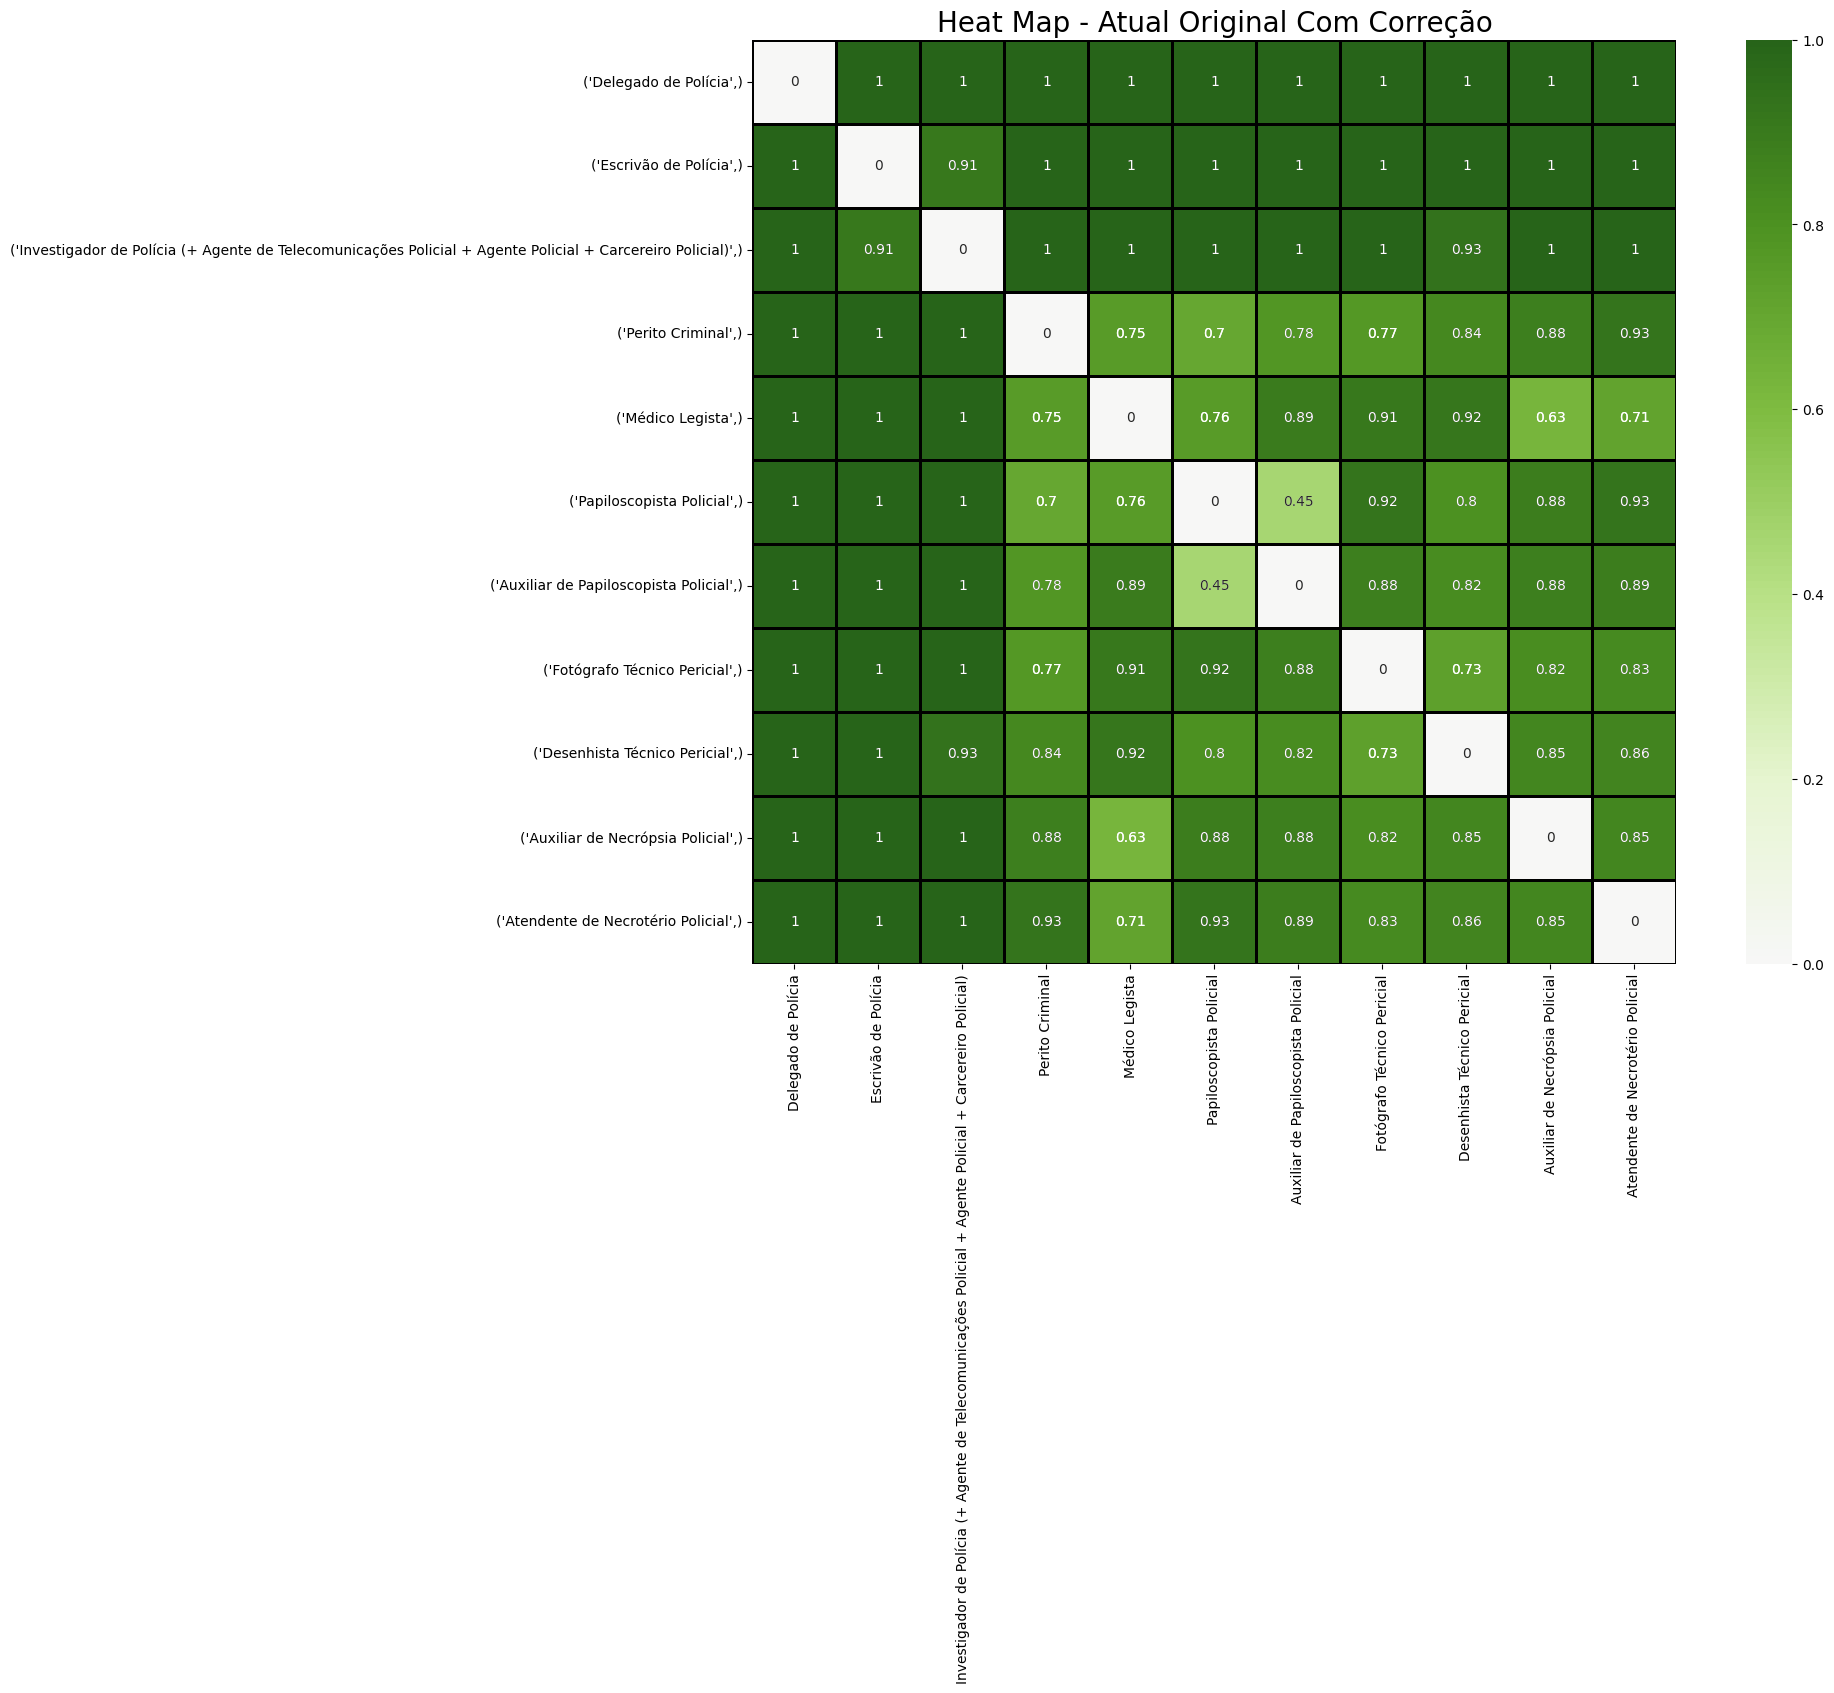

In [ ]:
titulo = "Heat Map - Atual Original Com Correção"

color_map = "PiYG"

heatmap_tabela_dist(tabelaCorrelation, titulo, color_map)

####2.2.2 Condensada

Processamento dos dados.

In [ ]:
processamento_dados(cargos_atrib_atual_withcor_condensed)

gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos  \
0                                                   1                                                                        
1                                                   0                                                                        
2                                                   0                                                                        
3                                                   0                                                                        
4                                                   0                                                                        
5                                                   0                                                                        
6                                                   0                                                                        
7                                                   0                                                                        
8                                                   0                                                                        
9                                                   0                                                                        
10                                                  0                                                                        

    secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica  \
0                                                   0                                                                                         
1                                                   1                                                                                         
2                                                   0                                                                                         
3                                                   0                                                                                         
4                                                   0                                                                                         
5                                                   0                                                                                         
6                                                   0                                                                                         
7                                                   0                                                                                         
8                                                   0                                                                                         
9                                                   0                                                                                         
10                                                  0                                                                                         

    atuar na investigação  \
0                       0   
1                       1   
2                       1   
3                       0   
4                       0   
5                       0   
6                       0   
7                       0   
8                       0   
9                       0   
10                      0   

    diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões / intervir em ocorrência policiais / transporte de pessoas / coisas de ocorrência policial / manusear armas de fogo e menos letais  \
0                                                   0                                                                                                                                                     

In [ ]:
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_atual_withcor_condensed)

Tabelas de distâncias relativas calculadas.

In [ ]:
dict_pdist

{0: array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.75      , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.875     ,
        1.        , 1.        , 0.69230769, 0.61538462, 0.6       ,
        0.8       , 0.75      , 0.81818182, 0.90909091, 0.69230769,
        0.81818182, 0.9       , 0.92307692, 0.5       , 0.77777778,
        0.44444444, 0.90909091, 0.75      , 0.81818182, 0.90909091,
        0.85714286, 0.77777778, 0.875     , 0.85714286, 0.71428571,
        0.83333333, 0.8       , 0.88888889, 0.875     , 0.83333333])}

Valores elevados ao quadrado para diminuir erros.

In [ ]:
dict_pdist_squared

array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.75      , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 0.75      , 0.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.875     , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , 0.        , 0.69230769,
        0.61538462, 0.6       , 0.8       , 0.75      , 0.81818182,
        0.90909091],
       [1.        , 1.        , 1.        , 0.69230769, 0.        ,
        0.69230769, 0.81818182, 0.9       , 0.92307692, 0.5       ,
        0.77777778],
       [1.        , 1.        , 1.        , 0.61538462, 0.69230769,
        0.        , 0.44444444, 0.90909091, 0.75      , 0.81818182,
        0.90909091],
       [1.        , 1.        , 1.        , 0.6       , 0.

Tabela de correlação, vinda da tabela de similaridade das distâncias calculadas entre os cargos.

In [ ]:
tabelaCorrelation

Carreira Delegado de Polícia  \
0                                 Delegado de Polícia                 0.0   
1                                 Escrivão de Polícia                 1.0   
2   Investigador de Polícia (+ Agente de Telecomun...                 1.0   
3                                     Perito Criminal                 1.0   
4                                      Médico Legista                 1.0   
5                             Papiloscopista Policial                 1.0   
6                 Auxiliar de Papiloscopista Policial                 1.0   
7                          Fotógrafo Técnico Pericial                 1.0   
8                         Desenhista Técnico Pericial                 1.0   
9                      Auxiliar de Necrópsia Policial                 1.0   
10                   Atendente de Necrotério Policial                 1.0   

   Escrivão de Polícia  \
0                 1.00   
1                 0.00   
2                 0.75   
3                 1.00   
4                 1.00   
5                 1.00   
6                 1.00   
7                 1.00   
8                 1.00   
9                 1.00   
10                1.00   

   Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial)  \
0                                               1.000                                                        
1                                               0.750                                                        
2                                               0.000                                                        
3                                               1.000                                                        
4                                               1.000                                                        
5                                               1.000                                                        
6                                               1.000                                                        
7                                               1.000                                                        
8                                               0.875                                                        
9                                               1.000                                                        
10                                              1.000                                                        

   Perito Criminal Médico Legista Papiloscopista Policial  \
0         1.000000       1.000000                1.000000   
1         1.000000       1.000000                1.000000   
2         1.000000       1.000000                1.000000   
3         0.000000       0.692308                0.615385   
4         0.692308       0.000000                0.692308   
5         0.615385       0.692308                0.000000   
6         0.600000       0.818182                0.444444   
7         0.800000       0.900000                0.909091   
8         0.750000       0.923077                0.750000   
9         0.818182       0.500000                0.818182   
10        0.909091       0.777778                0.909091   

   Auxiliar de Papiloscopista Policial Fotógrafo Técnico Pericial  \
0                             1.000000                   1.000000   
1                             1.000000                   1.000000   
2                             1.000000                   1.000000   
3                             0.600000                   0.800000   
4                             0.818182                   0.900000   
5                             0.444444                   0.909091   
6                             0.000000                   0.857143   
7                             0.857143                   0.000000   
8                             0.777778                   0.714286   
9                             0.875000                   0.8333

Verificando a similaridade condensada entre os cargos em pauta, chegamos aos seguintes valores:

Papiloscopista Policial x Perito Criminal: 0.615385.

Papiloscopista Policial x Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial): 1.000000.

A similaridade com o Perito Criminal com Papiloscopista Policial cresceu com o condensamento de atribuições e correções. Com o Investigador de Polícia, a dissimilaridade continua total.

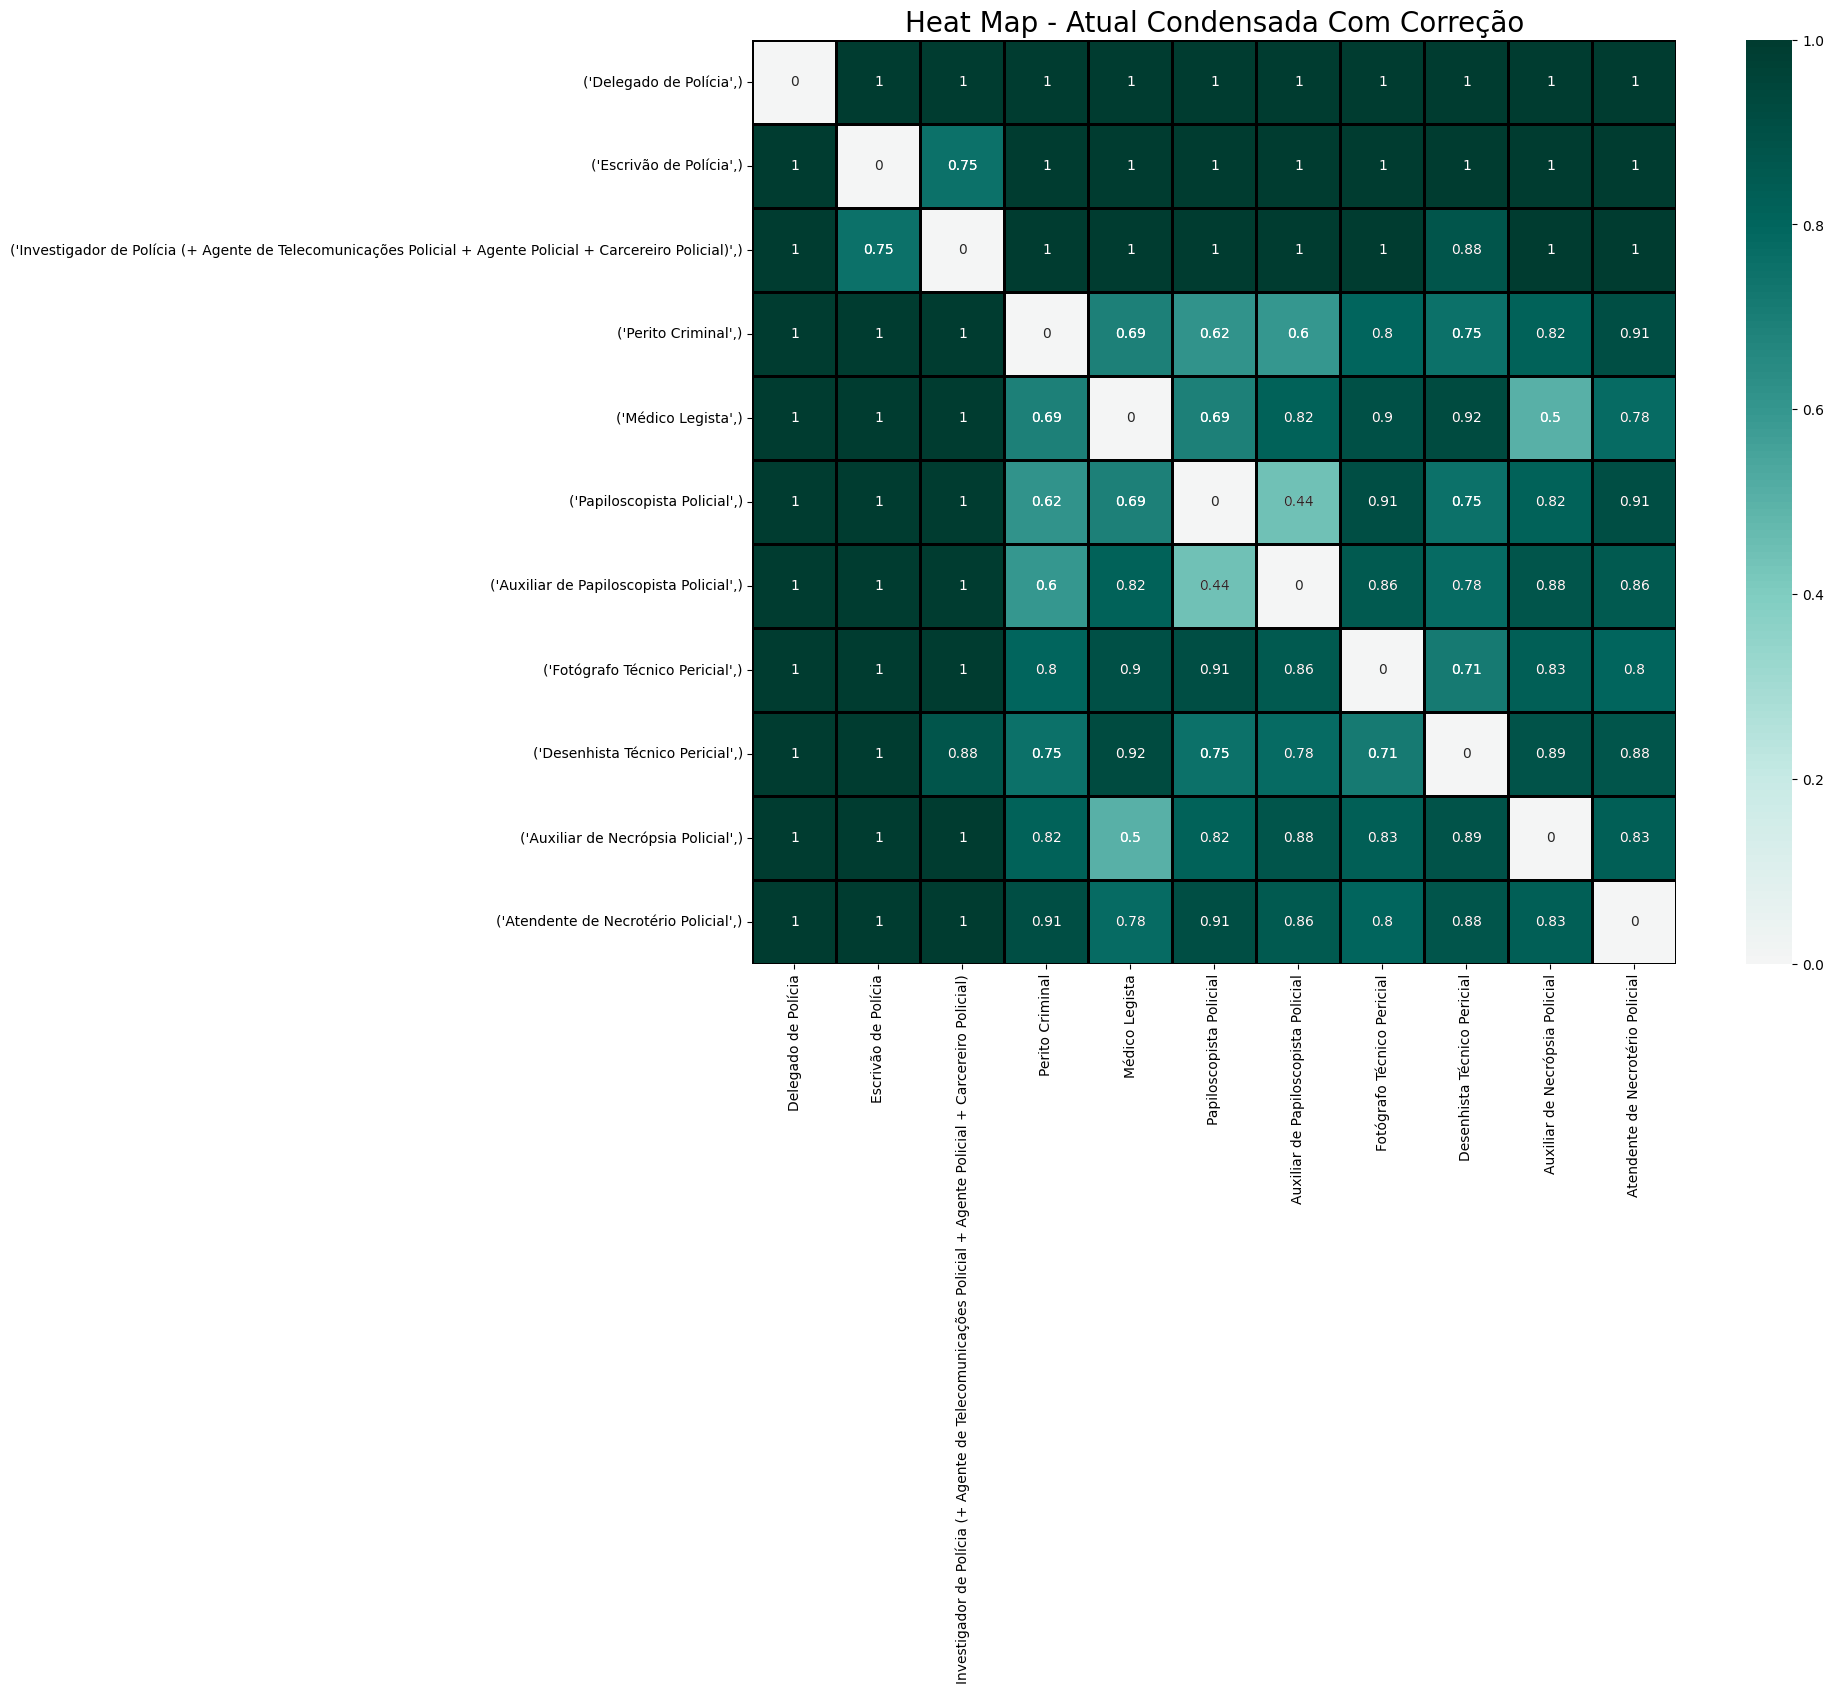

In [ ]:
titulo = "Heat Map - Atual Condensada Com Correção"

color_map = "BrBG"

heatmap_tabela_dist(tabelaCorrelation, titulo, color_map)

##2.3 LONPC sem correção


####2.3.1 Original

Processamento dos dados.

In [ ]:
processamento_dados(cargos_atrib_LONPC_nocor)

gestão de polícia judiciária  presidir investigação criminal  \
0                             1                               1   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
5                             0                               0   
6                             0                               0   
7                             0                               0   

   presidir atos de polícia judiciária  mediar conflitos  \
0                                    1                 1   
1                                    0                 0   
2                                    0                 0   
3                                    0                 0   
4                                    0                 0   
5                                    0                 0   
6                                    0                 0   
7                                    0                 0   

   secretariar atos de polícia judiciária / inquérito policial  \
0                                                  0             
1                                                  1             
2                                                  0             
3                                                  0             
4                                                  0             
5                                                  0             
6                                                  0             
7                                                  0             

   responsabilizar-se por apreensões  cumprir medidas de segurança orgânica  \
0                                  0                                      0   
1                                  1                                      1   
2                                  0                                      0   
3                                  0                                      0   
4                                  0                                      0   
5                                  0                                      0   
6                                  0                                      0   
7                                  0                                      0   

   atuar na investigação  diligência e prevenção especializada de crimes  \
0                      0                                               0   
1                      1                                               1   
2                      0                                               0   
3                      0                                               0   
4                      0                                               0   
5                      0                                               0   
6                      0                                               0   
7                      0                                               0   

   cumprir mandados  ...  identificação do cadáver latu sensu  \
0                 0  ...                                    0   
1                 1  ...                                    0   
2                 0  ...                                    0   
3                 0  ...                                    0   
4                 0  ...                                    0   
5                 0  ...                                    0   
6                 0  ...                                    0   
7                 0  ...                                    1   

   manuseio do cadáver em laboratório  manipulação de cadáver latu sensu  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0               

In [ ]:
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_LONPC_nocor)

Tabelas de distâncias relativas calculadas.

In [ ]:
dict_pdist

{0: array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.84210526, 0.91304348,
        0.88888889, 0.95454545, 0.96      , 1.        , 1.        ,
        0.92857143, 0.94117647, 0.84615385, 1.        , 1.        ,
        1.        , 1.        , 1.        ])}

Valores elevados ao quadrado para diminuir erros.

In [ ]:
dict_pdist_squared

array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.        , 0.84210526, 0.91304348,
        0.88888889, 0.95454545, 0.96      ],
       [1.        , 1.        , 0.84210526, 0.        , 1.        ,
        1.        , 0.92857143, 0.94117647],
       [1.        , 1.        , 0.91304348, 1.        , 0.        ,
        0.84615385, 1.        , 1.        ],
       [1.        , 1.        , 0.88888889, 1.        , 0.84615385,
        0.        , 1.        , 1.        ],
       [1.        , 1.        , 0.95454545, 0.92857143, 1.        ,
        1.        , 0.        , 1.        ],
       [1.        , 1.        , 0.96      , 0.94117647, 1.        ,
        1.        , 1.        , 0.        ]])

Tabela de correlação, vinda da tabela de similaridade das distâncias calculadas entre os cargos.

In [ ]:
tabelaCorrelation

Carreira Delegado de Polícia  \
0               Delegado de Polícia                 0.0   
1   Oficial Investigador de Polícia                 1.0   
2                   Perito Criminal                 1.0   
3                    Médico Legista                 1.0   
4             Perito Papiloscopista                 1.0   
5   Agente de Perícia Papiloscópica                 1.0   
6  Agente de Perícia Criminalística                 1.0   
7    Agente de Perícia Médico Legal                 1.0   

  Oficial Investigador de Polícia Perito Criminal Médico Legista  \
0                             1.0        1.000000       1.000000   
1                             0.0        1.000000       1.000000   
2                             1.0        0.000000       0.842105   
3                             1.0        0.842105       0.000000   
4                             1.0        0.913043       1.000000   
5                             1.0        0.888889       1.000000   
6                             1.0        0.954545       0.928571   
7                             1.0        0.960000       0.941176   

  Perito Papiloscopista Agente de Perícia Papiloscópica  \
0              1.000000                        1.000000   
1              1.000000                        1.000000   
2              0.913043                        0.888889   
3              1.000000                        1.000000   
4              0.000000                        0.846154   
5              0.846154                        0.000000   
6              1.000000                        1.000000   
7              1.000000                        1.000000   

  Agente de Perícia Criminalística Agente de Perícia Médico Legal  
0                         1.000000                       1.000000  
1                         1.000000                       1.000000  
2                         0.954545                       0.960000  
3                         0.928571                       0.941176  
4                         1.000000                       1.000000  
5                         1.000000                       1.000000  
6                         0.000000                       1.000000  
7                         1.000000                       0.000000

Verificando os valores de similaridade entre os cargos específicos:

Perito Papiloscopista x Perito Criminal: 0.913043.

Perito Papiloscopista  x Oficial Investigador de Polícia: 1.000000.

 Mesmo valor na situação atual sem correções. Apesar de valores distantes de zero, o de Perito Criminal indica alguma similaridade, ao passo que o Oficial Investigador de Polícia nenhuma.

HeatMap.

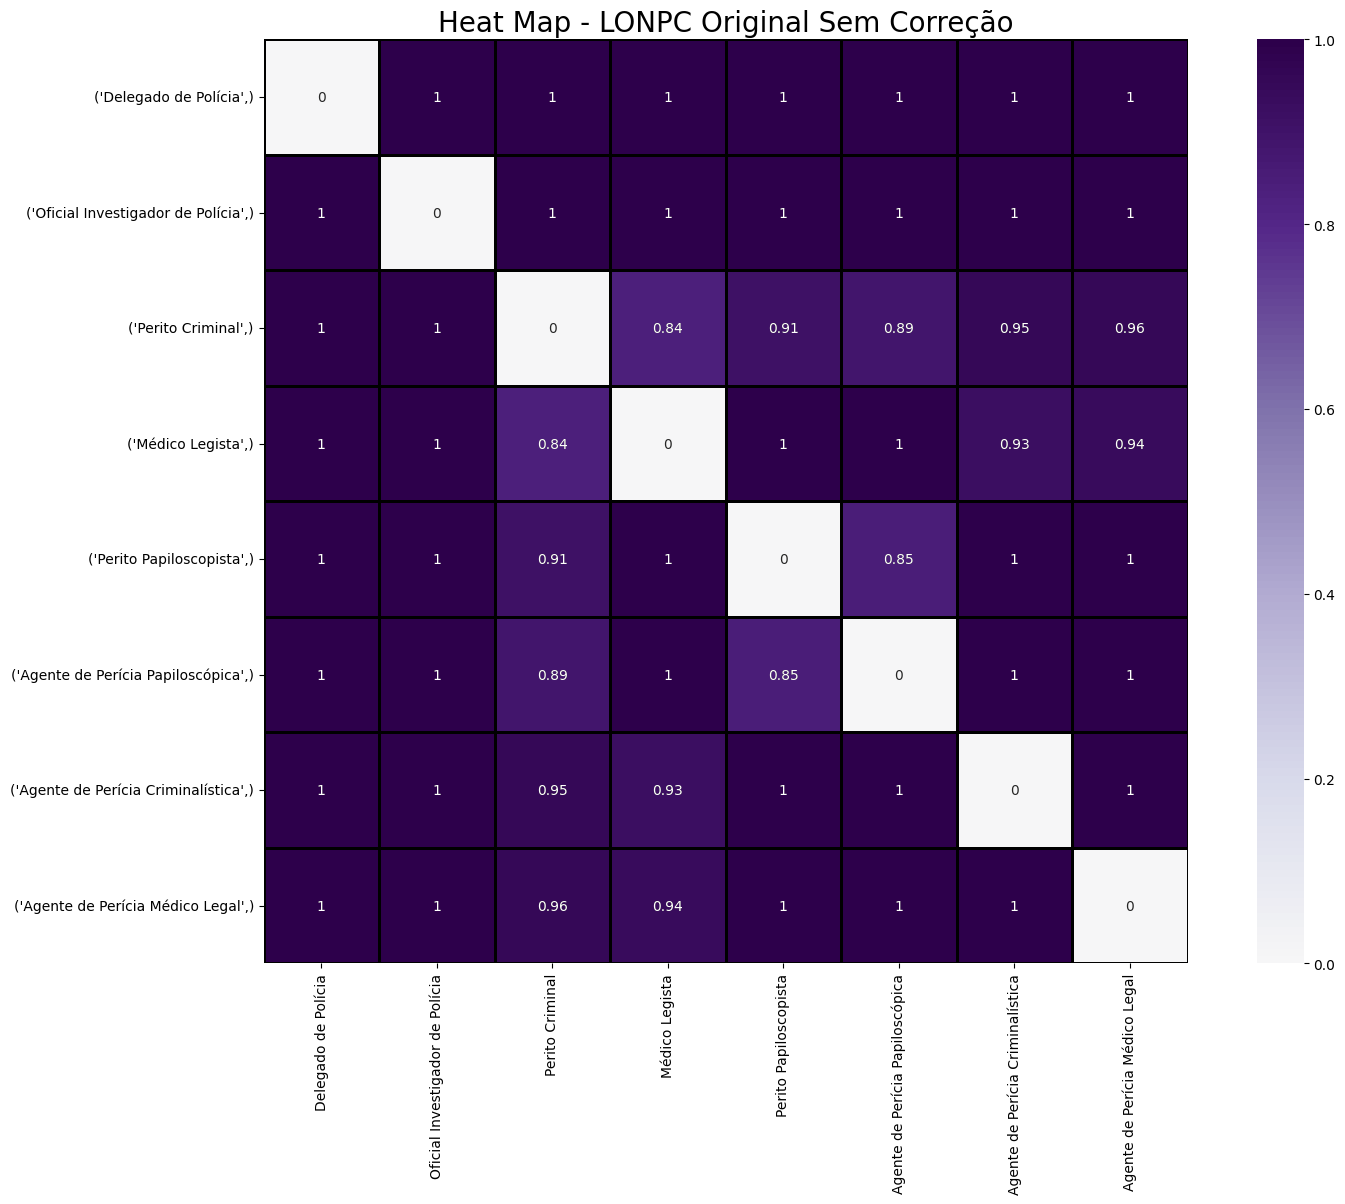

In [ ]:
titulo = "Heat Map - LONPC Original Sem Correção"

color_map = "PuOr"

heatmap_tabela_dist(tabelaCorrelation, titulo, color_map)

####2.3.2 Condensada

Processamento dos dados.

In [ ]:
processamento_dados(cargos_atrib_LONPC_nocor_condensed)

gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos  \
0                                                  1                                                                        
1                                                  0                                                                        
2                                                  0                                                                        
3                                                  0                                                                        
4                                                  0                                                                        
5                                                  0                                                                        
6                                                  0                                                                        
7                                                  0                                                                        

   secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação / diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões / segurança de locais de polícia judiciária / intervir em ocorrência policiais / transporte de pessoas / coisas de ocorrência policial / manusear armas de fogo e menos letais  \
0                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
1                                                  1                                                                                                                                                                                                                                                                                                                                                                                       
2                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
3                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
4                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
5                                                  0                                                                                                                                                                                                                                                                 

In [ ]:
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_LONPC_nocor_condensed)

Tabela de distância relativas.

In [ ]:
dict_pdist

{0: array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.5       , 0.83333333,
        0.83333333, 0.83333333, 0.83333333, 1.        , 1.        ,
        0.8       , 0.8       , 0.66666667, 1.        , 1.        ,
        1.        , 1.        , 1.        ])}

Tabelas com valores elevados ao quadrado para redução dos erros.

In [ ]:
dict_pdist_squared

array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.        , 0.5       , 0.83333333,
        0.83333333, 0.83333333, 0.83333333],
       [1.        , 1.        , 0.5       , 0.        , 1.        ,
        1.        , 0.8       , 0.8       ],
       [1.        , 1.        , 0.83333333, 1.        , 0.        ,
        0.66666667, 1.        , 1.        ],
       [1.        , 1.        , 0.83333333, 1.        , 0.66666667,
        0.        , 1.        , 1.        ],
       [1.        , 1.        , 0.83333333, 0.8       , 1.        ,
        1.        , 0.        , 1.        ],
       [1.        , 1.        , 0.83333333, 0.8       , 1.        ,
        1.        , 1.        , 0.        ]])

Tabela de Correlação, advinda da tabela de distâncias calculadas entre cargos.

In [ ]:
tabelaCorrelation

Carreira Delegado de Polícia  \
0               Delegado de Polícia                 0.0   
1   Oficial Investigador de Polícia                 1.0   
2                   Perito Criminal                 1.0   
3                    Médico Legista                 1.0   
4             Perito Papiloscopista                 1.0   
5   Agente de Perícia Papiloscópica                 1.0   
6  Agente de Perícia Criminalística                 1.0   
7    Agente de Perícia Médico Legal                 1.0   

  Oficial Investigador de Polícia Perito Criminal Médico Legista  \
0                             1.0        1.000000            1.0   
1                             0.0        1.000000            1.0   
2                             1.0        0.000000            0.5   
3                             1.0        0.500000            0.0   
4                             1.0        0.833333            1.0   
5                             1.0        0.833333            1.0   
6                             1.0        0.833333            0.8   
7                             1.0        0.833333            0.8   

  Perito Papiloscopista Agente de Perícia Papiloscópica  \
0              1.000000                        1.000000   
1              1.000000                        1.000000   
2              0.833333                        0.833333   
3              1.000000                        1.000000   
4              0.000000                        0.666667   
5              0.666667                        0.000000   
6              1.000000                        1.000000   
7              1.000000                        1.000000   

  Agente de Perícia Criminalística Agente de Perícia Médico Legal  
0                         1.000000                       1.000000  
1                         1.000000                       1.000000  
2                         0.833333                       0.833333  
3                         0.800000                       0.800000  
4                         1.000000                       1.000000  
5                         1.000000                       1.000000  
6                         0.000000                       1.000000  
7                         1.000000                       0.000000

Verificando a similaridade entre os cargos em pauta, chegamos aos seguintes valores:

Perito Papiloscopista x Perito Criminal: 0.833333.

Perito Papiloscopista Policial x Oficial Investigador de Polícia: 1.000000.

A dissimilaridade com o Oficial Investigador de Polícia e o Perito Papiloscopista continua. A similaridade com o Perito Criminal cresceu em relação ao original não condensado, ainda demonstrando a tendência pericial entre os dois cargos periciais vista sem as correções.

HeatMap gerado.

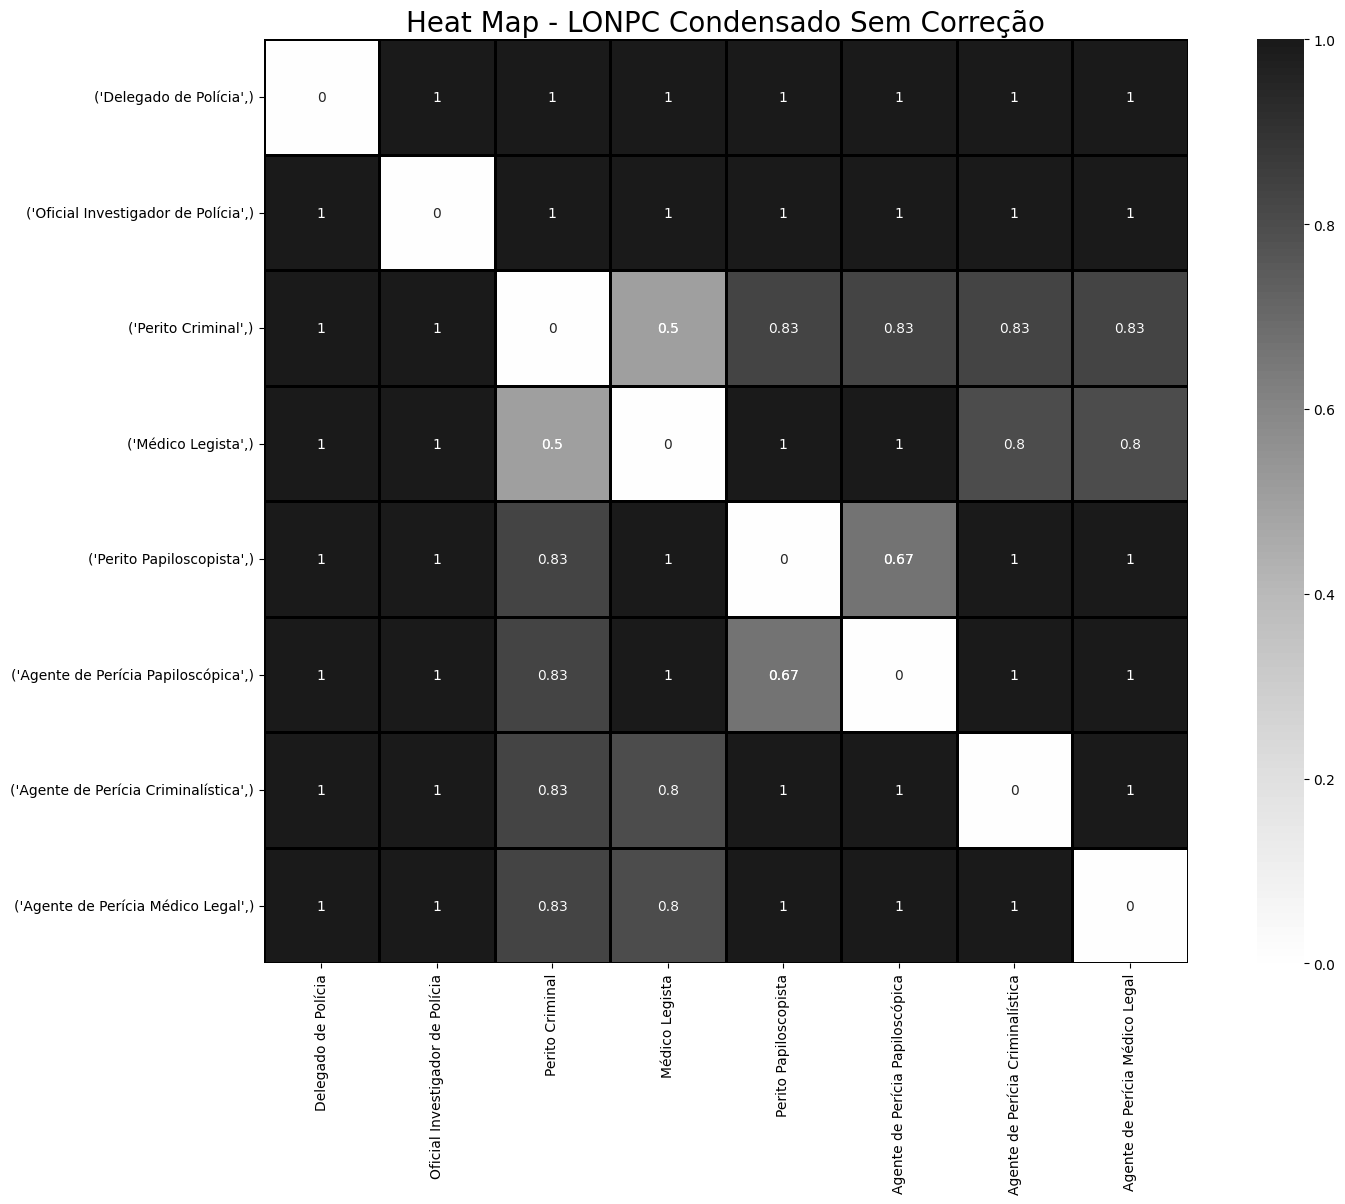

In [ ]:
titulo = "Heat Map - LONPC Condensado Sem Correção"

color_map = "RdGy"

heatmap_tabela_dist(tabelaCorrelation, titulo, color_map)

##2.4 LONPC com correção


####2.4.1 Original

Processamento dos dados.

In [ ]:
processamento_dados(cargos_atrib_LONPC_withcor)

gestão de polícia judiciária  presidir investigação criminal  \
0                             1                               1   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
5                             0                               0   
6                             0                               0   
7                             0                               0   

   presidir atos de polícia judiciária  mediar conflitos  \
0                                    1                 1   
1                                    0                 0   
2                                    0                 0   
3                                    0                 0   
4                                    0                 0   
5                                    0                 0   
6                                    0                 0   
7                                    0                 0   

   secretariar atos de polícia judiciária / inquérito policial  \
0                                                  0             
1                                                  1             
2                                                  0             
3                                                  0             
4                                                  0             
5                                                  0             
6                                                  0             
7                                                  0             

   responsabilizar-se por apreensões  cumprir medidas de segurança orgânica  \
0                                  0                                      0   
1                                  1                                      1   
2                                  0                                      0   
3                                  0                                      0   
4                                  0                                      0   
5                                  0                                      0   
6                                  0                                      0   
7                                  0                                      0   

   atuar na investigação  diligência e prevenção especializada de crimes  \
0                      0                                               0   
1                      1                                               1   
2                      0                                               0   
3                      0                                               0   
4                      0                                               0   
5                      0                                               0   
6                      0                                               0   
7                      0                                               0   

   cumprir mandados  ...  identificação do cadáver latu sensu  \
0                 0  ...                                    0   
1                 1  ...                                    0   
2                 0  ...                                    0   
3                 0  ...                                    1   
4                 0  ...                                    0   
5                 0  ...                                    0   
6                 0  ...                                    0   
7                 0  ...                                    1   

   manuseio do cadáver em laboratório  manipulação de cadáver latu sensu  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0               

In [ ]:
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_LONPC_withcor)

Tabela de distância relativas.

In [ ]:
dict_pdist

{0: array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.75      , 0.6875    ,
        0.77777778, 0.75      , 0.90322581, 0.78787879, 0.89285714,
        0.92307692, 0.47619048, 0.42857143, 0.84615385, 0.9375    ,
        0.89473684, 0.91304348, 0.9       ])}

Tabelas com valores elevados ao quadrado para redução dos erros.

In [ ]:
dict_pdist_squared

array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.        , 0.75      , 0.6875    ,
        0.77777778, 0.75      , 0.90322581],
       [1.        , 1.        , 0.75      , 0.        , 0.78787879,
        0.89285714, 0.92307692, 0.47619048],
       [1.        , 1.        , 0.6875    , 0.78787879, 0.        ,
        0.42857143, 0.84615385, 0.9375    ],
       [1.        , 1.        , 0.77777778, 0.89285714, 0.42857143,
        0.        , 0.89473684, 0.91304348],
       [1.        , 1.        , 0.75      , 0.92307692, 0.84615385,
        0.89473684, 0.        , 0.9       ],
       [1.        , 1.        , 0.90322581, 0.47619048, 0.9375    ,
        0.91304348, 0.9       , 0.        ]])

Tabela de Correlação, advinda da tabela de distâncias calculadas entre cargos.

In [ ]:
tabelaCorrelation

Carreira Delegado de Polícia  \
0               Delegado de Polícia                 0.0   
1   Oficial Investigador de Polícia                 1.0   
2                   Perito Criminal                 1.0   
3                    Médico Legista                 1.0   
4             Perito Papiloscopista                 1.0   
5   Agente de Perícia Papiloscópica                 1.0   
6  Agente de Perícia Criminalística                 1.0   
7    Agente de Perícia Médico Legal                 1.0   

  Oficial Investigador de Polícia Perito Criminal Médico Legista  \
0                             1.0        1.000000       1.000000   
1                             0.0        1.000000       1.000000   
2                             1.0        0.000000       0.750000   
3                             1.0        0.750000       0.000000   
4                             1.0        0.687500       0.787879   
5                             1.0        0.777778       0.892857   
6                             1.0        0.750000       0.923077   
7                             1.0        0.903226       0.476190   

  Perito Papiloscopista Agente de Perícia Papiloscópica  \
0              1.000000                        1.000000   
1              1.000000                        1.000000   
2              0.687500                        0.777778   
3              0.787879                        0.892857   
4              0.000000                        0.428571   
5              0.428571                        0.000000   
6              0.846154                        0.894737   
7              0.937500                        0.913043   

  Agente de Perícia Criminalística Agente de Perícia Médico Legal  
0                         1.000000                       1.000000  
1                         1.000000                       1.000000  
2                         0.750000                       0.903226  
3                         0.923077                       0.476190  
4                         0.846154                       0.937500  
5                         0.894737                       0.913043  
6                         0.000000                       0.900000  
7                         0.900000                       0.000000

Verificando a similaridade entre os cargos em pauta, chegamos aos seguintes valores:

Perito Papiloscopista x Perito Criminal: 0.687500.

Perito Papiloscopista Policial x Oficial Investigador de Polícia: 1.000000.

Dissimilaridade entre o Oficial Investigador de Polícia e o Perito papiloscopista continua máxima. A similaridade com o Perito Criminal cresceu ainda mais em relação a não corrigido, ainda demonstrando a tendência pericial entre os dois cargos periciais.

HeatMap gerado.

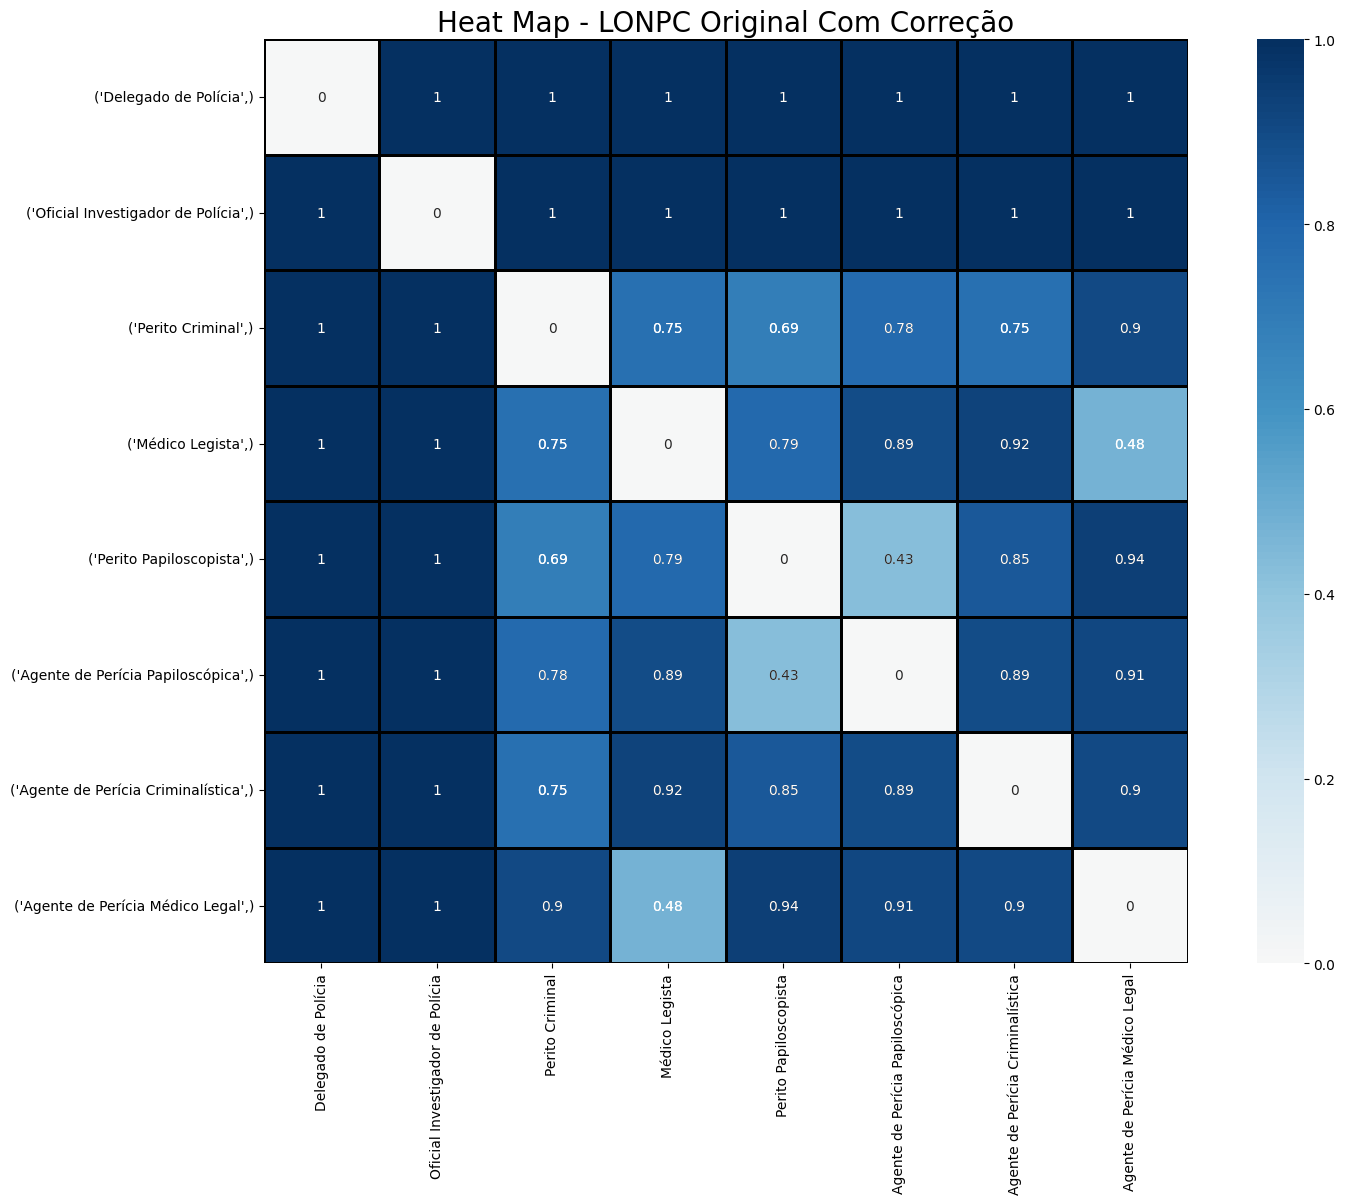

In [ ]:
titulo = "Heat Map - LONPC Original Com Correção"

color_map = "RdBu"

heatmap_tabela_dist(tabelaCorrelation, titulo, color_map)

####2.4.2 Condensada

Processamento dos dados.

In [ ]:
processamento_dados(cargos_atrib_LONPC_withcor_condensed)

gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos  \
0                                                  1                                                                        
1                                                  0                                                                        
2                                                  0                                                                        
3                                                  0                                                                        
4                                                  0                                                                        
5                                                  0                                                                        
6                                                  0                                                                        
7                                                  0                                                                        

   secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação / diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões / segurança de locais de polícia judiciária / intervir em ocorrência policiais / transporte de pessoas / coisas de ocorrência policial / manusear armas de fogo e menos letais  \
0                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
1                                                  1                                                                                                                                                                                                                                                                                                                                                                                       
2                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
3                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
4                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
5                                                  0                                                                                                                                                                                                                                                                 

In [ ]:
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_LONPC_withcor_condensed)

Tabela de distância relativas.

In [ ]:
dict_pdist

{0: array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.55555556, 0.6       ,
        0.625     , 0.77777778, 0.77777778, 0.7       , 0.75      ,
        0.88888889, 0.57142857, 0.42857143, 0.77777778, 0.9       ,
        0.85714286, 0.85714286, 0.85714286])}

Tabelas com valores elevados ao quadrado para redução dos erros.

In [ ]:
dict_pdist_squared

array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.        , 0.55555556, 0.6       ,
        0.625     , 0.77777778, 0.77777778],
       [1.        , 1.        , 0.55555556, 0.        , 0.7       ,
        0.75      , 0.88888889, 0.57142857],
       [1.        , 1.        , 0.6       , 0.7       , 0.        ,
        0.42857143, 0.77777778, 0.9       ],
       [1.        , 1.        , 0.625     , 0.75      , 0.42857143,
        0.        , 0.85714286, 0.85714286],
       [1.        , 1.        , 0.77777778, 0.88888889, 0.77777778,
        0.85714286, 0.        , 0.85714286],
       [1.        , 1.        , 0.77777778, 0.57142857, 0.9       ,
        0.85714286, 0.85714286, 0.        ]])

Tabela de Correlação, advinda da tabela de distâncias calculadas entre cargos.

In [ ]:
tabelaCorrelation

Carreira Delegado de Polícia  \
0               Delegado de Polícia                 0.0   
1   Oficial Investigador de Polícia                 1.0   
2                   Perito Criminal                 1.0   
3                    Médico Legista                 1.0   
4             Perito Papiloscopista                 1.0   
5   Agente de Perícia Papiloscópica                 1.0   
6  Agente de Perícia Criminalística                 1.0   
7    Agente de Perícia Médico Legal                 1.0   

  Oficial Investigador de Polícia Perito Criminal Médico Legista  \
0                             1.0        1.000000       1.000000   
1                             0.0        1.000000       1.000000   
2                             1.0        0.000000       0.555556   
3                             1.0        0.555556       0.000000   
4                             1.0        0.600000       0.700000   
5                             1.0        0.625000       0.750000   
6                             1.0        0.777778       0.888889   
7                             1.0        0.777778       0.571429   

  Perito Papiloscopista Agente de Perícia Papiloscópica  \
0              1.000000                        1.000000   
1              1.000000                        1.000000   
2              0.600000                        0.625000   
3              0.700000                        0.750000   
4              0.000000                        0.428571   
5              0.428571                        0.000000   
6              0.777778                        0.857143   
7              0.900000                        0.857143   

  Agente de Perícia Criminalística Agente de Perícia Médico Legal  
0                         1.000000                       1.000000  
1                         1.000000                       1.000000  
2                         0.777778                       0.777778  
3                         0.888889                       0.571429  
4                         0.777778                       0.900000  
5                         0.857143                       0.857143  
6                         0.000000                       0.857143  
7                         0.857143                       0.000000

Verificando a similaridade entre os cargos em pauta, chegamos aos seguintes valores:

Perito Papiloscopista x Perito Criminal: 0.600000	.

Perito Papiloscopista Policial x Oficial Investigador de Polícia: 1.000000.

A dissimilaridade com o Oficial Investigador de Polícia e o Perito Papiloscopista continua. A similaridade com o Perito Criminal cresceu em relação ao original não condensado e original, ainda demonstrando a tendência pericial entre os dois cargos periciais vista sem as correções. Foi o melhor valor obtido entre os dois cargos.

HeatMap gerado.

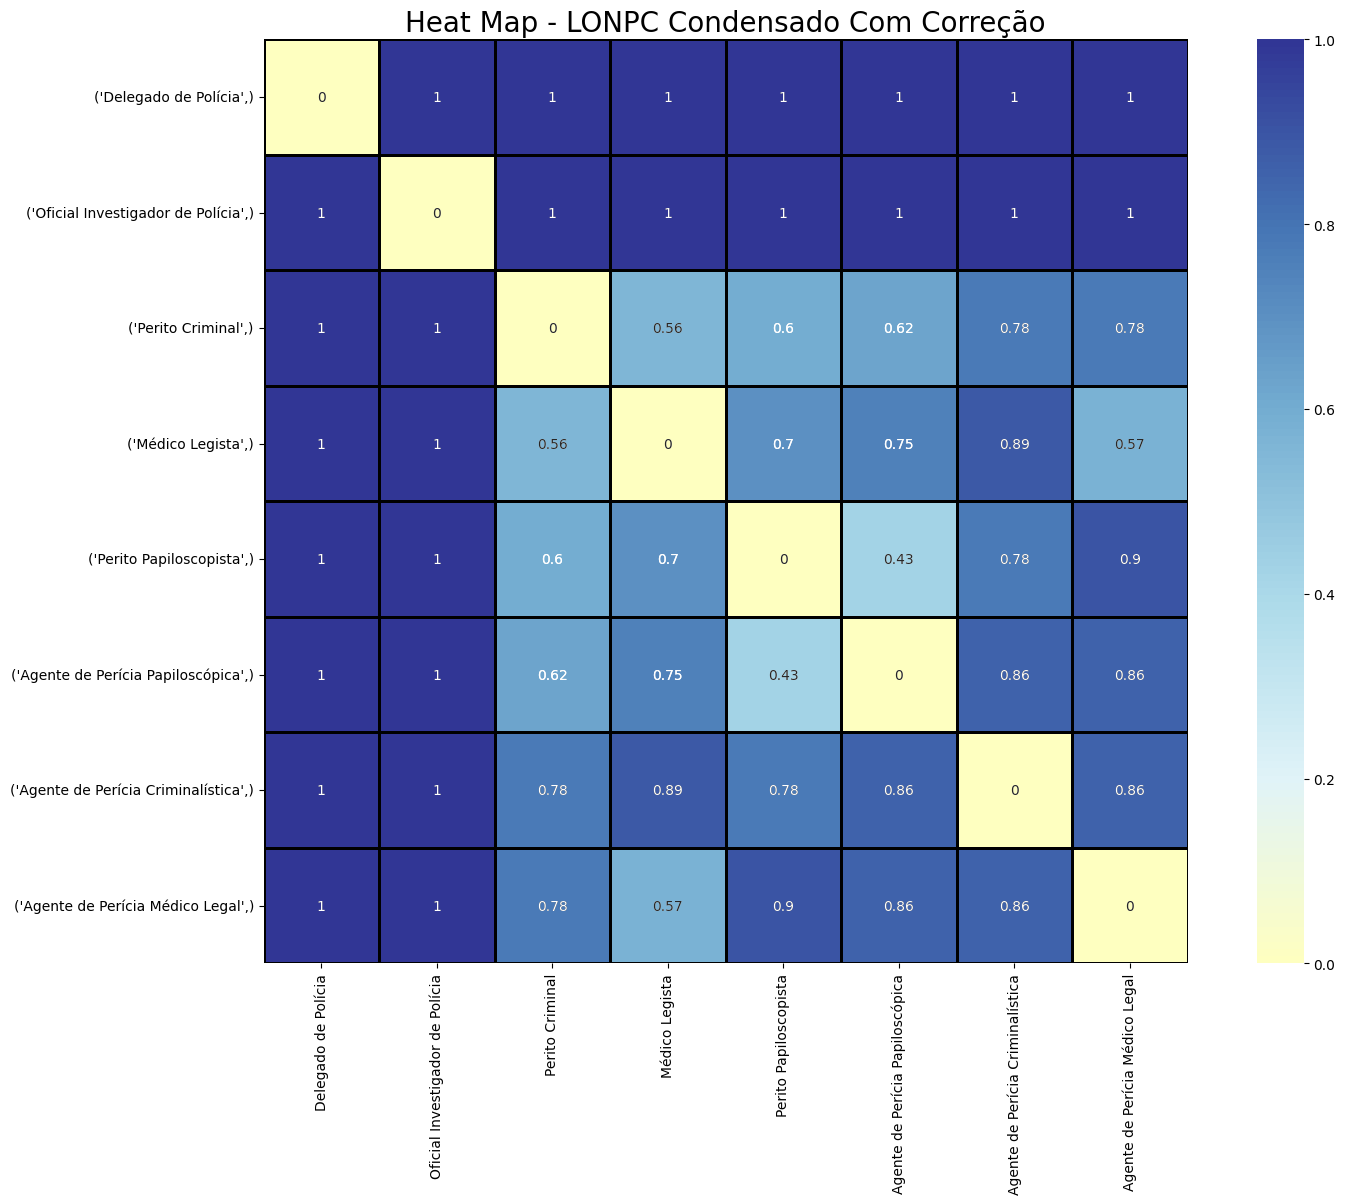

In [ ]:
titulo = "Heat Map - LONPC Condensado Com Correção"

color_map = "RdYlBu"

heatmap_tabela_dist(tabelaCorrelation, titulo, color_map)

##2.5 Comentários Gerais
Em nenhuma situação proposta houve similaridade entre Investigadores de Polícia e Papiloscopistas Policiais (valor sempre 1.0, de total dissimilaridade). A situação entre Perito Criminal e Papiloscopista Policial variou de 0.6 a 0.913043, indicando dissimilaridade, mas ainda menor do que com o Investigador de Polícia. Poucos os valores eram menores que 0.5 na totalidade dos cálculos, com o menor encontrado sendo 0.43. Tal fato faz sentido, já que muita similaridade indicaria talvez o mesmo cargo com poucas diferenças. Ainda que dissimilar em certo grau, esse os valores entre Papiloscopistas Policiais e Peritos indicam similaridade de atribuições. Valores mais baixos com Auxiliar de Papiloscopista são esperados, já que Papiloscopista Policiais realizam tudo que Auxiliares de Papiloscopista realizam, e estes também estão afeitos a perícia, ainda que em apoio.

#3 - Régua de Gower e Representação Linear
A biblioteca Gower permite ordenar os cargos a partir das distâncias relativas, criando uma tabela e uma imagem linear de separação dos cargos. No geral, a régua de Gower e a representação linear, de todos os tipos de visualizações, foram os que apresentaram resultados mais pobres, apesar de oferecerem algumas intrepretações interessantes ao caso.

##3.1 Atual sem correção

Organização da régua, levando em consideração os valores de distância. O cargo de Delegado de Polícia ficou na posição zero, por sempre ser o mais dissimilar entre todos os cargos, e serviu de "base" comparativa para os outros cargos.

####3.1.1 Original

In [ ]:
def regua_gower(df):
  quant_carreiras = len(df)

  #Função que explora os cargos com mais similaridades (menores valores) criando uma régua de similaridade
  #O cargo de Delegado de Polícia é o início da régua com valor zero
  global regua_gower
  regua_gower = gower.gower_topn(df.iloc[:,:], df, n = quant_carreiras)

  return regua_gower

In [ ]:
regua_gower(cargos_atrib_atual_nocor)

{'index': array([ 0,  7,  8,  9,  1,  6, 12, 10, 11, 13,  2,  4,  5,  3]),
 'values': array([0.        , 0.06849315, 0.06849315, 0.06849315, 0.12328767,
        0.1369863 , 0.1369863 , 0.15068494, 0.15068494, 0.15068494,
        0.16438356, 0.16438356, 0.20547946, 0.2739726 ], dtype=float32)}

Com a régua, é feita uma tabela para melhor visualização.

In [ ]:
#arrumar ordem dos cargos no mapeamento
def tabela_gower(df):
  #Jaccard'd Similarity Actual No Corrections Scale Panda Matrix
  global tabelaReguaGower
  tabelaReguaGower = pd.DataFrame(regua_gower)
  tabelaReguaGower.sort_values(by=['index'], inplace=True)

  #Mapeando as Carreiras
  mapping_carreira = {}
  for i, carreira in enumerate(df['Carreira']):
     mapping_carreira[carreira] = i
  inversão_mapeamento = {v: k for k, v in mapping_carreira.items()}

  tabelaReguaGower['index'] = tabelaReguaGower['index'].map(inversão_mapeamento).fillna(df['Carreira'])
  tabelaReguaGower.rename(columns={'index': "Carreira", 'values': "Distância Relativa (Jaccard)"}, inplace=True)
  tabelaReguaGower.reset_index(inplace=True, drop=True)
  tabelaReguaGower.sort_values("Distância Relativa (Jaccard)", inplace=True)
  #tabelaReguaGower.insert(1, "Iniciais", tabelaReguaGower['Carreira'].apply(lambda x: "".join([word[0] for word in x.split() if word[0].isupper()])))

  return tabelaReguaGower

In [ ]:
tabela_gower(cargos_atrib_atual_nocor)

Carreira  Distância Relativa (Jaccard)
0                   Delegado de Polícia                      0.000000
7   Agente de Telecomunicações Policial                      0.068493
8                       Agente Policial                      0.068493
9                   Carcereiro Policial                      0.068493
1                   Escrivão de Polícia                      0.123288
6   Auxiliar de Papiloscopista Policial                      0.136986
12       Auxiliar de Necrópsia Policial                      0.136986
10           Fotógrafo Técnico Pericial                      0.150685
11          Desenhista Técnico Pericial                      0.150685
13     Atendente de Necrotério Policial                      0.150685
2               Investigador de Polícia                      0.164384
4                        Médico Legista                      0.164384
5               Papiloscopista Policial                      0.205479
3                       Perito Criminal                      0.273973

Já é possível ver os seguintes resultados:
1. Delegado está no começo da lista com zero (Delegados).
2. Agente de Telecomunicações Policial, Agente policial e Carcereiro ocupam uma segunda posição (apoio a investigação)
3. Escrivão ocupa a parte de investigação após os cargos de apoio a investigação.
4. Auxiliar de Papiloscopista Policial e Auxiliar de Necrópsia Policial ocupam mesma posição após os anteriores (apoio a perícia).
5. Fotógrafo Técnico Pericial, Desenhista Ténico Pericial e Atendente de Necrotério ocupam o mesmo lugar (apoio a perícia).
6. Investigador de Polícia e Médico Legista ocupam o mesmo local, o que indica que a quantidade de atribuições pode estar causando um desvio da posição do Investigador de Polícia. (apoio a perícia e investigação).
7. O Papiloscopista Policial segue com o Perito Criminal em seguida, ocupando a ponta de Perícia.

Ao observar a Tabela de Gower, levando em consideração as distâncias relativas calculadas com a métrica de Jaccard, pode-se observar os valores de distância entre os cargos em pauta. Deve-se atentar que os valores estão em relação ao ponto zero (Delegado de Polícia).

Investigador de Polícia: 0.164384.

Papiloscopista Policial: 0.205479.

Perito Criminal: 0.273973.

O gráfico de representação linear abaixo pode indicar se, apesar dos valores entre Investigador de Polícia e Papiloscopista Policial serem menores em comparação com o Papiloscopista Policial e o Perito Criminal, se estes estariam em um mesmo grupo.


Criando a Representação Linear.

In [ ]:
def representacao_linear(titulo):

  global repr_linear
  repr_linear = tabelaReguaGower.copy()
  repr_linear['carreira'] = 0

  #Dropando colunas não numéricas antes do clustering
  numeric_repr_linear = repr_linear.select_dtypes(include=['number'])

  #Métrica Euclideana (comum), linkage do tipo single (agrupa os mais próximos)
  grupos = AgglomerativeClustering(n_clusters=n_grupos, metric='euclidean', linkage='single')

  #Cluster com Jaccard's Agglomerative Clustering
  global dist_linear
  dist_linear = grupos.fit_predict(numeric_repr_linear)

  #Criando a régua automatizada diretamente da Tabela de Distância dos cargos atuais com Jaccard sem correções
  position = ['top', 'bottom']
  fig, eixo = plt.subplots()
  fs = 6

  plt.scatter(tabelaReguaGower["Distância Relativa (Jaccard)"],tabelaReguaGower["Carreira"],c=grupos.labels_, cmap='rainbow')
  plt.xlabel("Distância Relativa (Jaccard)")
  plt.ylabel('Carreira')

  plt.title(titulo)
  plt.figure().set_figwidth(60)
  plt.show()

  return repr_linear, dist_linear

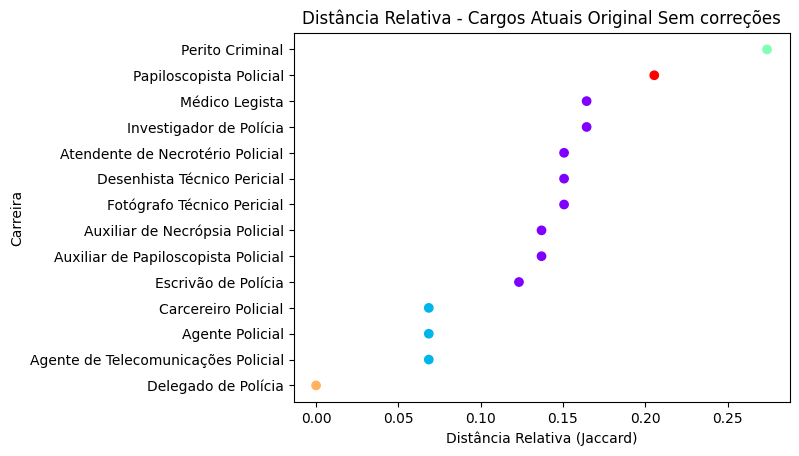

<Figure size 6000x480 with 0 Axes>

In [ ]:
n_grupos = 5 #Delegados, investigação, apoio investigação, perícia e apoio a perícia

titulo = 'Distância Relativa - Cargos Atuais Original Sem correções'

repr_linear, dist_linear = representacao_linear(titulo)

In [ ]:
dist_linear

array([3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2])

A separação linear permite verificar os grupos os quais cada cargo estarem de forma colorida. Verificando o gráfico acima, temos:
1. Delegado (laranja): somente Delegado de Polícia, na primeira posição.
2. Apoio a Investivação (azul): Agente de Telecomunicações Policial, Agente Policial e Carcereiro Policia.
3. Investigação e Apoio a Perícia: este foi o grupo (roxo) o qual mais ficou bagunçado, devendo ser divido em dois e retirando o último cargo, com:
  - Escrivão de Polícia (Investigação)
  - Auxiliar de Papiloscopia Policial, Auxiliar de Necrópsia Policial, Fotógrafo Técnico Policial, Desenhista Técnico Policial e Atendente de Necrotério (Apoio à Perícia)
  - Investigador (Investigação, claramente fora da posição devido quantidade de atribuições)
  - Médico Legista (Perícia, ficou neste grupo devido os valores próximos dos outros)
4. Perícias: os dois últimos cargos são de perícias, com o Papiloscopista Policial (vermelho) e Perito Criminal (Verde).

####3.1.2 Condensada

Primeiro, cálculo da régua de Gower.

In [ ]:
def regua_gower(df):
  quant_carreiras = len(df)

  #Função que explora os cargos com mais similaridades (menores valores) criando uma régua de similaridade
  #O cargo de Delegado de Polícia é o início da régua com valor zero
  global regua_gower
  regua_gower = gower.gower_topn(df.iloc[:,:], df, n = quant_carreiras)

  return regua_gower

In [ ]:
regua_gower(cargos_atrib_atual_nocor_condensed)

{'index': array([ 0,  7,  8,  9,  1, 13,  2, 12,  5,  6, 10,  4, 11,  3]),
 'values': array([0.        , 0.10526316, 0.10526316, 0.10526316, 0.15789473,
        0.15789473, 0.21052632, 0.21052632, 0.2631579 , 0.2631579 ,
        0.2631579 , 0.31578946, 0.36842105, 0.42105263], dtype=float32)}

Criação da tabela para melhor visualização.

In [ ]:
tabela_gower(cargos_atrib_atual_nocor_condensed)

Carreira  Distância Relativa (Jaccard)
0                   Delegado de Polícia                      0.000000
7   Agente de Telecomunicações Policial                      0.105263
8                       Agente Policial                      0.105263
9                   Carcereiro Policial                      0.105263
1                   Escrivão de Polícia                      0.157895
13     Atendente de Necrotério Policial                      0.157895
2               Investigador de Polícia                      0.210526
12       Auxiliar de Necrópsia Policial                      0.210526
5               Papiloscopista Policial                      0.263158
6   Auxiliar de Papiloscopista Policial                      0.263158
10           Fotógrafo Técnico Pericial                      0.263158
4                        Médico Legista                      0.315789
11          Desenhista Técnico Pericial                      0.368421
3                       Perito Criminal                      0.421053

Observando a tabela gerada com as correções:
1. Delegado está no começo da lista com zero (Delegados).
2. Agente de Telecomunicações Policial, Agente Policial e Carcereiro vem em seguida no grupo de apoio à investigação.
3. Escrivão de Polícia e Atendente de Necrotério Policial seguem com um valor em um grupo misto de investigação e apoio à perícia.
4. O Investigador de Polícia e Auxiliar de Necrópsia Policial aparecem com o mesmo valor, em mescla do grupo anterior.
5. Papiloscopista e Auxiliar de Papiloscopia aparecem com mesmo valor, em um grupo de papiloscopia, conjuntamente com o Fotógrafo Técnico Pericial.
6. Médico Legista é o próximo, seguido de Desenhista Técnico Pericial e por último o Perito Criminal.

Vendo a Tabela de Gower Condensada, levando em consideração as distâncias relativas calculadas com a métrica de Jaccard, pode-se observar os valores de distância entre os cargos em pauta. Deve-se atentar que os valores estão em relação ao ponto zero (Delegado de Polícia).

Investigador de Polícia : 0.210526.

Papiloscopista Policial: 0.263158.

Perito Criminal: 0.421053.

No geral, a régua ficou desorganizada, misturando boa parte dos grupos. Investigador de Policial tem valor mais próximo do Papiloscopista Policial, e o Perito Criminal atingiu valor extremo ao visto em outros casos. Contudo, sempre se deve observar os valores de Gower no prista de grupos e outras informações, como a representação linear.

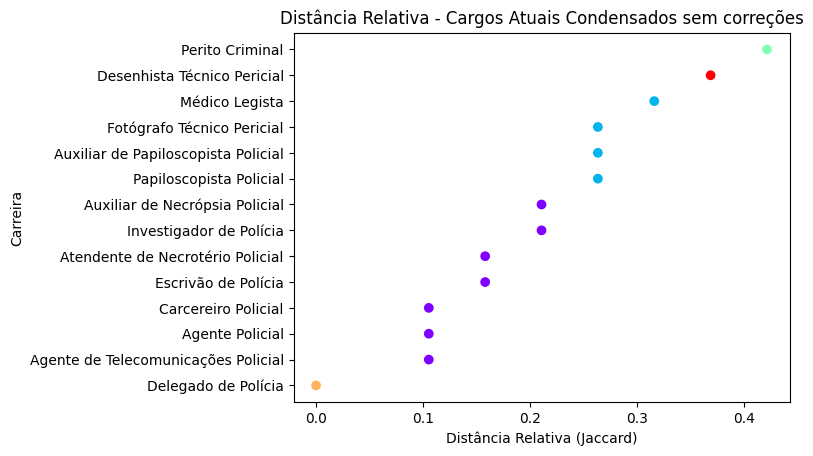

<Figure size 6000x480 with 0 Axes>

In [ ]:
n_grupos = 5 #Delegados, investigação, perícia, apoio a perícia e apoio a investigação.

titulo = 'Distância Relativa - Cargos Atuais Condensados sem correções'

repr_linear, dist_linear = representacao_linear(titulo)

A separação linear permite verificar os grupos os quais cada cargo estarem de forma colorida. Verificando o gráfico acima, temos:
1. Delegado (laranja): somente Delegado de Polícia, na primeira posição.
2. Apoio à Investigação, Investigação e Apoio à Medicina Legal (roxo): este grupo mesclou Agente de Telecomunicações Policial, Agente Policial, Carcereiro Policial, Escrivão de Polícia, Atendente de Necrotério Policial, Investigador de Polícia e Auxiliar de Necrópsia Policial. Este grupo foi o que mais se tornou desorganizado.
3. Papiloscopia, fotografia e Medicina Legal (azul): grupo contendo Papiloscopista Policial, Auxiliar de Papiloscopista Policial, Fotógrado Técnico Pericial e Médico Legista. Também houve desordem na organização deste grupo
4. Desenhista Técnico Pericial ficou isolado em um grupo (vermelho).
5. Perito Criminal no extremo em verde.

##3.2 Atual com correção

####3.2.1 Original

Primeiro, cálculo da régua de Gower.

In [ ]:
def regua_gower(df):
  quant_carreiras = len(df)

  #Função que explora os cargos com mais similaridades (menores valores) criando uma régua de similaridade
  #O cargo de Delegado de Polícia é o início da régua com valor zero
  global regua_gower
  regua_gower = gower.gower_topn(df.iloc[:,:], df, n = quant_carreiras)

  return regua_gower

In [ ]:
regua_gower(cargos_atrib_atual_withcor)

{'index': array([ 0,  1,  7,  9,  2,  8, 10,  6,  4,  3,  5]),
 'values': array([0.        , 0.12328767, 0.15068494, 0.16438356, 0.1780822 ,
        0.1780822 , 0.1780822 , 0.23287672, 0.32876712, 0.3561644 ,
        0.369863  ], dtype=float32)}

Criação da tabela para melhor visualização.

In [ ]:
tabela_gower(cargos_atrib_atual_withcor)

Carreira  \
0                                 Delegado de Polícia   
1                                 Escrivão de Polícia   
7                          Fotógrafo Técnico Pericial   
9                      Auxiliar de Necrópsia Policial   
2   Investigador de Polícia (+ Agente de Telecomun...   
8                         Desenhista Técnico Pericial   
10                   Atendente de Necrotério Policial   
6                 Auxiliar de Papiloscopista Policial   
4                                      Médico Legista   
3                                     Perito Criminal   
5                             Papiloscopista Policial   

    Distância Relativa (Jaccard)  
0                       0.000000  
1                       0.123288  
7                       0.150685  
9                       0.164384  
2                       0.178082  
8                       0.178082  
10                      0.178082  
6                       0.232877  
4                       0.328767  
3                       0.356164  
5                       0.369863

Observando a tabela gerada com as correções:
1. Delegado está no começo da lista com zero (Delegados).
2. Escrivão de Polícia segue com o grupo investigação.
3. O Fotógrafo Técnico Pericial e o Auxiliar de Necrópsia Policial seguem em um pequeno grupo de apoio a investigação.
4. O Investigador de Polícia, aglutinado com Agente de Telecomunicações Policial, Agente Policial e Carcereiro Policial, vem em terceiro com a investigação. O apoio a investigação neste caso deixa de existir. Mais uma vez, ele parece deslocado na régua.
5. Desenhista Técnico Pericial, Atendente de Necrotério Policial e Auxiliar de Papiloscopista Policial vem em um segundo grupo do apoio a perícia.
6. Todos os cargos periciais estão na ponta oposta, com os cargos na ordem de Médico Legista, Perito Criminal e Papiloscopista Policial.

Vendo a Tabela de Gower, levando em consideração as distâncias relativas calculadas com a métrica de Jaccard, pode-se observar os valores de distância entre os cargos em pauta. Deve-se atentar que os valores estão em relação ao ponto zero (Delegado de Polícia).

Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial): 0.178082.


Perito Criminal: 0.356164


Papiloscopista Policial: 0.369863.


Com as correções, o Papiloscopista Policial passa a ficar mais próximo do perito criminal em relação ao Investigador que Polícia, que aparentemente parece deslocado dentro do grupo de apoio a investigação. A representação linear pode auxiliar verificar a similaridade dos cargos.

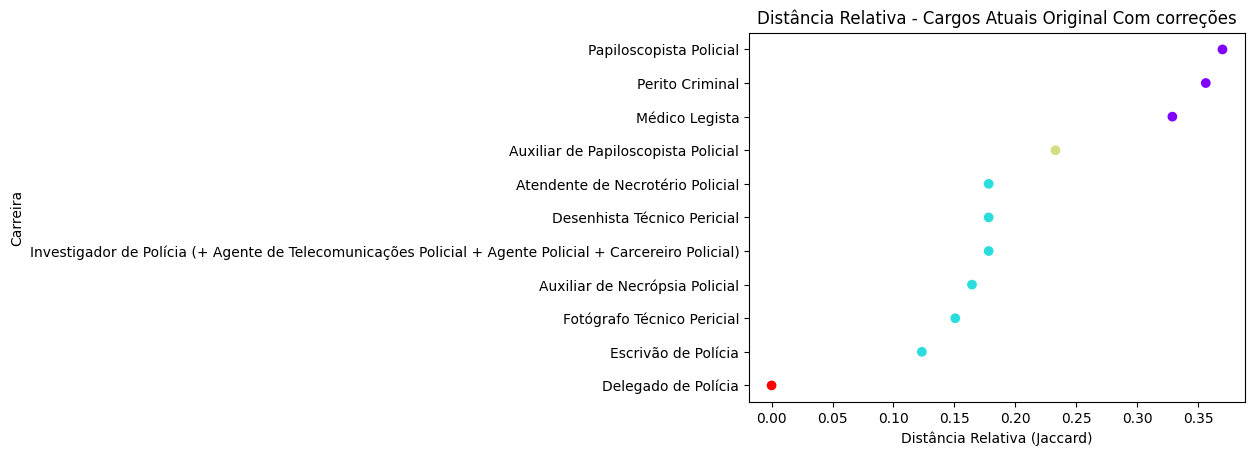

<Figure size 6000x480 with 0 Axes>

In [ ]:
n_grupos = 4 #Delegados, investigação, perícia e apoio a perícia. Apoio a investigação é suprimido devido a aglutinação de cargos.

titulo = 'Distância Relativa - Cargos Atuais Original Com correções'

repr_linear, dist_linear = representacao_linear(titulo)

Observando a representação linear dos cargos atuais corrigidos, podemos verificar:
1. Delegados seguem na bases sozinhos em vermelho, no grupo delegados.
2. Em azul há uma mistura do investigação com o apoio à perícia, com os cargos, nesta ordem, Escrivão de Polícia, Fotógrafo Técnico Pericial, Auxiliar de Necrópsia Policial, Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial), Desenhista Técnico Pericial e Atendente de Necrotério Policial. Aparentemente o Investigador continua deslocado na régua.
3. Em amarelo está o Auxiliar de Papiloscopista Policial, que deveria está no grupo de apoio à perícia.
4. Por fim, em roxo, grupo de perícia, com o Médico Legista, Perito Criminal e Papiloscopista Policial.

####3.2.2 Condensada

Iniciando com a régua de Gower.

In [ ]:
def regua_gower(df):
  quant_carreiras = len(df)

  #Função que explora os cargos com mais similaridades (menores valores) criando uma régua de similaridade
  #O cargo de Delegado de Polícia é o início da régua com valor zero
  global regua_gower
  regua_gower = gower.gower_topn(df.iloc[:,:], df, n = quant_carreiras)

  return regua_gower

In [ ]:
regua_gower(cargos_atrib_atual_withcor_condensed)

{'index': array([ 0,  1,  2,  7, 10,  9,  6,  8,  4,  3,  5]),
 'values': array([0.        , 0.16666667, 0.20833333, 0.20833333, 0.20833333,
        0.25      , 0.29166666, 0.33333334, 0.41666666, 0.45833334,
        0.45833334], dtype=float32)}

Criando a tabela para melhor visualizar.

In [ ]:
tabela_gower(cargos_atrib_atual_withcor_condensed)

Carreira  \
0                                 Delegado de Polícia   
1                                 Escrivão de Polícia   
2   Investigador de Polícia (+ Agente de Telecomun...   
7                          Fotógrafo Técnico Pericial   
10                   Atendente de Necrotério Policial   
9                      Auxiliar de Necrópsia Policial   
6                 Auxiliar de Papiloscopista Policial   
8                         Desenhista Técnico Pericial   
4                                      Médico Legista   
3                                     Perito Criminal   
5                             Papiloscopista Policial   

    Distância Relativa (Jaccard)  
0                       0.000000  
1                       0.166667  
2                       0.208333  
7                       0.208333  
10                      0.208333  
9                       0.250000  
6                       0.291667  
8                       0.333333  
4                       0.416667  
3                       0.458333  
5                       0.458333

Observando a tabela gerada com as correções e condensada:
1. Delegado está no começo da lista com zero (Delegados).
2. Escrivão de Polícia vem em segundo e depois o Investigador de Polícia (Investigação).
3. Um grande grupo de apoio a perícia segue, com Fotógrafo Técnico Pericial, Atendente de Necrotério Policial, Auxiliar de Necrópsia Policial, Auxiliar de Papiloscopista Policial e Desenhista Técnico Policial.
4. Por último, o grupo com os peritos, sendo o Médico Legista, o Perito Criminal e o Papiloscopista.

Vendo a Tabela de Gower Condensada, levando em consideração as distâncias relativas calculadas com a métrica de Jaccard, pode-se observar os valores de distância entre os cargos em pauta. Deve-se atentar que os valores estão em relação ao ponto zero (Delegado de Polícia).

Investigador de Polícia (+ Agente de Telecomunicações + Agente Policial + Carcereiro) : 0.208333.

Perito Criminal: 0.458333.

Papiloscopista Policial: 0.458333.

A regua se tornou bastante organizada, juntos cargos similares. Não só o Papiloscopista Policial se distanciou do Investigador de Polícia, como obteve o mesmo valor do Perito Criminal. Para melhor aferição dos dados, deve-se checar a representação linear.

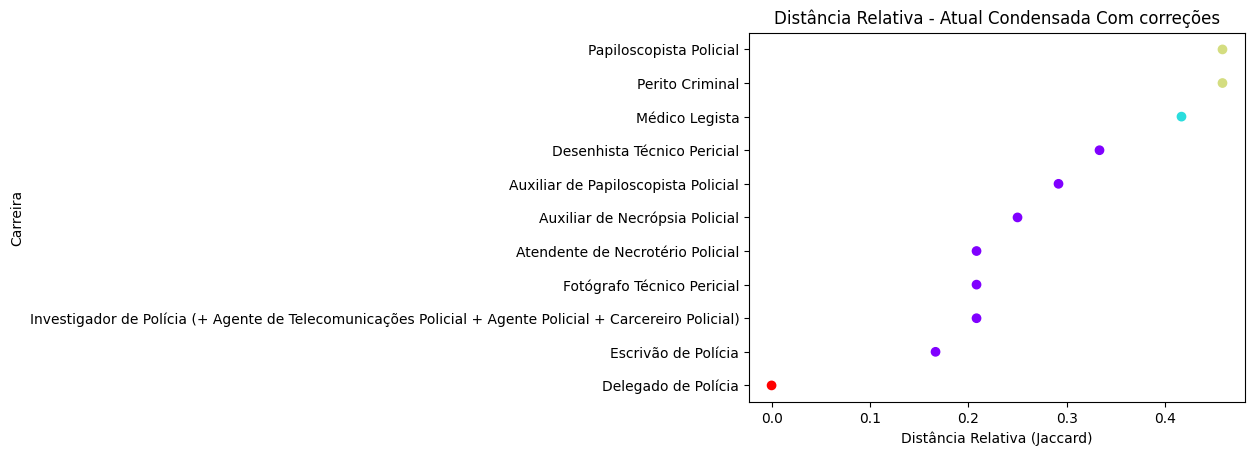

<Figure size 6000x480 with 0 Axes>

In [ ]:
n_grupos = 4 #Delegados, investigação, perícia e apoio a perícia.

titulo = 'Distância Relativa - Atual Condensada Com correções'

repr_linear, dist_linear = representacao_linear(titulo)

A separação linear permite verificar os grupos os quais cada cargo estarem de forma colorida. Verificando o gráfico acima, temos:
1. Delegado (vermelho): somente Delegado de Polícia, na primeira posição.
2. Investigação e apoio à perícias (roxo): ainda que mesclados devido valores próximos, há ordem entre os cargos, com Escrivão de Polícia, Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente POlicial + Carcereiro Policial), Fotógrafo Técnico Pericial, Atendente de Necrotério Policial, Auxiliar de Necrópsia Policial, Auxiliar de Papiloscopista Policial e Desenhista Técnico Pericial.
3. Médico Legista fica individualizado em um grupo azul de perícia médica.
4. Perito Criminal e Papiloscopista Policial assumem a extremidade com as perícias restante em amarelo.

##3.3 LONPC sem correção

####3.3.1 Original

Iniciando com a régua de Gower.

In [ ]:
def regua_gower(df):
  quant_carreiras = len(df)

  #Função que explora os cargos com mais similaridades (menores valores) criando uma régua de similaridade
  #O cargo de Delegado de Polícia é o início da régua com valor zero
  global regua_gower
  regua_gower = gower.gower_topn(df.iloc[:,:], df, n = quant_carreiras)

  return regua_gower

In [ ]:
regua_gower(cargos_atrib_LONPC_nocor)

{'index': array([0, 5, 3, 6, 4, 1, 7, 2]),
 'values': array([0.        , 0.1369863 , 0.16438356, 0.1780822 , 0.20547946,
        0.21917808, 0.21917808, 0.2739726 ], dtype=float32)}

Criando a tabela para melhor visualizar.

In [ ]:
tabela_gower(cargos_atrib_LONPC_nocor)

Carreira  Distância Relativa (Jaccard)
0               Delegado de Polícia                      0.000000
5   Agente de Perícia Papiloscópica                      0.136986
3                    Médico Legista                      0.164384
6  Agente de Perícia Criminalística                      0.178082
4             Perito Papiloscopista                      0.205479
1   Oficial Investigador de Polícia                      0.219178
7    Agente de Perícia Médico Legal                      0.219178
2                   Perito Criminal                      0.273973

Ao seguir a LONPC com as atribuições sem correções, é possível verificar:
1. Delegado está no começo da lista com zero (Delegados).
2. Agente de Perícia Papiloscópica vem em segundo.
3. Médico Legista em terceiro.
4. Agente de Perícia Criminalística segue.
5. Perito Papiloscopista vem em quarto.
6. Oficial Investigador de Polícia e Agente de Perícia Médico Legal seguem com o mesmo valor.
7. Por último, Perito Criminal.

Toda a régua apresenta desorganização nos grupos, o que indica que a mera passagem sem correções das atribuições poderia indicar cargos menos especialistas e mais generalistas, o que pode ser um perigo a carreiras tanto periciais quanto investigativas.

Observando a tabela, considerando o ponto base o Delegado de Polícia, as posições dos cargos em pauta ficam.

Perito Papiloscopista: 0.205479.

Oficial Investigador de Polícia: 0.219178.

Perito Criminal: 0.273973.


O Perito Papiloscopista fica mais basal em comparação ao Oficial Investigador de Polícia e ao Perito, além de mais próximo em termo numéricos brutos. Deve-se observar a representação linear para se ter uma ideia dos possíveis grupos.

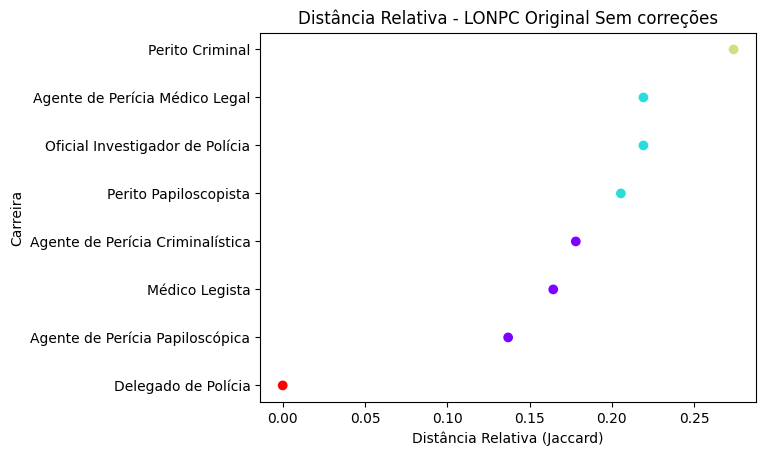

<Figure size 6000x480 with 0 Axes>

In [ ]:
n_grupos = 4 #Delegados, investigação, perícia e apoio a perícia.

titulo = 'Distância Relativa - LONPC Original Sem correções'

repr_linear, dist_linear = representacao_linear(titulo)

Observando a representação gerada pelo LONPC, podemos verificar:
1. Em vermelho, grupo do Delegado de Polícia, na base do gráfico.
2. Um segundo grupo em roxo com o Agente de Perícia Papiloscópica, Médico Legista e Agente de Perícia Criminalística.
3. Em azul, Perito Papiloscopista, Oficial Investigador de Polícia e Agente de Perícia Médico Legal.
4. Por fim, sozinho, em amarelo, Perito Criminal.

A representação pouco auxílio na separação dos grupos, o que indica desorganização no modelo gerado.

####3.3.2 Condensada

Início com a régua de Gower.

In [ ]:
def regua_gower(df):
  quant_carreiras = len(df)

  #Função que explora os cargos com mais similaridades (menores valores) criando uma régua de similaridade
  #O cargo de Delegado de Polícia é o início da régua com valor zero
  global regua_gower
  regua_gower = gower.gower_topn(df.iloc[:,:], df, n = quant_carreiras)

  return regua_gower

In [ ]:
regua_gower(cargos_atrib_LONPC_nocor_condensed)

{'index': array([0, 1, 4, 5, 6, 7, 3, 2]),
 'values': array([0.        , 0.23076923, 0.30769232, 0.30769232, 0.30769232,
        0.30769232, 0.46153846, 0.53846157], dtype=float32)}

Gerando a tabela para melhor visualizar.

In [ ]:
tabela_gower(cargos_atrib_LONPC_withcor)

Carreira  Distância Relativa (Jaccard)
0               Delegado de Polícia                      0.000000
1   Oficial Investigador de Polícia                      0.230769
4             Perito Papiloscopista                      0.307692
5   Agente de Perícia Papiloscópica                      0.307692
6  Agente de Perícia Criminalística                      0.307692
7    Agente de Perícia Médico Legal                      0.307692
3                    Médico Legista                      0.461538
2                   Perito Criminal                      0.538462

Observando a tabela gerada com as correções e condensada:
1. Delegado está no começo da lista com zero (Delegados).
2. Oficial Investigador de Polícia aparece em segundo no investigação.
3. Há grupo Perito Papiloscopista, Agente de Perícia Papiloscópica, Agente de Perícia Criminalística e Agente de Perícia Médico Legal, indicando um grupo de apoio a perícia com a perícia papiloscopica junto.
4. Médico Legista e Perito Criminal surgem distantes, com o resto das perícias.

Vendo a Tabela de Gower Condensada, levando em consideração as distâncias relativas calculadas com a métrica de Jaccard, pode-se observar os valores de distância entre os cargos em pauta. Deve-se atentar que os valores estão em relação ao ponto zero (Delegado de Polícia).

Oficial Investigador de Polícia : 0.230769.

Perito Papiloscopista: 0.307692.

Perito Criminal: 0.538462.

A régua está relativamente organizada com menos cargos e condensada, mas a falta de correções confunde a posição do Perito Papiloscopista. Isto pode ensejar que a mera aglutinação de similares sem se atentar a correções necessárias no distanciamento das perícias que já ocorre, evidenciando um tratamento histórico dado aos Peritos Papiloscopista e sendo relativamente evidenciado no números calculados. Como de praxe, deve-se verificar também a representação linear.

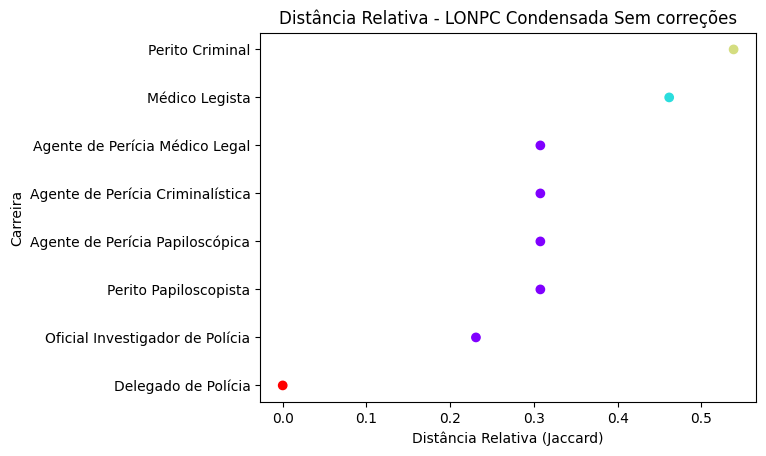

<Figure size 6000x480 with 0 Axes>

In [ ]:
n_grupos = 4 #Delegados, investigação, perícia e apoio a perícia.

titulo = 'Distância Relativa - LONPC Condensada Sem correções'

repr_linear, dist_linear = representacao_linear(titulo)

A separação linear permite verificar os grupos os quais cada cargo estarem de forma colorida. Verificando o gráfico acima, temos:
1. Delegado (laranja): somente Delegado de Polícia, na primeira posição.
2. Perícia Papiloscópica e Apoio à Perícias (roxo): o Periro Papiloscopista, seguido do Agente de Perícia Papiloscópica, Agente de Perícia Criminalística e Agente de Perícia Médico legal ficam em um grupo.
3. O Médico Legista em azul com perícias médico legais.
4. Perito Criminal na ponta com perícias criminalística em amarelo.

Com exceção do Perito Papiloscopista, há certa lógica na organização da representação.

##3.4 LONPC com correção


####3.4.1 Original

Início com a régua de Gower.

In [ ]:
def regua_gower(df):
  quant_carreiras = len(df)

  #Função que explora os cargos com mais similaridades (menores valores) criando uma régua de similaridade
  #O cargo de Delegado de Polícia é o início da régua com valor zero
  global regua_gower
  regua_gower = gower.gower_topn(df.iloc[:,:], df, n = quant_carreiras)

  return regua_gower

In [ ]:
regua_gower(cargos_atrib_LONPC_withcor)

{'index': array([0, 6, 1, 5, 7, 3, 2, 4]),
 'values': array([0.        , 0.19178082, 0.21917808, 0.23287672, 0.24657534,
        0.32876712, 0.3561644 , 0.3561644 ], dtype=float32)}

Gerando a tabela para melhor visualizar.

In [ ]:
tabela_gower(cargos_atrib_LONPC_withcor)

Carreira  Distância Relativa (Jaccard)
0               Delegado de Polícia                      0.000000
6  Agente de Perícia Criminalística                      0.191781
1   Oficial Investigador de Polícia                      0.219178
5   Agente de Perícia Papiloscópica                      0.232877
7    Agente de Perícia Médico Legal                      0.246575
3                    Médico Legista                      0.328767
2                   Perito Criminal                      0.356164
4             Perito Papiloscopista                      0.356164

Ao seguir a LONPC com as atribuições com correções, é possível verificar:
1. Delegado está no começo da lista com zero (Delegados).
2. Agente de Perícia Criminalística vem em segundo.
3. Oficial Investigador de Polícia vem em terceiro.
4. Agente de Perícia Papiloscópica e Agente de Perícia Médico Legal vem na ordem citada, um grupo de apoio à perícia.
5. O grupo de perícia aparece por último, com o Médico legista, Perito Criminal e Perito Papiloscopista.

Com exceção do agente de Perícia Criminalística e/ou Oficial Investigador de Polícia, todos aparentemente seguem uma lógica de posição e grupamento.

Observando a tabela, considerando o ponto base o Delegado de Polícia, as posições dos cargos em pauta ficam.

Oficial Investigador de Polícia: 0.219178.

Perito Criminal: 0.356164.

Perito Papiloscopista: 0.356164.


Não só o Oficial Investigador de Polícia fica mais basal como o Perito Criminal e o Perito Papiloscopista possuem a mesma posição. Como de praxe, observar a divisão proposta da representação linear.

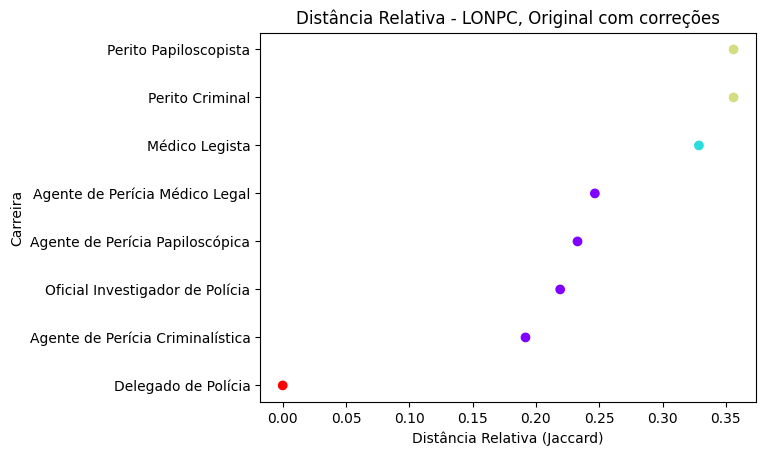

<Figure size 6000x480 with 0 Axes>

In [ ]:
n_grupos = 4 #Delegados, investigação, perícia e apoio a perícia.

titulo = 'Distância Relativa - LONPC, Original com correções'

repr_linear, dist_linear = representacao_linear(titulo)

Observando a representação linear proposta:
1. Delegado de Polícia está na base separado, em vermelho.
2. Há um grupo de apoio à perícia com Agente de Perícia Criminalística, Oficial Investigador de Polícia (possivelmente deslocado), Agente de Perícia Papiloscópica e Agente de Perícia Médico legal, em roxo.
3. Um primeiro grupo de perícia, com o Médico Legista.
4. Um segundo grupo de perícia, com Perito Criminal e Perito Papiloscopista.

Neste situação, excetuando a posição do Oficial Investigador de Polícia, há consonância nas posições apresentadas.

####3.4.2 Condensada

Início com a régua de Gower.

In [ ]:
def regua_gower(df):
  quant_carreiras = len(df)

  #Função que explora os cargos com mais similaridades (menores valores) criando uma régua de similaridade
  #O cargo de Delegado de Polícia é o início da régua com valor zero
  global regua_gower
  regua_gower = gower.gower_topn(df.iloc[:,:], df, n = quant_carreiras)

  return regua_gower

In [ ]:
regua_gower(cargos_atrib_LONPC_withcor_condensed)

{'index': array([0, 1, 5, 6, 7, 3, 2, 4]),
 'values': array([0.        , 0.1764706 , 0.3529412 , 0.3529412 , 0.3529412 ,
        0.47058824, 0.5294118 , 0.5294118 ], dtype=float32)}

Gerando a tabela para melhor visualizar.

In [ ]:
tabela_gower(cargos_atrib_LONPC_withcor_condensed)

Carreira  Distância Relativa (Jaccard)
0               Delegado de Polícia                      0.000000
1   Oficial Investigador de Polícia                      0.176471
5   Agente de Perícia Papiloscópica                      0.352941
6  Agente de Perícia Criminalística                      0.352941
7    Agente de Perícia Médico Legal                      0.352941
3                    Médico Legista                      0.470588
2                   Perito Criminal                      0.529412
4             Perito Papiloscopista                      0.529412

Observando a tabela gerada com as correções e condensada:
1. Delegado está no começo da lista com zero (Delegados).
2. Oficial Investigador de Polícia aparece em segundo no investigação.
3. Há o grupo de  Agente de Perícia Papiloscópica, Agente de Perícia Criminalística e Agente de Perícia Médico Legal, indicando um grupo de apoio a perícia como esperado.
4. Médico Legista aparecer, seguido do Perito Criminal e Perito Papiloscopista, formando o grupo das perícias.

Vendo a Tabela de Gower Condensada, levando em consideração as distâncias relativas calculadas com a métrica de Jaccard, pode-se observar os valores de distância entre os cargos em pauta. Deve-se atentar que os valores estão em relação ao ponto zero (Delegado de Polícia).

Oficial Investigador de Polícia : 0.176471.

Perito Criminal: 0.529412.

Perito Papiloscopista: 0.529412.

A régua está bem organizada, apresentando boa classificação e distanciamento no que poderia ser esperado dos grupos. Perito Criminal e Perito Papiloscopista assumem mesmos valores.

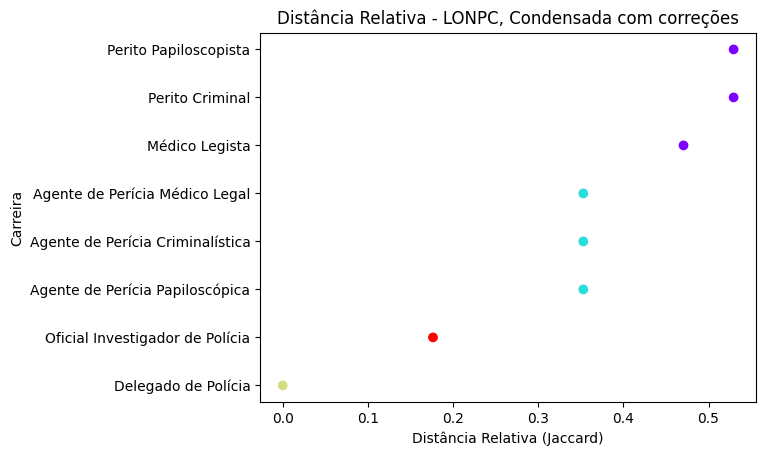

<Figure size 6000x480 with 0 Axes>

In [ ]:
n_grupos = 4 #Delegados, investigação, perícia e apoio a perícia.

titulo = 'Distância Relativa - LONPC, Condensada com correções'

repr_linear, dist_linear = representacao_linear(titulo)

O gráfico de separação linear indica os seguintes grupos:

1 - Delegados (amarelo): sozinhos na base:

2 - Oficial de Investigação PoliciaL (vermelho): cargo único de investigação, também basal.

3 - Apoio à perícia (azul): os Agentes de Perícia Papiloscópica, Criminalística e Médico legal estão juntos.

4 - Peritos (roxo): Médico Legista, Perito Criminal e Papiloscopistas estão no topo, juntos, como perito.

Tal gráfico se demonstrou como um bom divisor, e uma forma de organização tanto em atribuições como em similaridade para os cargos.

##3.5 - Comentários Gerais
A situação atual sem correções já aponta proximidade entre o Perito Criminal com o Papiloscopista, principalmente quando a quantidade de atribuições não é reduzida. Tal fato é reduzido com a aglutinação de atribuições, mas ainda assim estão em grupos de perícia e apoio a essa.

As correções propostas sempre levam Peritos Criminais e Papiloscopista Policiais a ficarem próximos, algumas vezes em mesma posição, distanciando do Investigador de Polícia.

Ao tentar adequar a LONPC, a mera transposição da situação dos editais leva o Investigador a ficar entre as perícias quando a tabela original não reduzida é utilizada. Ao condensar, o Papiloscopista Policial fica mais próximo do Investigador de Polícia, distantes dos outros peritos. Isso sugere que a adequação a LONPC deve vir acompanhada de correções para que todas as atribuições sejam levadas em conta, e uma má restruturação poderia deixar Papiloscopista em situação díspar dos outros peritos.

Quando levadas a LONPC com correções, a situação fica mais estável, com pouco se divergindo, atingindo a melhor representação na condensada, onde os grupos gerados coadunaram com a proposta da LONPC e seguem a lógica de Delegados de Polícia, Investigação, Apoio à Perícia e Peritos.

#4 - Dendogramas e Índice Cofenético
Com os dados das tabelas de distâncias feitas no item 2, é possível gerar dendogramas similares a árvores taxônomicas para efeito comparativa.
Após a criação, pode-se calcular o índice cofenético para verificar a correlação entre a tabela de distância e o dendograma. É utilizado a mesma lógica do coeficiente de Pearson. Valores próximos a 1 indicam correlação positiva forte, próximos a -1, correlação negativa forte, próximos a 0, não há correlação.

##4.1 Atual sem correção


####4.1.1 Original

Inicialmente, criar o organizador segundo a tabela de distâncias geradas no item 2.


In [ ]:
def gerando_dict_pdict(df_dist):
  global dict_pdict
  dict_pdict = {}
  global distance_matrix
  distance_matrix = np.concatenate(list(df_dist.values()))

  dict_pdict = linkage(
        y = distance_matrix,
        method = 'single',
        metric = 'jaccard',
        optimal_ordering = True
  )
  return dict_pdict

Calculando dict_pdist novamente.

In [ ]:
processamento_dados(cargos_atrib_atual_nocor)

gestão de polícia judiciária  presidir investigação criminal  \
0                              1                               1   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
5                              0                               0   
6                              0                               0   
7                              0                               0   
8                              0                               0   
9                              0                               0   
10                             0                               0   
11                             0                               0   
12                             0                               0   
13                             0                               0   

    presidir atos de polícia judiciária  mediar conflitos  \
0                                     1                 1   
1                                     0                 0   
2                                     0                 0   
3                                     0                 0   
4                                     0                 0   
5                                     0                 0   
6                                     0                 0   
7                                     0                 0   
8                                     0                 0   
9                                     0                 0   
10                                    0                 0   
11                                    0                 0   
12                                    0                 0   
13                                    0                 0   

    secretariar atos de polícia judiciária / inquérito policial  \
0                                                   0             
1                                                   1             
2                                                   0             
3                                                   0             
4                                                   0             
5                                                   0             
6                                                   0             
7                                                   0             
8                                                   0             
9                                                   0             
10                                                  0             
11                                                  0             
12                                                  0             
13                                                  0             

    responsabilizar-se por apreensões  cumprir medidas de segurança orgânica  \
0                                   0                                      0   
1                                   1                                      1   
2                                   0                                      0   
3                                   0                                      0   
4                                   0                                      0   
5                                   0                                      0   
6                                   0                                      0   
7                                   0                                      0   
8                                   0                                      0   
9                                   0                                      0   
10                                  0                                      0   
11                                  0                                      0   
12                   

In [ ]:
#Chamando as funções para definir as variáveis
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_atual_nocor)

Verificando o dict_pdist.

In [ ]:
dict_pdist

{0: array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.91666667, 1.        ,
        1.        , 0.84210526, 0.91304348, 0.88888889, 1.        ,
        1.        , 1.        , 0.95      , 0.89473684, 0.94736842,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.91666667, 0.91666667, 0.90909091, 1.        ,
        0.84615385, 1.        , 1.        , 1.        , 1.        ,
        0.93333333, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.9       , 1.        , 1.        ,
        0.        , 0.        , 1.        , 1

Gerando o dict_pdict para gerar o dendograma.

In [ ]:
gerando_dict_pdict(dict_pdist)

array([[ 7.        ,  8.        ,  0.        ,  2.        ],
       [14.        ,  9.        ,  0.        ,  3.        ],
       [10.        , 11.        ,  0.8       ,  2.        ],
       [ 4.        ,  3.        ,  0.84210526,  2.        ],
       [ 6.        ,  5.        ,  0.84615385,  2.        ],
       [17.        , 18.        ,  0.88888889,  4.        ],
       [16.        , 19.        ,  0.89473684,  6.        ],
       [20.        , 12.        ,  0.90909091,  7.        ],
       [ 2.        , 21.        ,  0.91666667,  8.        ],
       [ 1.        ,  0.        ,  1.        ,  2.        ],
       [22.        , 23.        ,  1.        , 10.        ],
       [24.        , 15.        ,  1.        , 13.        ],
       [13.        , 25.        ,  1.        , 14.        ]])

Confirmando a geração do dict_pdict.

In [ ]:
dict_pdict

array([[ 7.        ,  8.        ,  0.        ,  2.        ],
       [14.        ,  9.        ,  0.        ,  3.        ],
       [10.        , 11.        ,  0.8       ,  2.        ],
       [ 4.        ,  3.        ,  0.84210526,  2.        ],
       [ 6.        ,  5.        ,  0.84615385,  2.        ],
       [17.        , 18.        ,  0.88888889,  4.        ],
       [16.        , 19.        ,  0.89473684,  6.        ],
       [20.        , 12.        ,  0.90909091,  7.        ],
       [ 2.        , 21.        ,  0.91666667,  8.        ],
       [ 1.        ,  0.        ,  1.        ,  2.        ],
       [22.        , 23.        ,  1.        , 10.        ],
       [24.        , 15.        ,  1.        , 13.        ],
       [13.        , 25.        ,  1.        , 14.        ]])

Verificando a matrix de distância gerada.

In [ ]:
distance_matrix

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.91666667, 1.        ,
       1.        , 0.84210526, 0.91304348, 0.88888889, 1.        ,
       1.        , 1.        , 0.95      , 0.89473684, 0.94736842,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.91666667, 0.91666667, 0.90909091, 1.        ,
       0.84615385, 1.        , 1.        , 1.        , 1.        ,
       0.93333333, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.9       , 1.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.     

Gerando o dendograma.

In [ ]:
def dendograma(dict_pdict, df, titulo):
  fig = plt.figure(figsize=(6,6))

  dendrogram(
      Z = dict_pdict,
      labels = df["Carreira"].tolist(),
      count_sort = True,
      orientation = 'right',
      leaf_font_size = 10
  )

  plt.title(titulo)
  plt.xticks(rotation=90)
  plt.show()

O dendograma permite verificar quais são mais derivados / especializados (aqueles com alturas mais baixas) ou basais / generalistas (aqueles com alturas mais altas) e também a proximidade de cada cargo (proximidade horizontal).

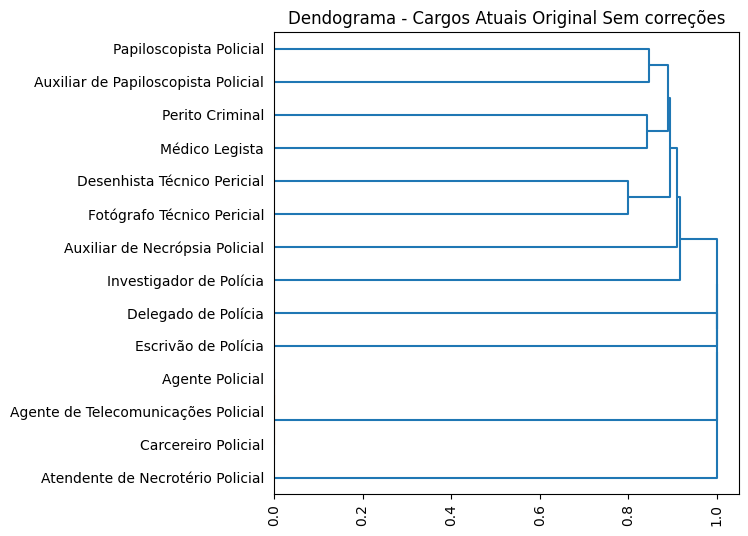

In [ ]:
titulo = 'Dendograma - Cargos Atuais Original Sem correções'

dendograma(dict_pdict,cargos_atrib_atual_nocor, titulo)

Após gerar o dendograma, é possível verificar os seguintes resultados:
1. Há um clado mais basal, formado pelo Atendente de Necrotério Policial, um subgrupo de apoio à investigação (Carcereiro Policial, Agente de Telecomunicações Policial e Agente Policial), Escrivão de Polícia e Delegado de Polícia.
2. O mais próximo desses basais é o Investigador de Polícia, já derivando em um próximo clado.
3. A próxima derivação vem com o Auxiliar de Necrópsia Policial.
4. Segue-se a derivação do Fotógrafo Técnico Pericial e do Desenhista Técnico Pericial, no grupo de apoio a perícia criminalística.
5. Continuando, gerando no penúltimo clado, temos o grupo das Perícias SPTC, com o Médico Legista e o Perito Criminal.
6. O último clado demonstra o Auxiliar de Papiloscopista Policial e Papiloscopista Policial, com apoio e perícia papiloscópica.

No geral, as posições estão consistentes, com exceção do Atendente de Necrotério, que deveria estar mais derivado em relação ao Investigador de Polícia.

Calculando o índice cofenético.

In [ ]:
def cofenetico(dict_pdict, dict_pdist, titulo):
  global cophenetic_table, cophenetic_index
  cophenetic_table = cophenet(
    Z = dict_pdict,
    Y = distance_matrix)

  cophenetic_index = cophenetic_table[0]

  print(titulo)
  print(f"Valor:", cophenetic_index)
  if (cophenetic_index < -0.9):
    print("Correlação negativa forte")
  elif (cophenetic_index < -0.5):
    print("Correlação negativa fraca")
  elif (cophenetic_index < 0.5):
    print("Sem correlação aparente")
  elif (cophenetic_index < 0.75):
    print("Correlação positiva moderada")
  else:
    print("Forte correlação positiva")

In [ ]:
titulo = "Índice Cofenético - Atual Original sem correção"

cofenetico(dict_pdict, dict_pdist, titulo)

Índice Cofenético - Atual Original sem correção
Valor: 0.9822883844345097
Forte correlação positiva


Forte correlação entre os dados gerados na tabela de distância e na tabela de para o dendograma, ainda que desorganizada e sem correções.

####4.1.2 Condensada

Início calculando as tabelas de distanciamente e dicionário para os dendogramas.

In [ ]:
processamento_dados(cargos_atrib_atual_nocor_condensed)

gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos  \
0                                                   1                                                                        
1                                                   0                                                                        
2                                                   0                                                                        
3                                                   0                                                                        
4                                                   0                                                                        
5                                                   0                                                                        
6                                                   0                                                                        
7                                                   0                                                                        
8                                                   0                                                                        
9                                                   0                                                                        
10                                                  0                                                                        
11                                                  0                                                                        
12                                                  0                                                                        
13                                                  0                                                                        

    secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação  \
0                                                   0                                                                                                                 
1                                                   1                                                                                                                 
2                                                   0                                                                                                                 
3                                                   0                                                                                                                 
4                                                   0                                                                                                                 
5                                                   0                                                                                                                 
6                                                   0                                                                                                                 
7                                                   0                                                                                                                 
8                                                   0                                                                                                                 
9                                                   0                                                                                                                 
10                                                  0                                                                                                                 
11                                                  0                                                        

In [ ]:
#Chamando as funções para definir as variáveis
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_atual_nocor_condensed)

Gerando pdict.

In [ ]:
gerando_dict_pdict(dict_pdist)

array([[ 7.        ,  8.        ,  0.        ,  2.        ],
       [14.        ,  9.        ,  0.        ,  3.        ],
       [ 6.        ,  5.        ,  0.5       ,  2.        ],
       [ 4.        ,  3.        ,  0.57142857,  2.        ],
       [11.        , 10.        ,  0.66666667,  2.        ],
       [17.        , 16.        ,  0.71428571,  4.        ],
       [18.        , 19.        ,  0.77777778,  6.        ],
       [20.        , 12.        ,  0.8       ,  7.        ],
       [ 2.        , 21.        ,  0.83333333,  8.        ],
       [ 1.        ,  0.        ,  1.        ,  2.        ],
       [22.        , 23.        ,  1.        , 10.        ],
       [24.        , 15.        ,  1.        , 13.        ],
       [13.        , 25.        ,  1.        , 14.        ]])

Gerando novo dendograma.

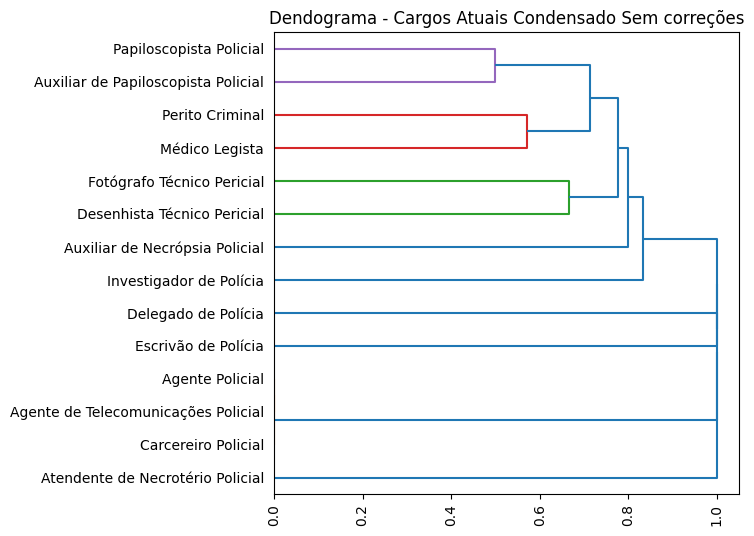

In [ ]:
titulo = 'Dendograma - Cargos Atuais Condensado Sem correções'

dendograma(dict_pdict,cargos_atrib_atual_nocor_condensed, titulo)

Após gerar o dendograma dos atributos condensados, é possível verificar os seguintes resultados:
1. O clado mais basal, de cor azul, é formado pelo Atendente de Necrotério Policial, um subgrupo de apoio à investigação (Carcereiro Policial, Agente de Telecomunicações Policial e Agente Policial), Escrivão de Polícia e Delegado de Polícia continua existindo.
2. O mais próximo desses basais é o Investigador de Polícia, já derivando em um próximo clado, como observado.
3. A próxima derivação vem com o Auxiliar de Necrópsia Policial, como observado.
4. A partir deste ponto há distinções em valores, criando clados em outras cores. Contudo, a disposição dos cargos permenece a mesma. Um primeiro subgrupo em ver é do Desenhista Técnico Pericial e do Fotógrafo Técnico Pericial, ambos do apoio da perícia criminalística.
5. Segue-se um subgrupo no último clado de peritos SPTC, com o Médico Legista e Perito Criminal.
6. No último subgrupo estão Auxiliar de Papiloscopia Policial e Papiloscopista Policial, num grupo de Papiloscopia.

No geral, as posições estão consistentes, com exceção do Atendente de Necrotério, que deveria estar mais derivado em relação ao Investigador de Polícia. Os valores são mais expressivos, criando os subgrupos coloridos no dendograma.

Com isso, pode-se calcular o índice cofenético.

In [ ]:
titulo = "Índice Cofenético - Atual Condensado sem correção"

cofenetico(dict_pdict, dict_pdist, titulo)

Índice Cofenético - Atual Condensado sem correção
Valor: 0.9298452869427988
Forte correlação positiva


Forte correlação entre os dados gerados na tabela de distância e na tabela de para o dendograma, apesar de cair um pouco o valor em relação a original.

##4.2 Atual com correção

####4.2.1 Original

Início calculando as tabelas de distanciamente e dicionário para os dendogramas.

In [ ]:
processamento_dados(cargos_atrib_atual_withcor)

gestão de polícia judiciária  presidir investigação criminal  \
0                              1                               1   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
5                              0                               0   
6                              0                               0   
7                              0                               0   
8                              0                               0   
9                              0                               0   
10                             0                               0   

    presidir atos de polícia judiciária  mediar conflitos  \
0                                     1                 1   
1                                     0                 0   
2                                     0                 0   
3                                     0                 0   
4                                     0                 0   
5                                     0                 0   
6                                     0                 0   
7                                     0                 0   
8                                     0                 0   
9                                     0                 0   
10                                    0                 0   

    secretariar atos de polícia judiciária / inquérito policial  \
0                                                   0             
1                                                   1             
2                                                   0             
3                                                   0             
4                                                   0             
5                                                   0             
6                                                   0             
7                                                   0             
8                                                   0             
9                                                   0             
10                                                  0             

    responsabilizar-se por apreensões  cumprir medidas de segurança orgânica  \
0                                   0                                      0   
1                                   1                                      1   
2                                   0                                      0   
3                                   0                                      0   
4                                   0                                      0   
5                                   0                                      0   
6                                   0                                      0   
7                                   0                                      0   
8                                   0                                      0   
9                                   0                                      0   
10                                  0                                      0   

    atuar na investigação  diligência e prevenção especializada de crimes  \
0                       0                                               0   
1                       1                                               0   
2                       1                                               1   
3                       0                                               0   
4                       0                                               0   
5                       0                                               0   
6                       0                                               0   
7                       0                                               

In [ ]:
#Chamando as funções para definir as variáveis
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_atual_withcor)

Gerando pdict.

In [ ]:
gerando_dict_pdict(dict_pdist)

array([[ 6.        ,  5.        ,  0.45454545,  2.        ],
       [ 9.        ,  4.        ,  0.63157895,  2.        ],
       [11.        ,  3.        ,  0.6969697 ,  3.        ],
       [12.        , 10.        ,  0.71428571,  3.        ],
       [ 8.        ,  7.        ,  0.72727273,  2.        ],
       [13.        , 14.        ,  0.75      ,  6.        ],
       [15.        , 16.        ,  0.77272727,  8.        ],
       [ 1.        ,  2.        ,  0.90909091,  2.        ],
       [18.        , 17.        ,  0.93333333, 10.        ],
       [ 0.        , 19.        ,  1.        , 11.        ]])

Gerando novo dendograma.

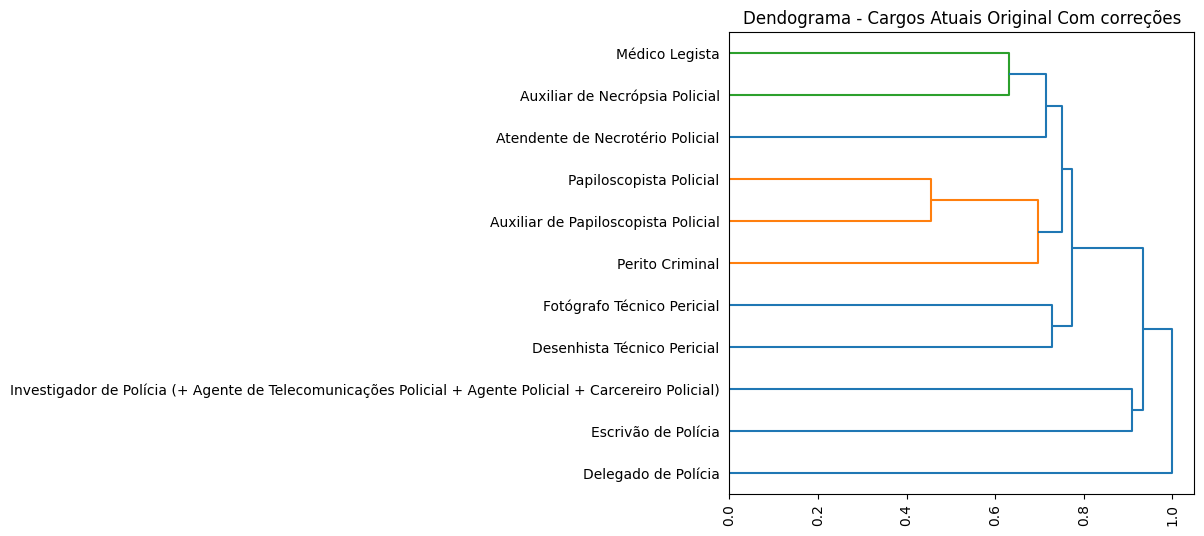

In [ ]:
titulo = 'Dendograma - Cargos Atuais Original Com correções'

dendograma(dict_pdict,cargos_atrib_atual_withcor, titulo)

Observando o dendograma gerado, pode-se inderir que:
1. O Delegado de Polícia segue na base.
2. O primeiro subgrupo derivado é o de investigação, com o Escrivão de Polícia e o Investigador (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial).
3. Segue-se um subgrupo derivado de apoio a perícia criminalística, com Desenhista Técnico Pericial e Fotógrafo Técnico Pericial.
4. Segue depois o Perito Criminal.
5. Neste clado do Perito Criminal, há um segundo clado em laranja, o mais especializado de todos, de papiloscopia, com o Auxiliar de Papiloscopista Policial e o Papiloscopista Policial.
6. O último grande clado representa os cargos de medicina legal, com o Atendente de Necrotério Policial, Auxiliar de Necrópsia Policial e por último o Médico Legista.

A organização demonstrou que o delegado e os cargos de investigação são mais basais, seguidos dos cargos intercalados sempre entre apoio as perícias e seus respectivos perito, na ordem de Criminalística, Papiloscopia e Medicina Legal. Aparentemente, uma boa organização, ainda que não tenha feito o apoio a perícia em um subgrupo e as perícias em si em outro. Deve-se verificar o índice cofenético.

In [ ]:
titulo = "Índice Cofenético - Atual com correção"

cofenetico(dict_pdict, dict_pdist, titulo)

Índice Cofenético - Atual com correção
Valor: 0.8973418484762694
Forte correlação positiva


Apesar de diminuir um pouco, ainda apresenta uma sólida correlação dos dados.

####4.2.2 Condensada

Início com os calculos das distâncias e dicionários.

In [ ]:
processamento_dados(cargos_atrib_atual_withcor_condensed)

gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos  \
0                                                   1                                                                        
1                                                   0                                                                        
2                                                   0                                                                        
3                                                   0                                                                        
4                                                   0                                                                        
5                                                   0                                                                        
6                                                   0                                                                        
7                                                   0                                                                        
8                                                   0                                                                        
9                                                   0                                                                        
10                                                  0                                                                        

    secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica  \
0                                                   0                                                                                         
1                                                   1                                                                                         
2                                                   0                                                                                         
3                                                   0                                                                                         
4                                                   0                                                                                         
5                                                   0                                                                                         
6                                                   0                                                                                         
7                                                   0                                                                                         
8                                                   0                                                                                         
9                                                   0                                                                                         
10                                                  0                                                                                         

    atuar na investigação  \
0                       0   
1                       1   
2                       1   
3                       0   
4                       0   
5                       0   
6                       0   
7                       0   
8                       0   
9                       0   
10                      0   

    diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões / intervir em ocorrência policiais / transporte de pessoas / coisas de ocorrência policial / manusear armas de fogo e menos letais  \
0                                                   0                                                                                                                                                     

In [ ]:
#Chamando as funções para definir as variáveis
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_atual_withcor_condensed)

Gerando o pdict.

In [ ]:
gerando_dict_pdict(dict_pdist)

array([[ 6.        ,  5.        ,  0.44444444,  2.        ],
       [ 4.        ,  9.        ,  0.5       ,  2.        ],
       [ 3.        , 11.        ,  0.6       ,  3.        ],
       [13.        , 12.        ,  0.69230769,  5.        ],
       [ 7.        ,  8.        ,  0.71428571,  2.        ],
       [ 2.        ,  1.        ,  0.75      ,  2.        ],
       [15.        , 14.        ,  0.75      ,  7.        ],
       [10.        , 17.        ,  0.77777778,  8.        ],
       [18.        , 16.        ,  0.875     , 10.        ],
       [ 0.        , 19.        ,  1.        , 11.        ]])

Dendograma da tabela original com correções.

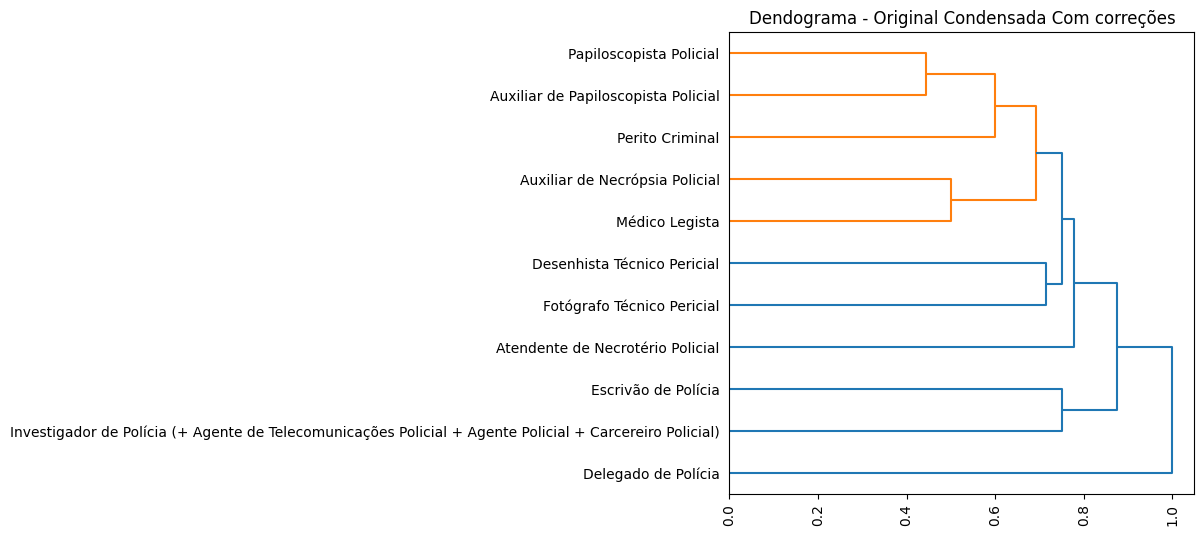

In [ ]:
titulo = 'Dendograma - Original Condensada Com correções'

dendograma(dict_pdict,cargos_atrib_atual_withcor_condensed, titulo)

Após gerar o dendograma dos atributos condensados, é possível verificar os seguintes resultados:
1. Inicia-se o dendogramca com o Delegado de Polícia sendo o mais basal dos cargos, em azul.
2. O primeiro subgrupo formado é o de investigação, com o Investigador de Polícia (+ Agente de Telecomunicações + Agente Policial + Carcereiro Policial) e Escrivão de Polícia.
3. A próxima derivação é do Atendente de Necrotério Policial.
4. Mais uma derivação com um subgrupo do Fotógrafo Técnico Policial e Desenhista Técnico Pericial, apoio a perícia criminalística.
5. Os próximos subgrupos são derivados suficientes para assumirem a cor laranja. Inicia-se bem especializado o Médico Legista e o Auxiliar de Necrópsia Policial.
6. A próxima derivação é do Perito Criminal.
7. Por fim, mais derivado, fica o Auxiliar de Papiloscopista Policial e o Papiloscopista Polical, num grupo de papiloscopia.

No geral, as posições estão consistentes, com com alguma confusão nos cargos e apoio à perícia e perícia em si. Os valores são mais expressivos, criando os subgrupos coloridos no dendograma.

Com isso, pode-se calcular o índice cofenético.

In [ ]:
titulo = "Índice Cofenético - Atual Condensado com correção"

cofenetico(dict_pdict, dict_pdist, titulo)

Índice Cofenético - Atual Condensado com correção
Valor: 0.8904277663393936
Forte correlação positiva


O valor ficou próximo do calculado sem redução, mas continua forte.

##4.3 LONPC sem correção

####4.3.1 Original

Início com os calculos das distâncias e dicionários.

In [ ]:
processamento_dados(cargos_atrib_LONPC_nocor)

gestão de polícia judiciária  presidir investigação criminal  \
0                             1                               1   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
5                             0                               0   
6                             0                               0   
7                             0                               0   

   presidir atos de polícia judiciária  mediar conflitos  \
0                                    1                 1   
1                                    0                 0   
2                                    0                 0   
3                                    0                 0   
4                                    0                 0   
5                                    0                 0   
6                                    0                 0   
7                                    0                 0   

   secretariar atos de polícia judiciária / inquérito policial  \
0                                                  0             
1                                                  1             
2                                                  0             
3                                                  0             
4                                                  0             
5                                                  0             
6                                                  0             
7                                                  0             

   responsabilizar-se por apreensões  cumprir medidas de segurança orgânica  \
0                                  0                                      0   
1                                  1                                      1   
2                                  0                                      0   
3                                  0                                      0   
4                                  0                                      0   
5                                  0                                      0   
6                                  0                                      0   
7                                  0                                      0   

   atuar na investigação  diligência e prevenção especializada de crimes  \
0                      0                                               0   
1                      1                                               1   
2                      0                                               0   
3                      0                                               0   
4                      0                                               0   
5                      0                                               0   
6                      0                                               0   
7                      0                                               0   

   cumprir mandados  ...  identificação do cadáver latu sensu  \
0                 0  ...                                    0   
1                 1  ...                                    0   
2                 0  ...                                    0   
3                 0  ...                                    0   
4                 0  ...                                    0   
5                 0  ...                                    0   
6                 0  ...                                    0   
7                 0  ...                                    1   

   manuseio do cadáver em laboratório  manipulação de cadáver latu sensu  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0               

In [ ]:
#Chamando as funções para definir as variáveis
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_LONPC_nocor)

Gerando o pdict.

In [ ]:
gerando_dict_pdict(dict_pdist)

array([[ 2.        ,  3.        ,  0.84210526,  2.        ],
       [ 4.        ,  5.        ,  0.84615385,  2.        ],
       [ 9.        ,  8.        ,  0.88888889,  4.        ],
       [10.        ,  6.        ,  0.92857143,  5.        ],
       [ 7.        , 11.        ,  0.94117647,  6.        ],
       [ 1.        ,  0.        ,  1.        ,  2.        ],
       [12.        , 13.        ,  1.        ,  8.        ]])

Dendograma da LONPC sem correções.

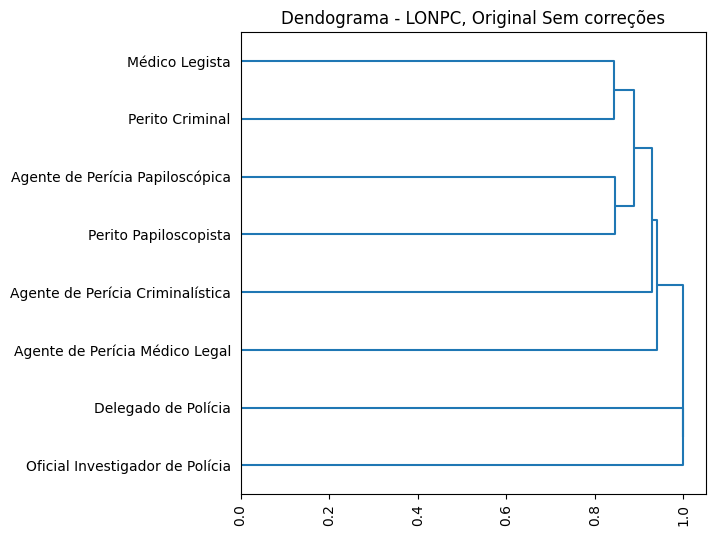

In [ ]:
titulo = 'Dendograma - LONPC, Original Sem correções'

dendograma(dict_pdict,cargos_atrib_LONPC_nocor, titulo)

Observando o dendograma gerado, pode-se suscitar:
1. O Oficial Investigador de Polícia se tornou o mais basal dos cargos, em um mesmo npivel que o Delegado de Polícia.
2. O terceiro cargo mais derivado ficou com o Agente de Perícia Médico Legal.
3. Segue-se o Agente de Perícia Criminalística.
4. O penúltimo clado fica com o Perito Papiloscopista e o Agente de Perícia Papiloscópica.
5. Por fim, o Perito Criminal e o Médico Legista ocupam o último clado.

Claramente houve desorganização nos cargos, deslocando os cargos de delegado, investigação, apoio a perícia e perícia. A mera adequação dos cargos sem correções enseja nesses erros. Necessário verificar o índice cofenético.

In [ ]:
titulo = "Índice Cofenético - LONPC sem correção"

cofenetico(dict_pdict, dict_pdist, titulo)

Índice Cofenético - LONPC sem correção
Valor: 0.7512989370013785
Forte correlação positiva


Apesar de ser um bom índice, 0,75 é um número baixo em relação aos 0,9 dos outros dois, indicando pobreza na organização dos dados.

####4.3.2 Condensada

Início com os calculos das distâncias e dicionários.

In [ ]:
processamento_dados(cargos_atrib_LONPC_nocor_condensed)

gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos  \
0                                                  1                                                                        
1                                                  0                                                                        
2                                                  0                                                                        
3                                                  0                                                                        
4                                                  0                                                                        
5                                                  0                                                                        
6                                                  0                                                                        
7                                                  0                                                                        

   secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação / diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões / segurança de locais de polícia judiciária / intervir em ocorrência policiais / transporte de pessoas / coisas de ocorrência policial / manusear armas de fogo e menos letais  \
0                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
1                                                  1                                                                                                                                                                                                                                                                                                                                                                                       
2                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
3                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
4                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
5                                                  0                                                                                                                                                                                                                                                                 

In [ ]:
#Chamando as funções para definir as variáveis
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_LONPC_nocor_condensed)

Gerando o pdict.

In [ ]:
gerando_dict_pdict(dict_pdist)

array([[ 3.        ,  2.        ,  0.5       ,  2.        ],
       [ 4.        ,  5.        ,  0.66666667,  2.        ],
       [ 6.        ,  8.        ,  0.8       ,  3.        ],
       [10.        ,  7.        ,  0.8       ,  4.        ],
       [ 9.        , 11.        ,  0.83333333,  6.        ],
       [ 1.        ,  0.        ,  1.        ,  2.        ],
       [12.        , 13.        ,  1.        ,  8.        ]])

Dendograma da LONPC condensada sem correções.

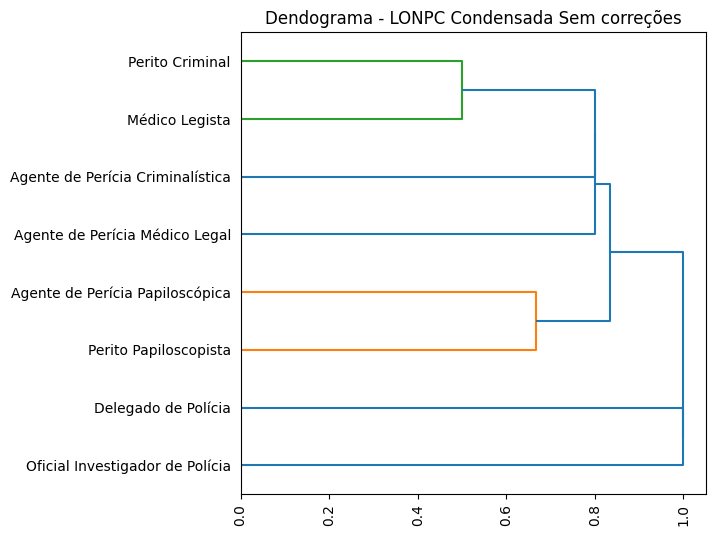

In [ ]:
titulo = 'Dendograma - LONPC Condensada Sem correções'

dendograma(dict_pdict,cargos_atrib_LONPC_nocor_condensed, titulo)

Observando o dendograma gerado das atribuições condensadas, pode-se suscitar:
1. O Oficial Investigador de Polícia se tornou o mais basal dos cargos, em um mesmo npivel que o Delegado de Polícia, como observado.
2. Há um subgrupo em laranja de papiloscopia, com o Perito Papiloscopista e o Agente de Perícia Papiloscópia.
3. Segue derivado em memso nível o Agente de Perícia Médico Legal e o Agwente de Perícia Criminalística.
4.Por fim, em verde, grupo com as perícias SPTC, com o Médico Legista e o Perito Criminal.

A posição do Perito Papiloscopista aparentemente está fora do lugar, mais basal ao invés do mais derivada com os peritos da SPTC. Necessário verificar o índice cofenético.

In [ ]:
titulo = "Índice Cofenético - LONPC Condensado sem correção"

cofenetico(dict_pdict, dict_pdist, titulo)

Índice Cofenético - LONPC Condensado sem correção
Valor: 0.821347126173939
Forte correlação positiva


Índice melhorou um pouco em relação ao original não condensado, e é um valor relativamente forte.

##4.4 LONPC com correção

####4.4.1 Original

Primeiro, distâncias e dicionários.

In [ ]:
processamento_dados(cargos_atrib_LONPC_withcor)

gestão de polícia judiciária  presidir investigação criminal  \
0                             1                               1   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
5                             0                               0   
6                             0                               0   
7                             0                               0   

   presidir atos de polícia judiciária  mediar conflitos  \
0                                    1                 1   
1                                    0                 0   
2                                    0                 0   
3                                    0                 0   
4                                    0                 0   
5                                    0                 0   
6                                    0                 0   
7                                    0                 0   

   secretariar atos de polícia judiciária / inquérito policial  \
0                                                  0             
1                                                  1             
2                                                  0             
3                                                  0             
4                                                  0             
5                                                  0             
6                                                  0             
7                                                  0             

   responsabilizar-se por apreensões  cumprir medidas de segurança orgânica  \
0                                  0                                      0   
1                                  1                                      1   
2                                  0                                      0   
3                                  0                                      0   
4                                  0                                      0   
5                                  0                                      0   
6                                  0                                      0   
7                                  0                                      0   

   atuar na investigação  diligência e prevenção especializada de crimes  \
0                      0                                               0   
1                      1                                               1   
2                      0                                               0   
3                      0                                               0   
4                      0                                               0   
5                      0                                               0   
6                      0                                               0   
7                      0                                               0   

   cumprir mandados  ...  identificação do cadáver latu sensu  \
0                 0  ...                                    0   
1                 1  ...                                    0   
2                 0  ...                                    0   
3                 0  ...                                    1   
4                 0  ...                                    0   
5                 0  ...                                    0   
6                 0  ...                                    0   
7                 0  ...                                    1   

   manuseio do cadáver em laboratório  manipulação de cadáver latu sensu  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0               

In [ ]:
#Chamando as funções para definir as variáveis
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_LONPC_withcor)

Gerando o pdict.

In [ ]:
gerando_dict_pdict(dict_pdist)

array([[ 5.        ,  4.        ,  0.42857143,  2.        ],
       [ 3.        ,  7.        ,  0.47619048,  2.        ],
       [ 8.        ,  2.        ,  0.6875    ,  3.        ],
       [10.        ,  9.        ,  0.75      ,  5.        ],
       [ 6.        , 11.        ,  0.75      ,  6.        ],
       [ 1.        ,  0.        ,  1.        ,  2.        ],
       [12.        , 13.        ,  1.        ,  8.        ]])

Gerando o Dendograma.

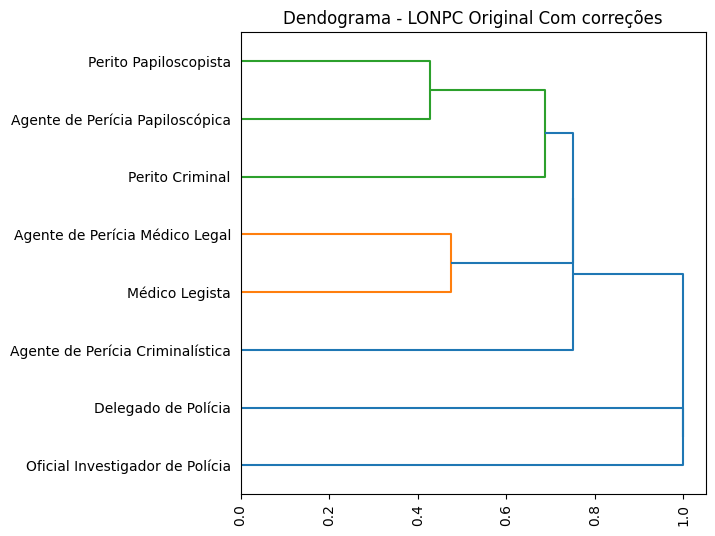

In [ ]:
titulo = 'Dendograma - LONPC Original Com correções'

dendograma(dict_pdict,cargos_atrib_LONPC_withcor, titulo)

Ao observar o dendograma gerado, observa-se:
1. O Oficial Investigador de Polícia é o cargo mais basal.
2. Segue-se o Delegado de Polícia.
3. Há grande variação de altura, com um primeiro clado especialista em laranja, com o Médico Legal e o Agente de Perícia Médico Legal, o clado da Medicina Legal.
4. O Agente de Perícia Criminalística segue mais derivado, seguido do Perito Criminal, o que indica um pseudoclado de Perícia Criminalística.
5. Por fim, o clado mais especializado em verde é o de Papiloscopia, com o Perito Papiloscopista e o Agente de Perícia Papiloscópica.

Aparentemente, excetuando a posição entre o Delegado de Polícia e do Oficial Investigador, há boa ordenação nos cargos, o que deve se refletir no índice cofenético.

In [ ]:
titulo = "Índice Cofenético - LONPC com correção"

cofenetico(dict_pdict, dict_pdist, titulo)

Índice Cofenético - LONPC com correção
Valor: 0.9089999593839759
Forte correlação positiva


Forte correlação, acima de 0,91, indicando boa adequação dos dados.

####4.4.2 Condensada

Início com os calculos das distâncias e dicionários.

In [ ]:
processamento_dados(cargos_atrib_LONPC_withcor_condensed)

gestão de polícia judiciária / presidir investigação criminal / presidir atos de polícia judiciária / mediar conflitos  \
0                                                  1                                                                        
1                                                  0                                                                        
2                                                  0                                                                        
3                                                  0                                                                        
4                                                  0                                                                        
5                                                  0                                                                        
6                                                  0                                                                        
7                                                  0                                                                        

   secretariar atos de polícia judiciária / inquérito policial / responsabilizar-se por apreensões / cumprir medidas de segurança orgânica / atuar na investigação / diligência e prevenção especializada de crimes / cumprir mandados / realizar prisões / segurança de locais de polícia judiciária / intervir em ocorrência policiais / transporte de pessoas / coisas de ocorrência policial / manusear armas de fogo e menos letais  \
0                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
1                                                  1                                                                                                                                                                                                                                                                                                                                                                                       
2                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
3                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
4                                                  0                                                                                                                                                                                                                                                                                                                                                                                       
5                                                  0                                                                                                                                                                                                                                                                 

In [ ]:
#Chamando as funções para definir as variáveis
dict_pdist, dict_pdist_squared, tabelaDistCargos, tabelaCorrelation = tabelas_distancia(cargos_atrib_LONPC_withcor_condensed)

Gerando o pdict.

In [ ]:
gerando_dict_pdict(dict_pdist)

array([[ 5.        ,  4.        ,  0.42857143,  2.        ],
       [ 2.        ,  3.        ,  0.55555556,  2.        ],
       [ 9.        ,  7.        ,  0.57142857,  3.        ],
       [ 8.        , 10.        ,  0.6       ,  5.        ],
       [ 6.        , 11.        ,  0.77777778,  6.        ],
       [ 1.        ,  0.        ,  1.        ,  2.        ],
       [12.        , 13.        ,  1.        ,  8.        ]])

Dendograma da LONPC condensada com correções.

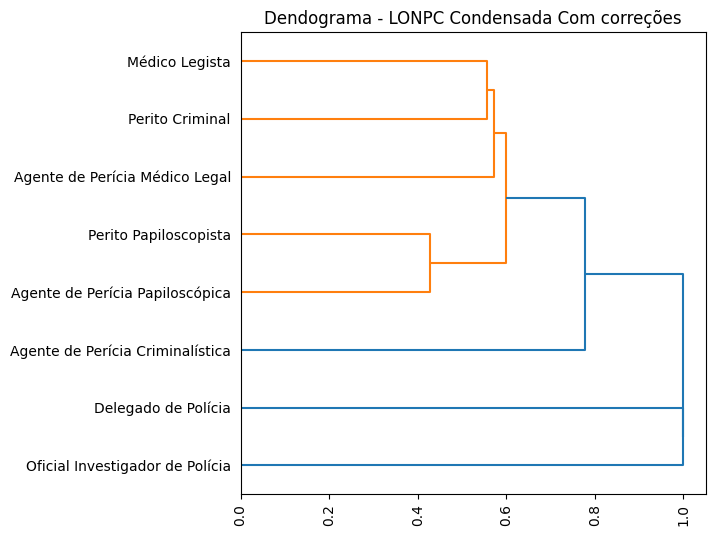

In [ ]:
titulo = 'Dendograma - LONPC Condensada Com correções'

dendograma(dict_pdict,cargos_atrib_LONPC_withcor_condensed, titulo)

AO observar o dendograma gerado pelas atribuições condensadas, observa-se:
1. O Oficial Investigador de Polícia é o cargo mais basal, conjuntamento com o Delegado de Polícia, nos clado em azul.
2. O Agente de Perícia Crimin é o primeiro a derivar.
3. Os próximos subgrupos assume valores mais expressivos, adotando a cor laranja para diferenciação. O Agente de Perícia Papiloscópica e o Perito Papiloscopista estão no próximo, com papiloscopia.
4. Há uma derivação com o Agente de Perícia Técnico Pericial.
5. O último grupo é das perícias SPTC, com o Perito Criminal e o Médico Legista.

As reduções melhoraram de alguma força dos cargos, mas ainda apresenta deorganizações. Deve-se calcular o índice cofenético para verificar se os dados coadunam.

In [ ]:
titulo = "Índice Cofenético - LONPC com correção"

cofenetico(dict_pdict, dict_pdist, titulo)

Índice Cofenético - LONPC com correção
Valor: 0.9040588101113842
Forte correlação positiva


Melhorou um pouco em relação a não condensada, mas com valor ainda forte.

##4.5 - Comentários Gerais
Nas árvores hierárquicas, também chamadas de dendogramas, a situação atual, com e sem correções, aponta o Papiloscopista e Perito Criminais mais derivados, especializados e próximo, ao passo que o Investigador de Polícia está mais basal, próximos a cargos do cartório e apoio à investigação. Ao aglutinar atribuições, essa tendência aumenta.

Quando as árvores da LONPC sem correções são geradas, a original sem aglutinações de atribuições, as árvores com Papiloscopista e Peritos Criminais estão próximos devido o peso da quantidade de atribuições. Ao condensar atribuições, Papiloscopista Policias ainda continuam derivados, nas perícias, mas um pouco menos próximos, com uma leve diminuição da sua derivação, o que indicaria que um adequação simplista das atribuições sem correções poderia suscitar uma proximidade com o cargo de investigação.

Ao adequar a LONPC com correções, o Papiloscopista Policial está no grupo mais derivado com o Perito Criminal. Ao condensar as atribuições, o grupo pericial ainda se mantem coeso, indicando que correções ao adequar a LONPC são necessárias.

#5 - Diagrama de Grafos
Uma outra opção de visualização dos cargos seria através do Diagrama de Grafos. Este tipo de visualização permite ver a conexão entre carreiras e sua disposição, de forma a ver suas relações de forma espacial e força o tamanho de arestas.

##5.1 Atual sem correção
Primeiro, deve-se construir a matrix de adjacência. Caso haja conexão entre os cargos, o valor na linha x coluna recebe 1. Caso contrário, fica 0. A força dessa conexão é o número de atribuições compartilhadas.
Abaixo a construção da Matrix de Adjacência e dos Vetores de Arestas com pesos. A matrix condensada não pode ser utilizada nessa análise, somente a expandida original.

In [ ]:
#Função dos vetores da Matrix de Adjacência

def matrix_adjacencia(df, titulo):
  #Criando a Arestas do Diagrama de Grafos
  df_copia = df

  #Retirando cargos comuns a todos do DF.
  cols_all_ones = df_copia.loc[:, (df_copia == 1).all()].columns.tolist()
  df_copia = df_copia.drop(cols_all_ones, axis=1)

  #Criação da Matrix com todos os valores 0
  global matrix_adj
  matrix_adj = np.zeros((len(df_copia), len(df_copia)))
  #vetor com as arestas e pesos
  global arestas
  arestas = []

  #Iterando de forma progressiva todos os cargos
  for i in range(0, len(df_copia)):
    j = i + 1
    for j in range(j, len(df_copia)):
      vetor_carreira = []
      shared_cols = 0
      peso_atrib = 0
      numeric_df = df_copia.apply(pd.to_numeric, errors='coerce')
      shared_cols =df_copia.columns[(df_copia.iloc[i] == 1) & (df_copia.iloc[j] == 1)]
      peso_atrib = len(shared_cols)
      if peso_atrib > 0: #Caso compartilhem atribuições
        #Cargo 1 aponta para cargos 2 e tem como peso a quantidade de atribuições compartilhadas
        #Não representadas não possuem compartilhamento
        matrix_adj[i][j] = 1 #aresta
        matrix_adj[j][i] = 1 #reciproco
        vetor_carreira = [i, j, peso_atrib]
        arestas.append(vetor_carreira)

  print('Matrix de Adjacência / Vetores de Arestas e Pesos')
  print(titulo)
  print("Cargo 1 - Cargo 2 - Peso (as direções são recíprocas)")
  return matrix_adj, arestas

In [ ]:
titulo = 'Cargos Atuais sem correções'

matrix_adjacencia(cargos_atrib_atual_nocor, titulo)

Matrix de Adjacência / Vetores de Arestas e Pesos
Cargos Atuais sem correções
Cargo 1 - Cargo 2 - Peso (as direções são recíprocas)


(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 [[2, 11, 1],
  [3, 4, 3],
  [3, 5, 2],
  [3, 6, 2],
  [3, 10, 1],
  [3, 1

Plotando o Diagrama de Grafos. As cores foram setadas em azul claro para grupos dos Delegados, vermelho para Investigação, violeta para Perícia, verde claro para apoio à perícia e laranja para apoio à Investigação (quando disponível). Essas cores não afetam os cálculos, somente a estética do diagrama.

In [ ]:
#Plotando Diagrama de Grafos
def diagrama_grafo(cargos_delegado, cargos_investigacao,
                   cargos_pericia, cargos_apoio_investigacao,
                   cargos_apoio_pericia, df, titulo, tamanho_fonte):
  fig = plt.figure(figsize=(12,12))

  #Matrix de Adjacência
  G = nx.from_numpy_array(matrix_adj)
  legenda_inicial = mpatches.Patch(color='white', label='LEGENDA:')
  handles = [legenda_inicial]

  #Color Mapping e Legenda Cargos - ARRUMAR AQUI
  color_map = []
  cor_cargos_delegado = cargos_delegado
  cor_cargos_investigacao = cargos_investigacao
  cor_cargos_pericia = cargos_pericia
  cor_cargos_apoio_investigacao = cargos_apoio_investigacao
  cor_cargos_apoio_pericia = cargos_apoio_pericia
  lista_pesos = []

  for i, cargo in enumerate(df["Carreira"]):
    descricao_legenda = str(i)+": "+cargo
    if (cargo in cor_cargos_delegado):
      nome_variavel_legenda = "cargo_"+str(cargo)+"_"+"azul"
      cor = "lightblue"
    elif (cargo in cor_cargos_investigacao):
      nome_variavel_legenda = "cargo_"+str(cargo)+"_"+"vermelho"
      cor = "tomato"
    elif (cargo in cor_cargos_pericia):
      nome_variavel_legenda = "cargo_"+str(cargo)+"_"+"roxo"
      cor = "violet"
    elif (cargo in cor_cargos_apoio_investigacao):
      nome_variavel_legenda = "cargo_"+str(cargo)+"_"+"laranja"
      cor = "orange"
    elif cargo in (cor_cargos_apoio_pericia):
      nome_variavel_legenda = "cargo_"+str(cargo)+"_"+"verde"
      cor = "lightgreen"
    else:
      nome_variavel_legenda = "erro_legenda"
      cor = "gray"
    #Criando os patches e adicionando a legenda ao handles
    patch = mpatches.Patch(color=cor, label=descricao_legenda)
    handles.append(patch)
    color_map.append(cor)

  #Arestas e pesos
  peso_max = 0
  labels_arestas = []
  for i in range(len(arestas)):
    inicio_aresta = arestas[i][0]
    fim_aresta = arestas[i][1]
    peso = arestas[i][2]
    if peso > peso_max:
      peso_max = peso
    G.add_edge(inicio_aresta, fim_aresta, weight=peso)
    #legendas das arestas
    nome_variavel_legenda = "aresta_"+str(arestas[i][0])+"_"+str(arestas[i][1])
    descricao_legenda = str(arestas[i][0])+" "+df["Carreira"].iloc[arestas[i][0]]+' <-> '+str(arestas[i][1])+" "+df["Carreira"].iloc[arestas[i][1]]+' - Peso: ' + str(peso)
    patch = mpatches.Patch(color='black', label=descricao_legenda)
    handles.append(patch)
  edge_weights = nx.get_edge_attributes(G, 'weight')
  width_scale = peso_max
  min_width = 1
  widths = [(edge_weights[edge] - min(edge_weights.values())) /
            (max(edge_weights.values()) - min(edge_weights.values())) *
            width_scale + min_width for edge in G.edges()]

  aresta_outro = mpatches.Patch(color='white', label='outros cargos: Peso 0 <-> Sem conexão')
  handles.append(aresta_outro)

  font_prop = fm.FontProperties(size=tamanho_fonte) # Use fm instead of plt.font_manager

  plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=font_prop)

  nx.draw_circular(G, node_color=color_map, with_labels=True, width=widths)
  nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G), label_pos=0.35)

  plt.title(titulo)
  plt.show()

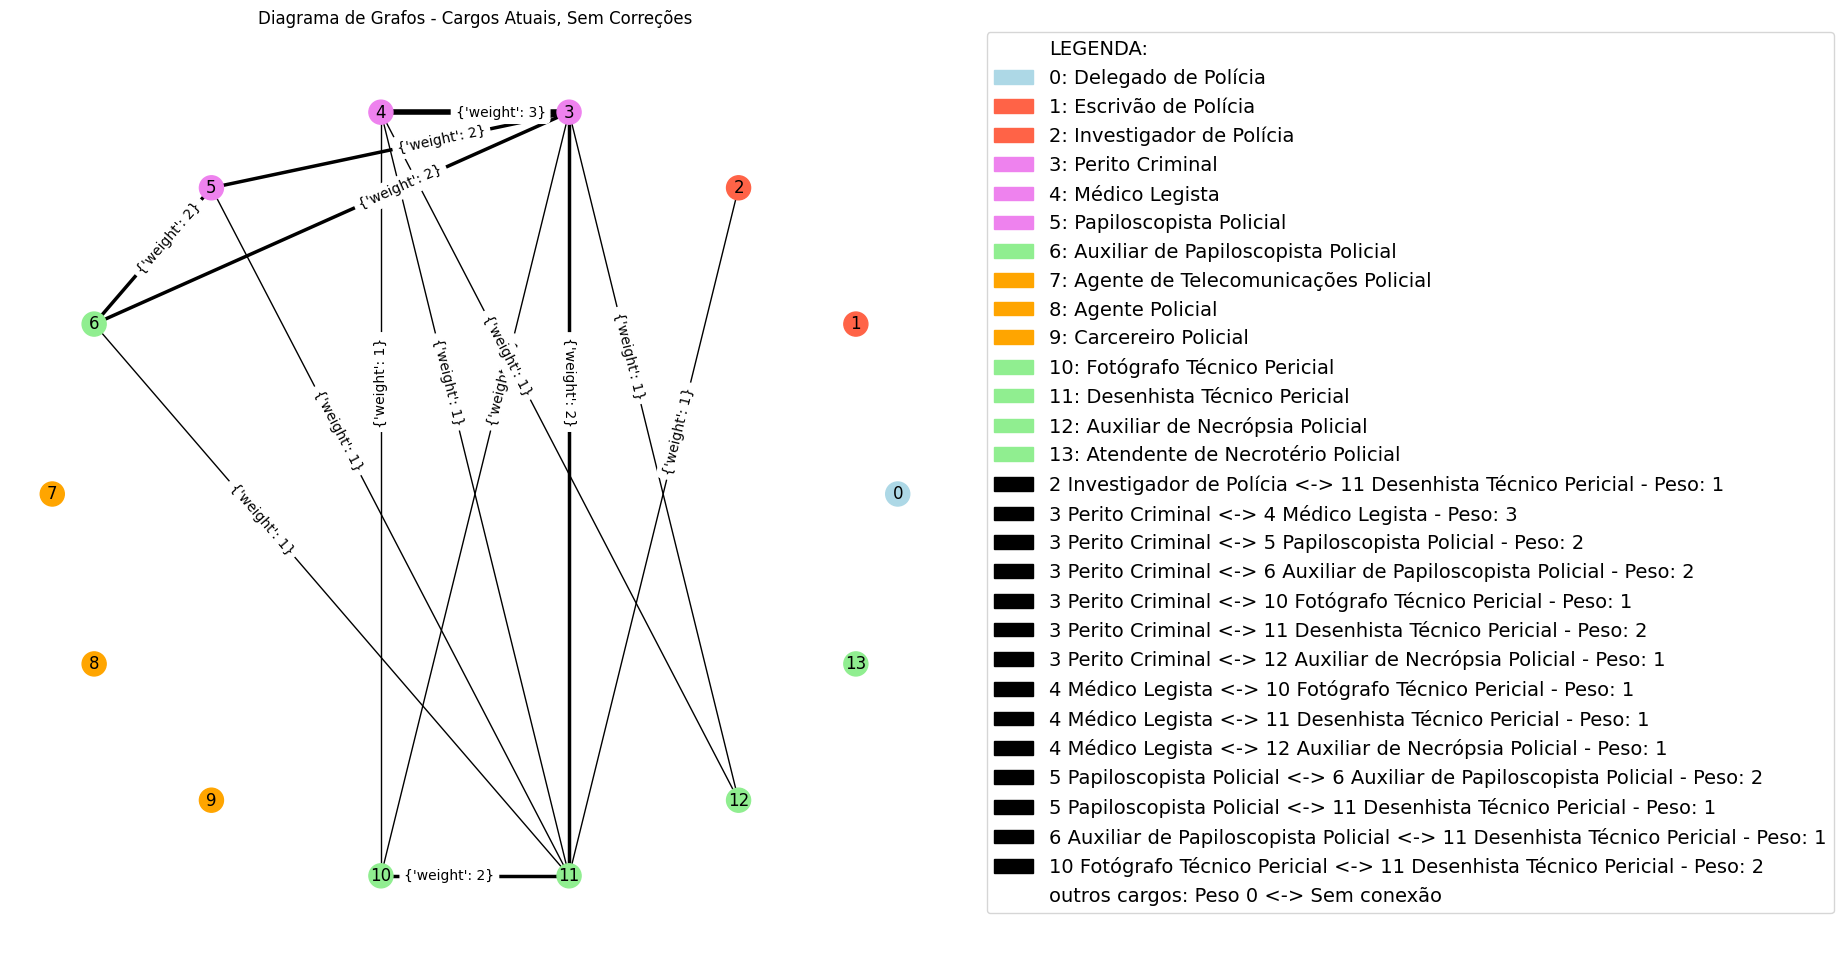

In [ ]:
#Plotando Diagrama de Grafos
cargos_delegado = ["Delegado de Polícia"]
cargos_investigacao = ["Escrivão de Polícia", "Investigador de Polícia"]
cargos_pericia = ["Perito Criminal", "Médico Legista", "Papiloscopista Policial"]
cargos_apoio_investigacao = ["Carcereiro Policial", "Agente de Telecomunicações Policial", "Agente Policial"]
cargos_apoio_pericia = ["Auxiliar de Papiloscopista Policial", "Fotógrafo Técnico Pericial",
            "Desenhista Técnico Pericial", "Auxiliar de Necrópsia Policial", "Atendente de Necrotério Policial"]

tamanho_fonte = 14

titulo = 'Diagrama de Grafos - Cargos Atuais, Sem Correções'

diagrama_grafo(cargos_delegado, cargos_investigacao, cargos_pericia,
               cargos_apoio_investigacao, cargos_apoio_pericia, cargos_atrib_atual_nocor,
               titulo, tamanho_fonte)

In [ ]:
atrib_comp_cargos(atrib_gerais_no_cor)

Carreiras: Investigador de Polícia x Desenhista Técnico Pericial
Atribuições Compartilhadas:
segurança de locais de polícia judiciária
Total: 1
------------------------------------------------------------
Carreiras: Perito Criminal x Médico Legista
Atribuições Compartilhadas:
examinar locais de crime
manusear materiais biológicos
exames com exumação de cadáver
Total: 3
------------------------------------------------------------
Carreiras: Perito Criminal x Papiloscopista Policial
Atribuições Compartilhadas:
analisar vestígios papiloscópicos latu sensu
realizar levantamento de local com desenhos e fotos
Total: 2
------------------------------------------------------------
Carreiras: Perito Criminal x Auxiliar de Papiloscopista Policial
Atribuições Compartilhadas:
analisar vestígios papiloscópicos latu sensu
realizar levantamento de local com desenhos e fotos
Total: 2
------------------------------------------------------------
Carreiras: Perito Criminal x Fotógrafo Técnico Pericial
Atr

Observando o Diagrama, percebe-se que (a lista de atribuições compartilhadas está acima para conferência):

1. Delegado de Polícia (0) não possuí atribuições compartilhadas.

2. Escrivão de Polícia (1) não possuí atribuições compartilhadas.

3. O Investigador de Polícia (2) e o Desenhista Técnico Pericial (11) só possuem 1 atributo compartilhado.

4. O Perito Criminal (3) possuí atribuições compartilhadas com todos os cargos pericias e três de apoio à perícia, entre eles:

  4.1 - Médico Legista (4) - 3 atribuições.

  4.2 - Papiloscopista Policial (5) - 2 atribuições.

  4.3 - Auxiliar de Papiloscopista Policial (6) - 2 atribuições.

  4.4 - Fotógrado Técnico Pericial (10) - 1 atribuição.

  4.5 - Desenhista Técnico Pericial (11) - 2 atribuições.

  4.6 - Auxiliar de Necrópsia Policial (12) - 1 atribuição.

5. O Médico Legista (4) possuí atribuições com Perito Criminal (3 - já listadas) e três dos cargos de apoio à perícia, entre eles:

  5.1 - Fotógrado Técnico Pericial (10) - 1 atribuição.

  5.2 - Desenhista Técnico Pericial (11) - 1 atribuição.

  5.3 - Auxiliar de Necrópsia Policial (12) - 1 atribuição.

6. O Papiloscopista Policial (5) possuí atribuições com o Perito Criminal (3 - já listado)  e dois dos cargos de apoio à perícia:

  6.1 - Auxiliar de Papiloscopista Policial (6) - 2 atribuições.

  6.2 - Desenhista Técnico Pericial (11) - 1 atribuição.

7. O Auxiliar de Papiloscopista Policial (6) possuí atribuições com Perito Criminal (3), Papiloscopista Policial (5), ambos já listados, e Desenhista Técnico Pericial (11), este último com 1 atribuição.

8. Todos os cargos de apoio à investigação, Agente de Telecomunicações Policial (7), Agente Policial (8) e Carcereiro Policial (9), não possuem atribuições entre eles ou com qualquer outro cargo.

9. O Fotógrafo Técnico Pericial (10) possuí atribuições com dois do cargos periciais (Perito Criminal (3) e Médico Legista (4)), ambos já listados.

10. O Desenhista Técnico Pericial (11) possuí atribuições com o Investigador de Polícia (2), todos os cargos periciais (Perito Criminal (3), Médico Legista (4) e Papiloscopista (5)), e dois dos cargos de apoio à perícia (Auxiliar de Papiloscopista Poplicial (6) e Fotógrafo Técnico Pericial (10)), todos anteriormente listados.

11. O Auxiliar de Necrópsia Policial (12) possuí atribuições com dois dos cargos periciais (Perito Criminal (3) e Médico Legista (4)), ambos já listados anteriormente.

12. O Atendente de Necrotério Policial (13) não possuí atribuições compartilhadas.

No geral, o Delegado de Polícia não se conecta com nenhum cargo. Não há conexão intra e inter cargos de investigação e apoio à investigação. Há uma conexão de Investigador de Polícia com Desenhista Técnico Pericial, o qual aparenta ser espúria. Cargos periciais e de apoio à perícia apresenta maiores conexões entre si tanto em arestas como em atribuições.

##5.2 Atual com correção
Inicialmente, contruir a matriz de adjacência e as arestas.

In [ ]:
titulo = 'Cargos Atuais com correções'

matrix_adjacencia(cargos_atrib_atual_withcor, titulo)

Matrix de Adjacência / Vetores de Arestas e Pesos
Cargos Atuais com correções
Cargo 1 - Cargo 2 - Peso (as direções são recíprocas)


(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.]]),
 [[1, 2, 1],
  [2, 8, 1],
  [3, 4, 8],
  [3, 5, 10],
  [3, 6, 6],
  [3, 7, 5],
  [3, 8, 4],
  [3, 9, 3],
  [3, 10, 2],
  [4, 5, 8],
  [4, 6, 3],
  [4, 7, 2],
  [4, 8, 2],
  [4, 9, 7],
  [4, 10, 6],
  [5, 6, 12],
  [5, 7, 2],
  [5, 8, 5],
  [5, 9, 3],
  [5, 10, 2],
  [6, 7, 2],
  [6, 8, 3],
  [6, 9, 2],
  [6, 10, 2],
  [7, 8, 3],
  [7, 9, 2],
  [7, 10, 2],
  [8, 9, 2],
  [8, 10, 2],
  [9, 10, 2]])

Plotando Diagrama de Grafos.

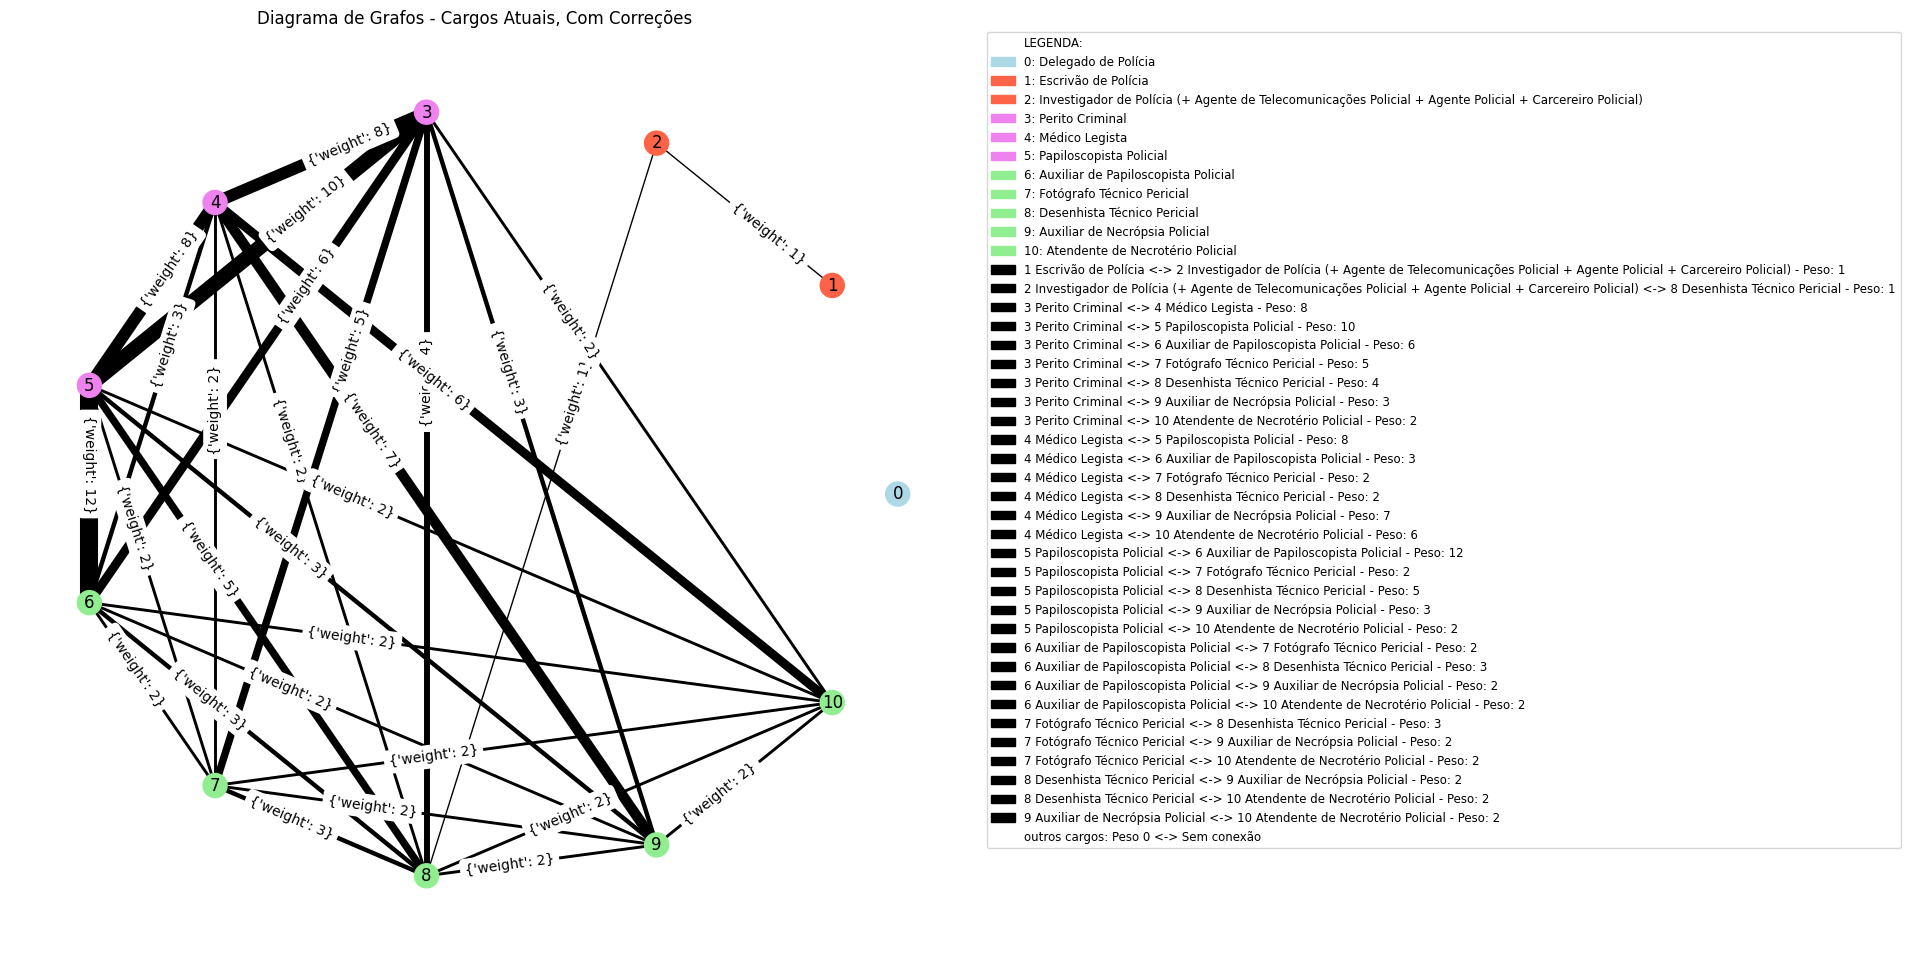

In [ ]:
#Plotando Diagrama de Grafos
cargos_delegado = ["Delegado de Polícia"]
cargos_investigacao = ["Escrivão de Polícia", "Investigador de Polícia (+ Agente de Telecomunicações Policial + Agente Policial + Carcereiro Policial)"]
cargos_pericia = ["Perito Criminal", "Médico Legista", "Papiloscopista Policial"]
cargos_apoio_investigacao = []
cargos_apoio_pericia = ["Auxiliar de Papiloscopista Policial", "Fotógrafo Técnico Pericial",
            "Desenhista Técnico Pericial", "Auxiliar de Necrópsia Policial", "Atendente de Necrotério Policial"]
titulo = 'Diagrama de Grafos - Cargos Atuais, Com Correções'

tamanho_fonte = 8.5

diagrama_grafo(cargos_delegado, cargos_investigacao, cargos_pericia,
               cargos_apoio_investigacao, cargos_apoio_pericia, cargos_atrib_atual_withcor,
               titulo, tamanho_fonte)

In [ ]:
atrib_comp_cargos(cargos_atrib_atual_withcor)

Carreiras: Delegado de Polícia x Escrivão de Polícia
Atribuições Compartilhadas:
portar arma, distintivo e algemas
atender sempre, com urbanidade e eficiência, o público em geral, pessoalmente ou por telefone
elaborar, sob orientação da Autoridade Policial, registro de ocorrência
conduzir viatura policial
cumprir diligência e/ou requisição determinada pela Autoridade Policial, elaborando relatório respectivo
proceder à abordagem de pessoas suspeitas da prática de ilícitos, realizando busca pessoal quando necessário
identificar pessoas, inclusive por meio digital, nas hipóteses em que tal providência se faça necessária
conduzir e apresentar pessoas legalmente presas à Autoridade Policial competente ou onde for por ela determinado
auxiliar a Autoridade Policial na formalização de atos de polícia judiciária
operar os sistemas de comunicação e de dados da Polícia Civil
elaborar recognição visuográfica
Total: 11
------------------------------------------------------------
Carreiras: Delegad

Observando o Diagrama, percebe-se que (a lista de atribuições compartilhadas está acima para conferência):

1. Delegado de Polícia (0) não possuí atribuições compartilhadas.

2. Escrivão de Polícia (1) e Investigador de Polícia (2) só possuem 1 atributo compartilhado.

3. O Investigador de Polícia (+ Agente de Telecomunicações Policiais + Agente Policial + Carcereiro (2) possuí atribuições compartilhadas com o Escrivão de Polícia (1 - já listado anteriormente) e o Desenhista Técnico Pericial (8), com 1 atributo compartilhado.

4. O Perito Criminal (3) possuí atribuições compartilhadas com todos os cargos pericias e todos de apoio à perícia, entre eles:

  4.1 - Médico Legista (4) - 8 atribuições.

  4.2 - Papiloscopista Policial (5) - 10 atribuições.

  4.3 - Auxiliar de Papiloscopista Policial (6) - 6 atribuições.

  4.4 - Fotógrado Técnico Pericial (7) - 5 atribuições.

  4.5 - Desenhista Técnico Pericial (8) - 4 atribuições.

  4.6 - Auxiliar de Necrópsia Policial (9) - 3 atribuições.

  4.7 - Atendente de Necrotério Policial (10) - 2 atribuições.

5. O Médico Legista (4) possuí atribuições compartilhadas com todos os cargos pericias (Perito Criminal (3 - já listado)) e todos de apoio à perícia, entre eles:

  5.1 - Papiloscopista Policial (5) - 8 atribuições.

  5.2 - Auxiliar de Papiloscopista Policial (6) - 3 atribuições.
  
  5.3 - Fotógrado Técnico Pericial (7) - 2 atribuições.

  5.4 - Desenhista Técnico Pericial (8) - 2 atribuições.

  5.5 - Auxiliar de Necrópsia Policial (9) - 7 atribuições.

  5.6 - Atendente de Necrotério Policial (10) - 6 atribuições.

6. O Papiloscopista Policial (5) possuí atribuições compartilhadas com todos os cargos pericias (Perito Criminal (3) e Médico Legista (4 - já listados)) e todos de apoio à perícia, entre eles:

  6.1 - Auxiliar de Papiloscopista Policial (6) - 12 atribuições.

  6.2 - Fotógrado Técnico Pericial (7) - 2 atribuições.

  6.2 - Desenhista Técnico Pericial (8) - 5 atribuições.

  6.3 - Auxiliar de Necrópsia Policial (9) - 3 atribuições.

  6.4 - Atendente de Necrotério Policial (10) - 2 atribuições.

7. O Auxiliar de Papiloscopista Policial (6) possuí atribuições compartilhadas com todos os cargos pericias (Perito Criminal (3), Médico Legista (4) e Papiloscopista Policial (5 - já listados)) e todos de apoio à perícia, entre eles:

  7.1 - Fotógrado Técnico Pericial (7) - 2 atribuições.

  7.2 - Desenhista Técnico Pericial (8) - 3 atribuições.

  7.3 - Auxiliar de Necrópsia Policial (9) - 2 atribuições.

  7.4 - Atendente de Necrotério Policial (10) - 2 atribuições.

8. O Fotógrafo Técnico Pericial (7) possuí atribuições compartilhadas com todos os cargos pericias (Perito Criminal (3), Médico Legista (4) e Papiloscopista Policial (5 - já listados)) e todos de apoio à perícia (Auxiliar Papiloscopista Policial (6 - já listado), entre eles:

  8.1 - Desenhista Técnico Pericial (8) - 3 atribuições.

  8.2 - Auxiliar de Necrópsia Policial (9) - 2 atribuições.

  8.3 - Atendente de Necrotério Policial (10) - 2 atribuições.

9. O Desenhista Técnico Pericial (8) possuí atribuições compartilhadas com todos os cargos pericias (Perito Criminal (3), Médico Legista (4) e Papiloscopista Policial (5 - já listados)) e todos de apoio à perícia (Auxiliar Papiloscopista Policial (6) e Fotógrafo Técnico Pericial (7 - já listados), entre eles:

  9.1 - Auxiliar de Necrópsia Policial (9) - 2 atribuições.

  9.2 - Atendente de Necrotério Policial (10) - 2 atribuições.

10. O Auxiliar de Necrópsia Policial (9) possuí atribuições compartilhadas com todos os cargos pericias (Perito Criminal (3), Médico Legista (4) e Papiloscopista Policial (5 - já listados)) e todos de apoio à perícia (Auxiliar Papiloscopista Policial (6), Fotógrafo Técnico Pericial (7) e Desenhista Técnico Pericial (8 - já listados)), e possuí 1 atributo compartilhado com Atendente Técnico Policial (10).

11. O Atendente de Necrotério Policial (10) possuí atribuições compartilhadas com todos os cargos pericias (Perito Criminal (3), Médico Legista (4) e Papiloscopista Policial (5 - já listados)) e todos de apoio à perícia (Auxiliar Papiloscopista Policial (6), Fotógrafo Técnico Pericial (7) e Desenhista Técnico Pericial (8) e Auxiliar de Necrotério Policial - já listados)).

No geral, o Delegado de Polícia não se conecta com nenhum cargo. Houve conexão cargos de investigação e um espúria entre Investigador de Polícia com Desenhista Técnico Pericial. Cargos periciais e de apoio à perícia apresenta sólidas conexões entre si tanto em arestas como em atribuições.

##5.3 LONPC sem correção
Inicialmente, contruir a matriz de adjacência e as arestas.

In [ ]:
titulo = 'Cargos LONPC sem correções'

matrix_adjacencia(cargos_atrib_LONPC_nocor, titulo)

Matrix de Adjacência / Vetores de Arestas e Pesos
Cargos LONPC sem correções
Cargo 1 - Cargo 2 - Peso (as direções são recíprocas)


(array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 0., 0., 0., 1., 1.],
        [0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0.]]),
 [[2, 3, 3],
  [2, 4, 2],
  [2, 5, 2],
  [2, 6, 1],
  [2, 7, 1],
  [3, 6, 1],
  [3, 7, 1],
  [4, 5, 2]])

Plotando Diagrama de Grafos.

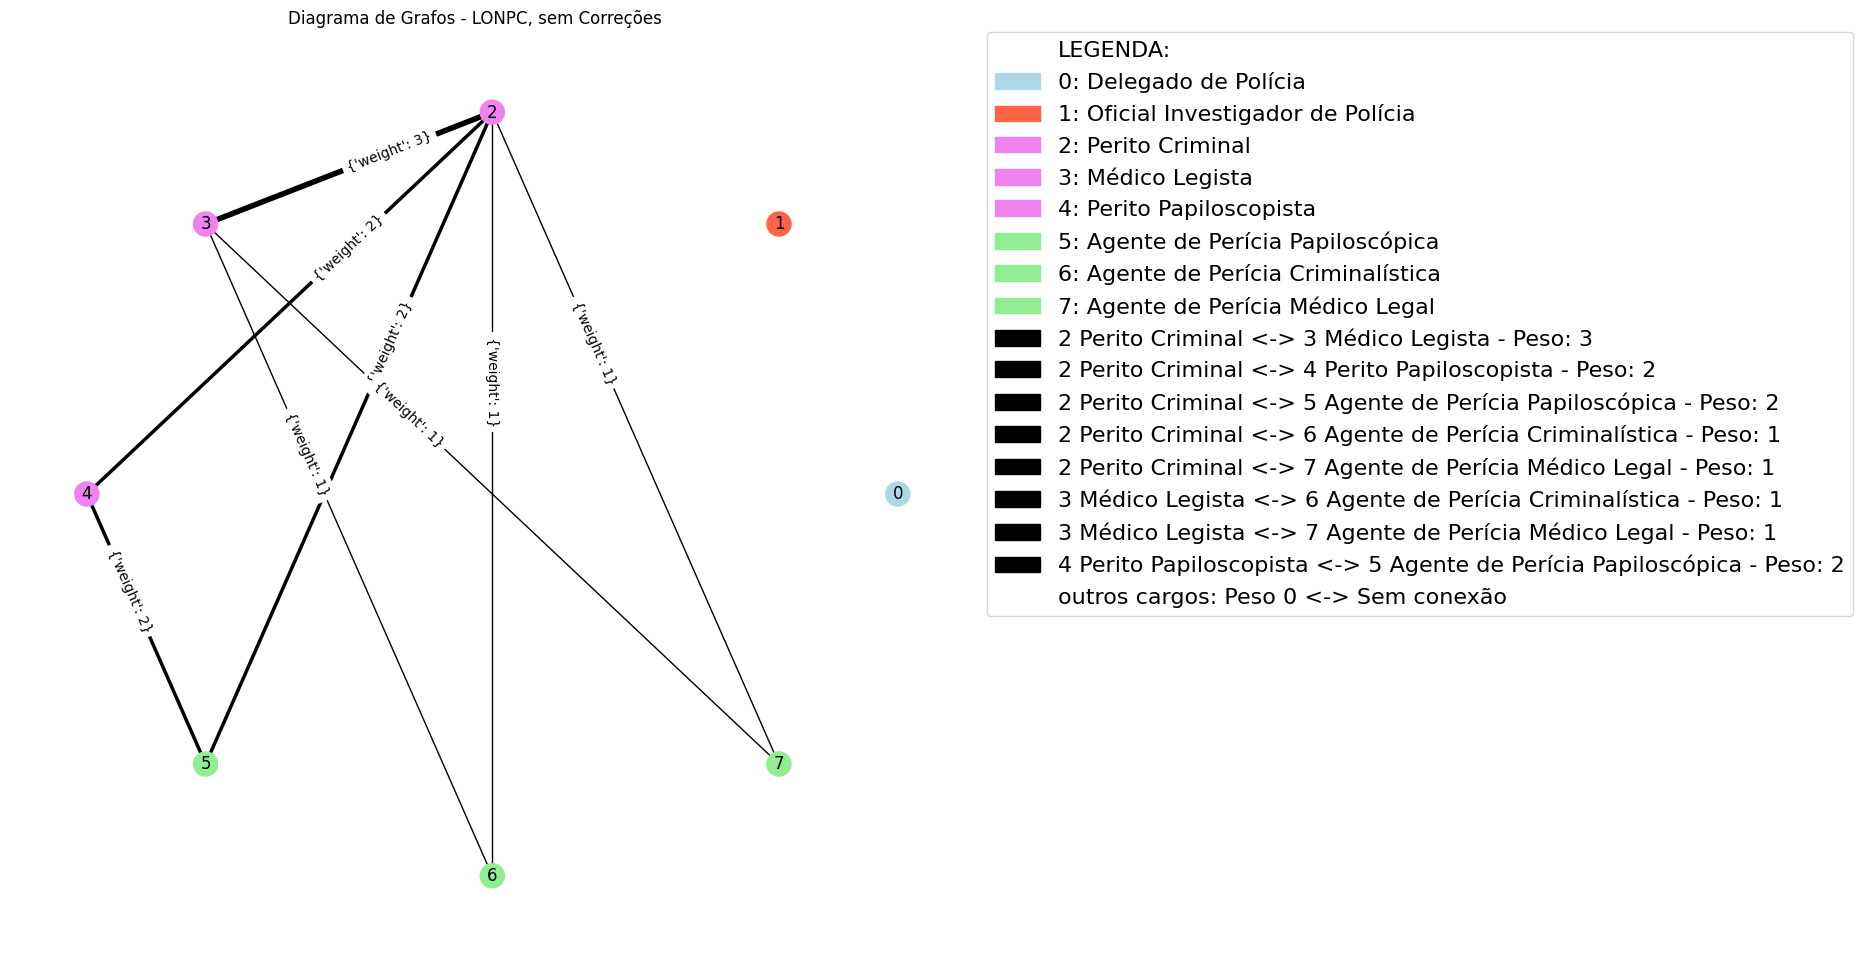

In [ ]:
#Plotando Diagrama de Grafos
cargos_delegado = ["Delegado de Polícia"]
cargos_investigacao = ["Oficial Investigador de Polícia"]
cargos_pericia = ["Perito Criminal", "Médico Legista", "Perito Papiloscopista"]
cargos_apoio_investigacao = []
cargos_apoio_pericia = ["Agente de Perícia Papiloscópica", "Agente de Perícia Criminalística",
            "Agente de Perícia Médico Legal"]
titulo = 'Diagrama de Grafos - LONPC, sem Correções'

tamanho_fonte = 16

diagrama_grafo(cargos_delegado, cargos_investigacao, cargos_pericia,
               cargos_apoio_investigacao, cargos_apoio_pericia, cargos_atrib_LONPC_nocor,
               titulo, tamanho_fonte)

In [ ]:
atrib_comp_cargos(atrib_gerais_LONPC_no_cor)

Carreiras: Perito Criminal x Médico Legista
Atribuições Compartilhadas:
examinar locais de crime
manusear materiais biológicos
exames com exumação de cadáver
Total: 3
------------------------------------------------------------
Carreiras: Perito Criminal x Perito Papiloscopista
Atribuições Compartilhadas:
analisar vestígios papiloscópicos latu sensu
realizar levantamento de local com desenhos e fotos
Total: 2
------------------------------------------------------------
Carreiras: Perito Criminal x Agente de Perícia Papiloscópica
Atribuições Compartilhadas:
analisar vestígios papiloscópicos latu sensu
realizar levantamento de local com desenhos e fotos
Total: 2
------------------------------------------------------------
Carreiras: Perito Criminal x Agente de Perícia Criminalística
Atribuições Compartilhadas:
manusear materiais biológicos
Total: 1
------------------------------------------------------------
Carreiras: Perito Criminal x Agente de Perícia Médico Legal
Atribuições Comparti

Observando o Diagrama, percebe-se que (a lista de atribuições compartilhadas está acima para conferência):

1. Delegado de Polícia (0) não possuí atribuições compartilhadas.

2. Oficial Investigador de Polícia (1) não possuí atribuições compartilhadas.

3. O Perito Criminal (2) possuí atribuições compartilhadas com todos os cargos pericias e todos de apoio à perícia, entre eles:

  3.1 - Médico Legista (3) - 3 atribuições.

  3.2 - Perito Papiloscopista (4) - 2 atribuições.

  3.3 - Agente de Perícia Papiloscópica (5) - 2 atribuições.

  3.4 - Agente de Perícia Criminalística (6) - 1 atribuição.

  3.5 - Agente de Perícia Médico Legal (7) - 1 atribuição.

4. O Médico Legista (3) possuí atribuições compartilhadas o Perito Criminal (2 - já listado) e dois cargos de apoio à perícia, entre eles:
  
  4.1 - Agente de Perícia Criminalística (6) - 1 atribuição.

  4.2 - Agente de Perícia Médico Legal (7) - 1 atribuição.

5. O Perito Papiloscopista (4) possuí atribuições compartilhadas com Perito Criminal (2 - já listado) e o Agente de Perícia Papiloscópica (5), este com 2 atribuições compartilhadas.

6. O Agente de Perícia Papiloscópica (5) possuí atribuições compartilhadas com o Perito Criminal (3) e Papiloscopista Policial (5), ambos já listados.

7. O Agente de Perícia Criminalística (6) possuí atribuições compartilhadas com o Perito Criminal (3) e o  Médico Legista (4), ambos já listados.

8. O Agente de Perícia Médico Legal (7) possuí atribuições compartilhadas com o Perito Criminal (3) e o  Médico Legista (4), ambos já listados.

No geral, o Delegado de Polícia não se conecta com nenhum cargo. O mesmo ocorre com o Oficial Investigador de Polícia. Cargos periciais e de apoio à perícia apresentam mais conexões entre si tanto em arestas como em atribuições, apesar de algumas lacunas devido as ausência de correções.

##5.4 LONPC com correção
Inicialmente, contruir a matriz de adjacência e as arestas.

In [ ]:
titulo = 'Cargos LONPC com correções'

matrix_adjacencia(cargos_atrib_LONPC_withcor, titulo)

Matrix de Adjacência / Vetores de Arestas e Pesos
Cargos LONPC com correções
Cargo 1 - Cargo 2 - Peso (as direções são recíprocas)


(array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 0., 1., 1., 1., 1.],
        [0., 0., 1., 1., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1., 0., 1., 1.],
        [0., 0., 1., 1., 1., 1., 0., 1.],
        [0., 0., 1., 1., 1., 1., 1., 0.]]),
 [[2, 3, 8],
  [2, 4, 10],
  [2, 5, 6],
  [2, 6, 6],
  [2, 7, 3],
  [3, 4, 7],
  [3, 5, 3],
  [3, 6, 2],
  [3, 7, 11],
  [4, 5, 12],
  [4, 6, 4],
  [4, 7, 2],
  [5, 6, 2],
  [5, 7, 2],
  [6, 7, 2]])

Plotando Diagrama de Grafos.

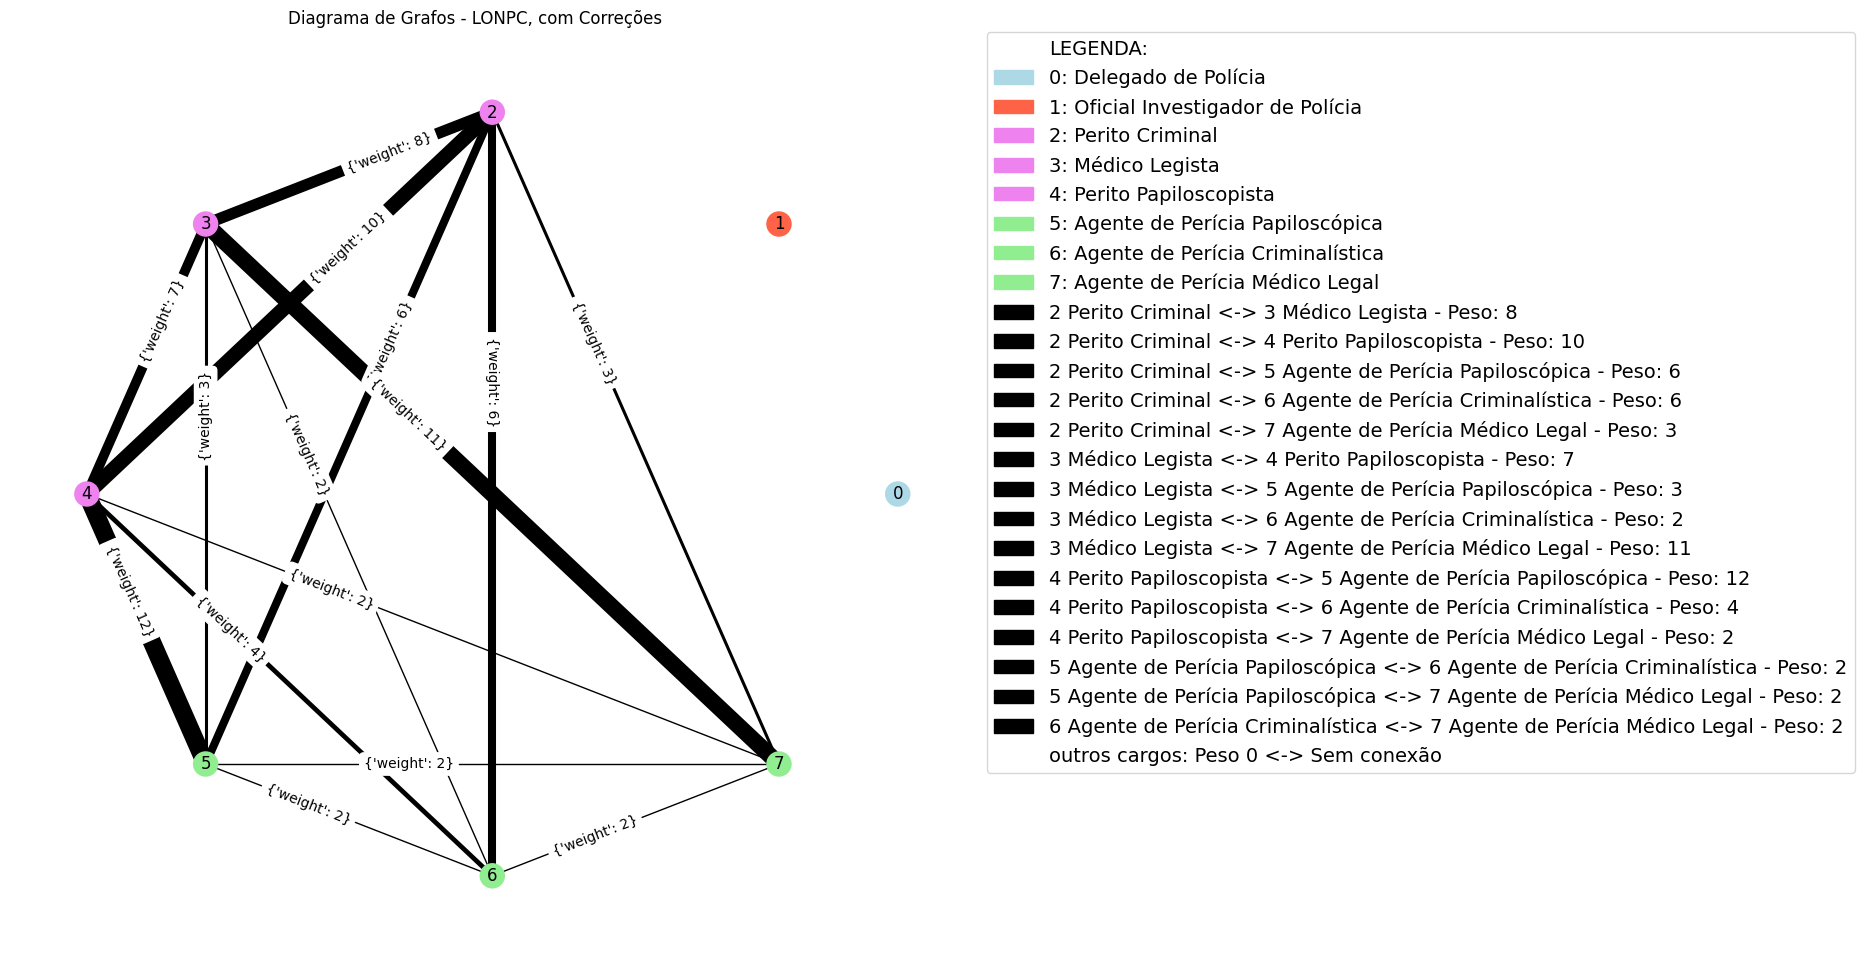

In [ ]:
#Plotando Diagrama de Grafos
cargos_delegado = ["Delegado de Polícia"]
cargos_investigacao = ["Oficial Investigador de Polícia"]
cargos_pericia = ["Perito Criminal", "Médico Legista", "Perito Papiloscopista"]
cargos_apoio_investigacao = []
cargos_apoio_pericia = ["Agente de Perícia Papiloscópica", "Agente de Perícia Criminalística",
            "Agente de Perícia Médico Legal"]
titulo = 'Diagrama de Grafos - LONPC, com Correções'

tamanho_fonte = 14

diagrama_grafo(cargos_delegado, cargos_investigacao, cargos_pericia,
               cargos_apoio_investigacao, cargos_apoio_pericia, cargos_atrib_LONPC_withcor,
               titulo, tamanho_fonte)

In [ ]:
atrib_comp_cargos(atrib_gerais_LONPC_with_cor)

Carreiras: Perito Criminal x Médico Legista
Atribuições Compartilhadas:
cumprir requisições do ramo da criminalística
examinar locais de crime
atender ocorrências de desastres
manusear materiais biológicos
exames com exumação de cadáver
operar aparelhos forenses
zelar pela cadeia de custódia
editar laudos periciais
Total: 8
------------------------------------------------------------
Carreiras: Perito Criminal x Perito Papiloscopista
Atribuições Compartilhadas:
análise de vestígios em local de crime ou laboratório
analisar vestígios papiloscópicos latu sensu
cumprir requisições do ramo da criminalística
examinar locais de crime
atender ocorrências de desastres
manusear materiais biológicos
realizar levantamento de local com desenhos e fotos
operar aparelhos forenses
zelar pela cadeia de custódia
editar laudos periciais
Total: 10
------------------------------------------------------------
Carreiras: Perito Criminal x Agente de Perícia Papiloscópica
Atribuições Compartilhadas:
análise d

Observando o Diagrama, percebe-se que (a lista de atribuições compartilhadas está acima para conferência):

1. Delegado de Polícia (0) não possuí atribuições compartilhadas.

2. Oficial Investigador de Polícia (1) não possuí atribuições compartilhadas.

3. O Perito Criminal (2) possuí atribuições compartilhadas com todos os cargos pericias e todos de apoio à perícia, entre eles:

  3.1 - Médico Legista (3) - 8 atribuições.

  3.2 - Perito Papiloscopista (4) - 10 atribuições.

  3.3 - Agente de Perícia Papiloscópica (5) - 6 atribuições.

  3.4 - Agente de Perícia Criminalística (6) - 6 atribuições.

  3.5 - Agente de Perícia Médico Legal (7) - 3 atribuições.

4. O Médico Legista (3) possuí atribuições compartilhadas com todos os cargos pericias (Perito Criminal (2 - já listado)) e todos de apoio à perícia, entre eles:
  
  4.1 - Perito Papiloscopista (4) - 7 atribuições.

  4.2 - Agente de Perícia Papiloscópica (5) - 3 atribuições.

  4.3 - Agente de Perícia Criminalística (6) - 2 atribuições.

  4.4 - Agente de Perícia Médico Legal (7) - 11 atribuições.

5. O Perito Papiloscopista (4) possuí atribuições compartilhadas com todos os cargos pericias (Perito Criminal (2) e o Médico Legista (3 - já listados)) e todos de apoio à perícia, entre eles:

  5.1 - Agente de Perícia Papiloscópica (5) - 12 atribuições.

  5.2 - Agente de Perícia Criminalística (6) - 4 atribuições.

  5.4 - Agente de Perícia Médico Legal (7) - 2 atribuições.

6. O Agente de Perícia Papiloscópica (5) possuí atribuições compartilhadas com todos os cargos pericias (Perito Criminal (2), o Médico Legista (3) e o Perito Papiloscopista (4 - já listados)) e todos de apoio à perícia, entre eles:

  6.1 - Agente de Perícia Criminalística (6) - 2 atribuições.

  6.2 - Agente de Perícia Médico Legal (7) - 2 atribuições.

7. O Agente de Perícia Criminalística (6) possuí atribuições compartilhadas com todos os cargos pericias (Perito Criminal (2), o Médico Legista (3) e o Perito Papiloscopista (4 - já listados)) e todos de apoio à perícia (Agente de Perícia Papiloscópica (5 - Já listado)), e com o Agente de Perícia Médico Legal, com 2 atribuições.

8. O Agente de Perícia Médico Legal (7) possuí atribuições compartilhadas com todos os cargos pericias (Perito Criminal (2), o Médico Legista (3) e o Perito Papiloscopista (4 - já listados)) e todos de apoio à perícia (Agente de Perícia Papiloscópica (5) e Agente de Perícia Criminalística (6 - Já listados)).

No geral, o Delegado de Polícia não se conecta com nenhum cargo. O mesmo ocorre com o Oficial Investigador de Polícia. Cargos periciais e de apoio à perícia apresentam sólidas conexões entre si tanto em arestas como em atribuições.

## 5.5 - Comentários Gerais
Observando o diagrama de grafos da situação atual sem correção, é possível verificar muitas conexões entre cargos periciais e de apoio à perícia. Essas conexões possuem pesos baixos, mas demonstram a tendência de proximidade dos cargos periciais, incluindo Papiloscopista Policial e Perito Criminal.

Ao se corrigir as atribuições, as conexões aumentam em peso e número nos cargos já citados, indicando ainda mais essa malha.

Mesmo na situação de adequação a LONPC sem correções, há conexões somente entre peritos e apoio à perícia, ainda que com baixos pesos.

Por fim, com as correções propostas, a malha se aumenta e reforça.

Em nenhuma situação, Papiloscopista Policial e Investigadores de Polícia tiveram conexão.

#6 - Conclusões sobre o estudo
Na maioria das visualizações, Papiloscopistas Policiais estão mais próximos dos Peritos Criminais do que de Investigadores de Polícia. Ademais, muitas das atribuições são periciais idênticas entre os Peritos Criminais e Papiloscopista.

A indicação de Perito na área de Identificação pela LONPC deve ser feita por Perito da área. O Papiloscopista não é afeita a investigação, e realiza perícia na área da identificação. Logo, é o Perito da Identificação, no ramo biométrico, em especial o papiloscópico.

Este estudo indica a similaridade, mas questões políticas, científicas e jurídicas também devem ser levadas em conta. Esse estudo tem por objetivo indicar a situação centenária dos Papiloscopista Policiais com a perícia, evitando disparates feito contra a ciência e seus profissionais.

Em respeito a pluralidade de ideias e da construção do conhecimento científico, é possível alteração de valores e dados para verificação dos resultados. Estima-se a metotologia de caixa branca apresentada, com todos os processos sendo indicados, e estimasse que em todas as esferas, tal situação seja feita.